## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 27)

In [3]:
caly_df.head()

Województwo Data urodzenia    IE  PI-PROD  PI-POKR  Prc  Psm  Pnr  \
0       WIELKOPOLSKIE           2020  2120      137      127  121  113  106   
1  KUJAWSKO-POMORSKIE           2018  1912      126      123  109  113  103   
2           POMORSKIE           2020  2126      126      120  110  107  102   
3  KUJAWSKO-POMORSKIE           2020  2089      133      111  104  110   99   
4  ZACHODNIOPOMORSKIE           2020  2853      125      115   91   95  101   

    Pw  PI-PLOD  ...  kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr  \
0  128      109  ...   1370    577     2    452     1  115.0  114.0  109.0   
1  128      114  ...   1209    358   -16    354    -4  115.0  113.0  104.0   
2  124      113  ...    982    368    -4    350     4  104.0  103.0  102.0   
3  114      114  ...   1080    546    12    410     7  106.0  106.0  101.0   
4  124      134  ...    516    501    36    289    15  102.0  102.0  118.0   

       w     og  
0  127.0  123.0  
1  123.0  123.0  
2  122.0  117.0  
3  112.0  112.0  
4  123.0  109.0  

[5 rows x 27 columns]

In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   IE              1881 non-null   int64   
 3   PI-PROD         1881 non-null   int64   
 4   PI-POKR         1881 non-null   int64   
 5   Prc             1881 non-null   int64   
 6   Psm             1881 non-null   int64   
 7   Pnr             1881 non-null   int64   
 8   Pw              1881 non-null   int64   
 9   PI-PLOD         1881 non-null   int64   
 10  CRj             1881 non-null   int64   
 11  CRk             1881 non-null   int64   
 12  PP              1881 non-null   int64   
 13  OMC             1881 non-null   int64   
 14  WH-KSOM         1881 non-null   int64   
 15  WH-DLUG         1881 non-null   int64   
 16  IP              1881 non-null   int64   
 17  kg ml          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 27)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([103.,  85.,  60.,  56., 283., 350., 264., 195.,  96.,  78.,  67.,
         47.,  44.,  37.,  24.,  23.,  19.,   6.,  10.,  10.,   2.,   7.,
          3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([1903.        , 1945.06666667, 1987.13333333, 2029.2       ,
        2071.26666667, 2113.33333333, 2155.4       , 2197.46666667,
        2239.53333333, 2281.6       , 2323.66666667, 2365.73333333,
        2407.8       , 2449.86666667, 2491.93333333, 2534.        ,
        2576.06666667, 2618.13333333, 2660.2       , 2702.26666667,
        2744.33333333, 2786.4       , 2828.46666667, 2870.53333333,
        2912.6       , 2954.66666667, 2996.73333333, 3038.8       ,
        3080.86666667, 3122.93333333, 3165.        ]),
 <BarContainer object of 30 artists>)

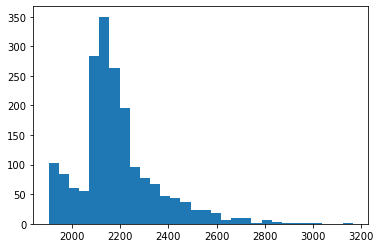

In [13]:
plt.hist(caly_df["IE"],bins=30)

In [14]:
caly_df["IE"].describe()

count    1875.000000
mean     2186.410133
std       166.883876
min      1903.000000
25%      2096.000000
50%      2156.000000
75%      2243.000000
max      3165.000000
Name: IE, dtype: float64

In [15]:
caly_df.loc[(caly_df["IE"]<=2096), "Klasa"] = "Małe"
caly_df.loc[(2096<caly_df["IE"]) & (caly_df["IE"]<=2156), "Klasa"] = "Średnie"
caly_df.loc[(2156<caly_df["IE"]) & (caly_df["IE"]<=2243), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["IE"]>2243, "Klasa"] = "Ekstrimum"

(array([475.,   0.,   0., 470.,   0.,   0., 466.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

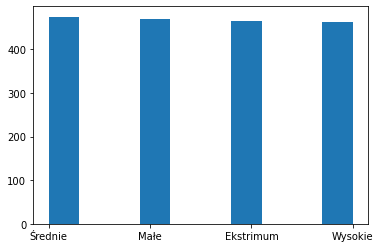

In [16]:
plt.hist(caly_df["Klasa"])

In [17]:
caly_df["Klasa"].value_counts()

Średnie      475
Małe         470
Ekstrimum    466
Wysokie      464
Name: Klasa, dtype: int64

In [18]:
list(caly_df)

['IE',
 'PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [19]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['IE']
test_label=test_df['IE']
#val_label=val_df['IE']

del train_df['IE']
del test_df['IE']
#del val_df['IE']


In [20]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [21]:
len(list(train_df))

47

## 1.2 Standaryzacja

In [22]:
train_df.iloc[:,:24]

PI-PROD  PI-POKR  Prc  Psm  Pnr   Pw  PI-PLOD  CRj  CRk   PP  ...  \
974       130      111  126  117  100  108      118  116  120   98  ...   
84        135      109  116  108  104  106      120  119  117   96  ...   
753       137      121  121  116  120  110      101  101  100  101  ...   
643       117      125  101  103  114  127      123  115  130  114  ...   
1438      133      109  104  113  102  108      112  111  116   98  ...   
...       ...      ...  ...  ...  ...  ...      ...  ...  ...  ...  ...   
143       125      118  117  112  100  119      110  108  113  102  ...   
650       143      129  116  115  115  126      117  115  119  100  ...   
732       135      121  107  115  105  123      105  104  104  104  ...   
1226      128      124  104  108  110  127      106  103  109  109  ...   
1270      121      115  117  108  103  115      103  101  111  103  ...   

      kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr      w     og  
974     980    380    -2    417    12  113.0  110.0  103.0  108.0  117.0  
84     1263    521     0    446     4  108.0  105.0  110.0  108.0  108.0  
753    1237    666    18    419     2  118.0  115.0  126.0  108.0  121.0  
643     723    305     1    227    -1  102.0  101.0  124.0  127.0  117.0  
1438   1254    485    -3    425     2  108.0  108.0  116.0  111.0  112.0  
...     ...    ...   ...    ...   ...    ...    ...    ...    ...    ...  
143     845    467    14    307     4  110.0  108.0  101.0  118.0  118.0  
650    1448    694    11    509     4  113.0  109.0  122.0  126.0  125.0  
732    1113    561    12    437     9  107.0  109.0  109.0  119.0  123.0  
1226   1111    407    -5    380     2  105.0  103.0  118.0  128.0  120.0  
1270    735    395    11    264     3  104.0  104.0  108.0  116.0  114.0  

[1500 rows x 24 columns]

In [23]:
scaler = StandardScaler()
train_df.iloc[:,:24]=scaler.fit_transform(train_df.iloc[:,:24])
test_df.iloc[:,:24]=scaler.fit_transform(test_df.iloc[:,:24])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [24]:
train_df.iloc[:,20:29]

sm        nr         w        og  DOLNOŚLĄSKIE  \
974   0.891719 -1.253508 -1.582152  0.297493             0   
84   -0.188542 -0.294750 -1.582152 -1.048403             0   
753   1.971980  1.896698 -1.582152  0.895669             0   
643  -1.052750  1.622767  1.088977  0.297493             0   
1438  0.459615  0.527043 -1.160395 -0.450227             0   
...        ...       ...       ...       ...           ...   
143   0.459615 -1.527439 -0.176295  0.447037             0   
650   0.675667  1.348836  0.948391  1.493845             0   
732   0.675667 -0.431715 -0.035709  1.194757             0   
1226 -0.620646  0.800974  1.229563  0.746125             0   
1270 -0.404594 -0.568681 -0.457466 -0.151139             0   

      KUJAWSKO-POMORSKIE  LUBELSKIE  LUBUSKIE  MAZOWIECKIE  
974                    0          0         0            0  
84                     0          0         0            0  
753                    0          0         0            0  
643                    0          0         0            0  
1438                   0          0         0            0  
...                  ...        ...       ...          ...  
143                    0          0         0            0  
650                    0          0         0            0  
732                    0          0         0            0  
1226                   0          0         0            0  
1270                   0          0         0            0  

[1500 rows x 9 columns]

In [25]:
train_df.shape

(1500, 47)

In [26]:
test_df.shape

(375, 47)

In [27]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [28]:
train_df

array([[ 0.45476225, -0.93083361,  2.37267516, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23222221, -1.21598635,  1.10580699, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.5432062 ,  0.49493011,  1.73924108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.23222221,  0.49493011, -0.03437436, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14377826,  0.92265923, -0.41443481, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466569, -0.36052812,  1.23249381, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [30]:
train_label

array([2085, 2142, 2037, ..., 2128, 2096, 2058], dtype=int64)

In [31]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [35]:
p = {'first_neuron':[250], #best
     'hidden_neuron':[25],# best
     'hidden_layers':[0,1,2],  #best 2
     'batch_size': [128,256], # 128
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['orthogonal'],
     'epochs': [2000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['sigmoid','tanh','selu','elu','relu'],
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [36]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=10,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [37]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja IE')


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 196us/sample - loss: 2185.8757 - val_loss: 2186.2514
Epoch 2/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2184.8253 - val_loss: 2185.1485
Epoch 3/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2183.6254 - val_loss: 2183.7993
Epoch 4/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2182.1116 - val_loss: 2182.0743
Epoch 5/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2180.1625 - val_loss: 2179.8533
Epoch 6/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2177.6818 - val_loss: 2177.0496
Epoch 7/2000
150

Epoch 143/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 280.9720 - val_loss: 277.8908
Epoch 144/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 274.6006 - val_loss: 271.9577
Epoch 145/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 268.3855 - val_loss: 265.6105
Epoch 146/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 262.0581 - val_loss: 259.1860
Epoch 147/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 255.6293 - val_loss: 252.9410
Epoch 148/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 249.2758 - val_loss: 246.5778
Epoch 149/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 242.7257 - val_loss: 240.1562
Epoch 150/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 236.3296 - val_loss: 233.7956
Epoch 151/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 230.0179 - va

Epoch 290/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.6825 - val_loss: 30.0172
Epoch 291/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.5565 - val_loss: 30.1773
Epoch 292/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.4295 - val_loss: 29.7421
Epoch 293/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.3718 - val_loss: 29.7023
Epoch 294/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.3631 - val_loss: 29.8217
Epoch 295/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 26.1219 - val_loss: 29.5866
Epoch 296/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 26.0814 - val_loss: 29.2956
Epoch 297/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 26.0345 - val_loss: 29.2525
Epoch 298/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.8934 - val_loss: 28.9969
E

Epoch 364/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0988 - val_loss: 25.2799
Epoch 365/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0172 - val_loss: 25.2172
Epoch 366/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0682 - val_loss: 25.0999
Epoch 367/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0239 - val_loss: 25.4728
Epoch 368/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 21.9675 - val_loss: 24.9095
Epoch 369/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.1019 - val_loss: 25.3695
Epoch 370/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 21.8840 - val_loss: 24.9431
Epoch 371/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9268 - val_loss: 25.1057
Epoch 372/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8348 - val_loss: 24.8932
E

Epoch 438/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.4837 - val_loss: 24.2276
Epoch 439/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.5508 - val_loss: 24.3621
Epoch 440/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.6307 - val_loss: 24.0112
Epoch 441/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5304 - val_loss: 24.4391
Epoch 442/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5080 - val_loss: 24.1180
Epoch 443/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5847 - val_loss: 24.1133
Epoch 444/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5848 - val_loss: 24.4650
Epoch 445/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.3991 - val_loss: 23.9684
Epoch 446/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.4224 - val_loss: 24.2619
E

Epoch 512/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6263 - val_loss: 23.8163
Epoch 513/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6427 - val_loss: 23.9185
Epoch 514/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6208 - val_loss: 23.5015
Epoch 515/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6344 - val_loss: 23.7253
Epoch 516/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5743 - val_loss: 24.1602
Epoch 517/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5873 - val_loss: 23.6925
Epoch 518/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5376 - val_loss: 23.8284
Epoch 519/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5043 - val_loss: 23.7759
Epoch 520/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5238 - val_loss: 23.7803
E

Epoch 586/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0391 - val_loss: 23.5047
Epoch 587/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1508 - val_loss: 23.6530
Epoch 588/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1610 - val_loss: 23.2795
Epoch 589/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0518 - val_loss: 24.2777
Epoch 590/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0583 - val_loss: 23.4256
Epoch 591/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0800 - val_loss: 23.6536
Epoch 592/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9671 - val_loss: 23.5988
Epoch 593/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9346 - val_loss: 23.5248
Epoch 594/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.8931 - val_loss: 23.6987
E

Epoch 660/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5525 - val_loss: 23.3530
Epoch 661/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6605 - val_loss: 23.7786
Epoch 662/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6253 - val_loss: 23.4536
Epoch 663/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4627 - val_loss: 23.6521
Epoch 664/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5152 - val_loss: 23.5583
Epoch 665/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4334 - val_loss: 23.4789
Epoch 666/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4898 - val_loss: 23.6736
Epoch 667/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5005 - val_loss: 23.3971
Epoch 668/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5247 - val_loss: 23.4587
E

Epoch 734/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1584 - val_loss: 23.2884
Epoch 735/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.1541 - val_loss: 23.3525
Epoch 736/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.1799 - val_loss: 23.2263
Epoch 737/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.3220 - val_loss: 23.0257
Epoch 738/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2786 - val_loss: 23.1429
Epoch 739/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.2052 - val_loss: 23.5547
Epoch 740/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0904 - val_loss: 23.2712
Epoch 741/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1600 - val_loss: 23.2385
Epoch 742/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0781 - val_loss: 23.1800
E

Epoch 808/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8120 - val_loss: 23.2588
Epoch 809/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8448 - val_loss: 23.2248
Epoch 810/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8661 - val_loss: 23.4192
Epoch 811/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9191 - val_loss: 23.3579
Epoch 812/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0620 - val_loss: 23.4893
Epoch 813/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9872 - val_loss: 23.5777
Epoch 814/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9395 - val_loss: 23.0513
Epoch 815/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9001 - val_loss: 23.7507
Epoch 816/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8830 - val_loss: 23.8328
E

Epoch 882/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.5474 - val_loss: 23.3038
Epoch 883/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.5470 - val_loss: 23.2445
Epoch 884/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4926 - val_loss: 23.2621
Epoch 885/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4344 - val_loss: 23.4731
Epoch 886/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4671 - val_loss: 23.4689
Epoch 887/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4474 - val_loss: 23.4032
Epoch 888/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.4332 - val_loss: 23.3427
Epoch 889/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4279 - val_loss: 23.3782
Epoch 890/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4555 - val_loss: 23.2491
E

Epoch 956/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2004 - val_loss: 23.5424
Epoch 957/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1776 - val_loss: 23.4535
Epoch 958/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1790 - val_loss: 23.2268
Epoch 959/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1710 - val_loss: 23.3421
Epoch 960/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2059 - val_loss: 24.0160
Epoch 961/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3100 - val_loss: 23.2229
Epoch 962/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3322 - val_loss: 22.9153
Epoch 963/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3740 - val_loss: 23.2692
Epoch 964/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3101 - val_loss: 23.2449
E


  3%|██▊                                                                                | 1/30 [00:22<11:00, 22.78s/it]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 217us/sample - loss: 2186.0907 - val_loss: 2186.6830
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2185.3523 - val_loss: 2185.7166
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2184.1393 - val_loss: 2184.1202
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2182.0911 - val_loss: 2181.4391
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2178.6930 - val_loss: 2177.0339
Epoch 6/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2173.2479 - val_loss: 2170.1926
E

1500/1500 [==============================] - 0s 15us/sample - loss: 55.2591 - val_loss: 56.4287
Epoch 72/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 52.3988 - val_loss: 53.6620
Epoch 73/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 49.6553 - val_loss: 51.4714
Epoch 74/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 46.5804 - val_loss: 48.5994
Epoch 75/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 44.5318 - val_loss: 46.5898
Epoch 76/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 42.2282 - val_loss: 45.4035
Epoch 77/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 40.5443 - val_loss: 43.3569
Epoch 78/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 39.2066 - val_loss: 42.1965
Epoch 79/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 37.5702 - val_loss: 40.2064
Epoch 80/2000
1500/1500 

Epoch 219/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.3887 - val_loss: 23.9200
Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2210 - val_loss: 23.2117
Epoch 221/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.8562 - val_loss: 23.3265
Epoch 222/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.8589 - val_loss: 23.0561
Epoch 223/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.2827 - val_loss: 23.1423
Epoch 224/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.6462 - val_loss: 23.2398
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9747 - val_loss: 23.3299
Epoch 226/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.9665 - val_loss: 23.0068
Epoch 227/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.9540 - val_loss: 24.4854
E

Epoch 293/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.3375 - val_loss: 23.7377
Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3571 - val_loss: 23.2200
Epoch 295/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.2732 - val_loss: 23.0037
Epoch 296/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.3585 - val_loss: 23.4102
Epoch 297/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6349 - val_loss: 22.9540
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9079 - val_loss: 22.9183
Epoch 299/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.8931 - val_loss: 23.3271
Epoch 300/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4289 - val_loss: 23.0071
Epoch 301/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2993 - val_loss: 23.3916
E

Epoch 367/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1123 - val_loss: 22.8168
Epoch 368/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6780 - val_loss: 22.7893
Epoch 369/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7622 - val_loss: 22.9575
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0234 - val_loss: 23.0945
Epoch 371/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.3263 - val_loss: 24.0364
Epoch 372/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.2964 - val_loss: 23.2660
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2997 - val_loss: 23.0566
Epoch 374/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7859 - val_loss: 22.9871
Epoch 375/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.7761 - val_loss: 23.2985
E

Epoch 441/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6473 - val_loss: 22.6945
Epoch 442/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5095 - val_loss: 22.9788
Epoch 443/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5053 - val_loss: 23.9491
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4051 - val_loss: 23.2405
Epoch 445/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1596 - val_loss: 23.3765
Epoch 446/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.2633 - val_loss: 23.6340
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3671 - val_loss: 23.6094
Epoch 448/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5940 - val_loss: 23.6612
Epoch 449/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3646 - val_loss: 23.6355
E

Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9095 - val_loss: 22.5886
Epoch 516/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.9630 - val_loss: 22.6828
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1739 - val_loss: 22.3096
Epoch 518/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9441 - val_loss: 23.4865
Epoch 519/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1080 - val_loss: 24.1642
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4510 - val_loss: 24.2664
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3705 - val_loss: 23.3226
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9691 - val_loss: 23.2500
Epoch 523/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3348 - val_loss: 23.4928
E

Epoch 589/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6348 - val_loss: 22.5779
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6669 - val_loss: 22.9503
Epoch 591/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.6451 - val_loss: 23.2677
Epoch 592/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.6262 - val_loss: 22.8586
Epoch 593/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5935 - val_loss: 22.7247
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8519 - val_loss: 23.3491
Epoch 595/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9524 - val_loss: 23.5872
Epoch 596/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6877 - val_loss: 23.4119
Epoch 597/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.9449 - val_loss: 22.5136
E

Epoch 663/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4966 - val_loss: 23.7867
Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3343 - val_loss: 23.1549
Epoch 665/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.3184 - val_loss: 24.1080
Epoch 666/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.5896 - val_loss: 23.3144
Epoch 667/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.4397 - val_loss: 24.0362
Epoch 668/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.4971 - val_loss: 23.4330
Epoch 669/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5174 - val_loss: 23.4955
Epoch 670/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.3966 - val_loss: 23.2479
Epoch 671/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.2711 - val_loss: 22.0626
E

Epoch 737/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0246 - val_loss: 22.7617
Epoch 738/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.1902 - val_loss: 22.6314
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0181 - val_loss: 22.9656
Epoch 740/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1940 - val_loss: 22.9118
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.9723 - val_loss: 22.8849
Epoch 742/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.1498 - val_loss: 22.9073
Epoch 743/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.0815 - val_loss: 22.6437
Epoch 744/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.7957 - val_loss: 24.0879
Epoch 745/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0763 - val_loss: 23.9748
E


  7%|█████▌                                                                             | 2/30 [00:40<09:07, 19.57s/it]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 238us/sample - loss: 2185.7085 - val_loss: 2185.9943
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2184.1272 - val_loss: 2183.5025
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2180.2115 - val_loss: 2177.3326
Epoch 4/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2170.8702 - val_loss: 2163.1293
Epoch 5/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2150.4360 - val_loss: 2133.1412
Epoch 6/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2109.0923 - val_lo

Epoch 72/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 23.0717 - val_loss: 23.9051
Epoch 73/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 23.1277 - val_loss: 24.0162
Epoch 74/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.2969 - val_loss: 24.7920
Epoch 75/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.2128 - val_loss: 24.2229
Epoch 76/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 21.4101 - val_loss: 23.9420
Epoch 77/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.2089 - val_loss: 25.6691
Epoch 78/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.1471 - val_loss: 24.2455
Epoch 79/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.4450 - val_loss: 23.5154
Epoch 80/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 21.6053 - val_loss: 23.4229
Epoch 81/2

1500/1500 [==============================] - 0s 15us/sample - loss: 20.4331 - val_loss: 24.5934
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.5275 - val_loss: 24.5317
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.3291 - val_loss: 24.1315
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.0424 - val_loss: 23.7033
Epoch 150/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.0405 - val_loss: 23.6888
Epoch 151/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 20.3557 - val_loss: 23.9493
Epoch 152/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 21.4155 - val_loss: 25.5987
Epoch 153/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.9854 - val_loss: 24.4866
Epoch 154/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2817 - val_loss: 23.8952
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8612 - val_loss: 22.7130
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7320 - val_loss: 23.1442
Epoch 222/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9649 - val_loss: 23.3429
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7488 - val_loss: 22.5670
Epoch 224/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9712 - val_loss: 23.4571
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2044 - val_loss: 23.4234
Epoch 226/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4063 - val_loss: 23.4053
Epoch 227/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1712 - val_loss: 22.9836
Epoch 228/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2158 - val_loss: 23.7013
E

Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9760 - val_loss: 23.1465
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1410 - val_loss: 22.6448
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1034 - val_loss: 23.8409
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5101 - val_loss: 24.6979
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7108 - val_loss: 23.6192
Epoch 299/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6806 - val_loss: 22.8534
Epoch 300/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3965 - val_loss: 23.3133
Epoch 301/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2877 - val_loss: 22.9008
Epoch 302/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9735 - val_loss: 22.9690
E

Epoch 368/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.7908 - val_loss: 23.2390
Epoch 369/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2469 - val_loss: 23.1977
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8880 - val_loss: 22.7025
Epoch 371/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2201 - val_loss: 22.7883
Epoch 372/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6010 - val_loss: 22.6542
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8641 - val_loss: 22.2930
Epoch 374/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0201 - val_loss: 23.0372
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0112 - val_loss: 23.1592
Epoch 376/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0509 - val_loss: 24.6268
E

Epoch 442/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1389 - val_loss: 22.6553
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6870 - val_loss: 22.7039
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9218 - val_loss: 22.3713
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2042 - val_loss: 22.7100
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8635 - val_loss: 24.2341
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7882 - val_loss: 23.5114
Epoch 448/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8130 - val_loss: 22.8854
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4291 - val_loss: 23.8539
Epoch 450/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3574 - val_loss: 23.4485
E

Epoch 516/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3410 - val_loss: 22.1239
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9699 - val_loss: 22.3226
Epoch 518/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1238 - val_loss: 23.3906
Epoch 519/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.7730 - val_loss: 23.8277
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5448 - val_loss: 23.1842
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.8856 - val_loss: 22.7797
Epoch 522/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.2885 - val_loss: 23.6774
Epoch 523/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0801 - val_loss: 22.4933
Epoch 524/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1295 - val_loss: 22.6952
E

Epoch 590/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.5753 - val_loss: 22.3691
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0099 - val_loss: 23.0467
Epoch 592/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8002 - val_loss: 22.0991
Epoch 593/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.4113 - val_loss: 24.2298
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0827 - val_loss: 22.2828
Epoch 595/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.1269 - val_loss: 22.7176
Epoch 596/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6158 - val_loss: 23.7245
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1569 - val_loss: 22.3406
Epoch 598/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3523 - val_loss: 23.0461
E

Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0464 - val_loss: 23.3143
Epoch 665/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7943 - val_loss: 23.5509
Epoch 666/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.8913 - val_loss: 22.5203
Epoch 667/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0218 - val_loss: 22.6502
Epoch 668/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7898 - val_loss: 24.4190
Epoch 669/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.9823 - val_loss: 22.3784
Epoch 670/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.4531 - val_loss: 22.1341
Epoch 671/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.6435 - val_loss: 24.2418
Epoch 672/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3710 - val_loss: 22.6694
E

Epoch 738/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.4535 - val_loss: 22.6699
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.6696 - val_loss: 22.8787
Epoch 740/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.1819 - val_loss: 23.6424
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.6674 - val_loss: 22.7504
Epoch 742/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8841 - val_loss: 22.1941
Epoch 743/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3161 - val_loss: 22.3259
Epoch 744/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9705 - val_loss: 22.0430
Epoch 745/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.1194 - val_loss: 23.5608
Epoch 746/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2014 - val_loss: 22.1398
E

Epoch 812/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5438 - val_loss: 22.8136
Epoch 813/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8732 - val_loss: 22.2159
Epoch 814/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.1679 - val_loss: 25.5207
Epoch 815/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7615 - val_loss: 21.6802
Epoch 816/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.2517 - val_loss: 22.4574
Epoch 817/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.7433 - val_loss: 23.4043
Epoch 818/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.7401 - val_loss: 21.4681
Epoch 819/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.3663 - val_loss: 22.8333
Epoch 820/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0790 - val_loss: 23.2815
E

Epoch 886/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.4549 - val_loss: 22.5131
Epoch 887/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.4248 - val_loss: 23.4092
Epoch 888/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5629 - val_loss: 22.4736
Epoch 889/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 15.3652 - val_loss: 22.5879
Epoch 890/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.7404 - val_loss: 22.7397
Epoch 891/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3458 - val_loss: 23.7714
Epoch 892/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.8452 - val_loss: 23.5063
Epoch 893/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8789 - val_loss: 23.0051
Epoch 894/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5597 - val_loss: 22.4306
E

Epoch 960/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.7045 - val_loss: 21.6629
Epoch 961/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.9986 - val_loss: 22.7161
Epoch 962/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.9409 - val_loss: 22.7548
Epoch 963/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.2116 - val_loss: 23.3153
Epoch 964/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 14.9640 - val_loss: 21.8796
Epoch 965/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.1214 - val_loss: 22.8272
Epoch 966/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.1464 - val_loss: 21.6117
Epoch 967/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.0008 - val_loss: 22.6530
Epoch 968/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.1490 - val_loss: 21.8870
E

1500/1500 [==============================] - 0s 15us/sample - loss: 15.2746 - val_loss: 22.2431
Epoch 1107/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.6992 - val_loss: 22.3326
Epoch 1108/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.3574 - val_loss: 21.6360
Epoch 1109/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.4890 - val_loss: 22.0978
Epoch 1110/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.6903 - val_loss: 21.7560
Epoch 1111/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8762 - val_loss: 22.6868
Epoch 1112/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.4349 - val_loss: 22.5705
Epoch 1113/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.9774 - val_loss: 22.9586
Epoch 1114/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.7258 - val_loss: 21.9899
Epoch 11


 10%|████████▎                                                                          | 3/30 [01:07<10:18, 22.92s/it]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 188us/sample - loss: 2185.8742 - val_loss: 2186.5058
Epoch 2/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.3491 - val_loss: 2185.9695
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.7995 - val_loss: 2185.3996
Epoch 4/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.2067 - val_loss: 2184.7775
Epoch 5/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2183.5563 - val_loss: 2184.0813
Epoch 6/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2182.8225 - val_loss: 2183.2951
Epoch 7/2000
1500/150

1500/1500 [==============================] - 0s 9us/sample - loss: 668.2549 - val_loss: 667.5465
Epoch 143/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 663.1296 - val_loss: 662.5272
Epoch 144/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 658.1586 - val_loss: 657.6734
Epoch 145/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 653.4189 - val_loss: 652.9116
Epoch 146/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 648.9163 - val_loss: 648.2814
Epoch 147/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 644.3814 - val_loss: 643.7839
Epoch 148/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 640.2022 - val_loss: 639.2878
Epoch 149/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 635.9803 - val_loss: 634.9196
Epoch 150/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 631.9070 - val_loss: 630.6323
Epoch

1500/1500 [==============================] - 0s 10us/sample - loss: 451.5598 - val_loss: 444.2206
Epoch 216/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 448.9638 - val_loss: 441.7063
Epoch 217/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 446.3631 - val_loss: 439.2581
Epoch 218/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 443.7099 - val_loss: 436.7621
Epoch 219/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 441.0746 - val_loss: 434.2694
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 438.3500 - val_loss: 431.7771
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 435.6786 - val_loss: 429.3179
Epoch 222/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 433.0200 - val_loss: 426.7731
Epoch 223/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 430.2881 - val_loss: 424.2090
E

Epoch 288/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 235.3309 - val_loss: 233.5145
Epoch 289/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 232.0384 - val_loss: 230.2673
Epoch 290/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 228.7661 - val_loss: 227.1462
Epoch 291/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 225.4980 - val_loss: 224.0375
Epoch 292/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 222.2108 - val_loss: 220.8944
Epoch 293/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 218.9325 - val_loss: 217.7538
Epoch 294/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 215.6482 - val_loss: 214.6641
Epoch 295/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 212.4144 - val_loss: 211.5432
Epoch 296/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 209.1926 - val_loss: 

1500/1500 [==============================] - 0s 9us/sample - loss: 36.5602 - val_loss: 41.1505
Epoch 436/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 36.3573 - val_loss: 40.9107
Epoch 437/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 36.2010 - val_loss: 40.8390
Epoch 438/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.9973 - val_loss: 40.5625
Epoch 439/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.8636 - val_loss: 40.5145
Epoch 440/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.6527 - val_loss: 40.2509
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.4849 - val_loss: 40.1650
Epoch 442/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.2999 - val_loss: 39.9678
Epoch 443/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.1241 - val_loss: 39.8533
Epoch 444/2000
1500/1500 

1500/1500 [==============================] - 0s 9us/sample - loss: 23.8121 - val_loss: 29.1623
Epoch 584/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.7978 - val_loss: 29.1604
Epoch 585/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.7303 - val_loss: 28.8923
Epoch 586/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.7037 - val_loss: 29.0675
Epoch 587/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.6851 - val_loss: 28.9670
Epoch 588/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.6260 - val_loss: 29.0171
Epoch 589/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.5923 - val_loss: 28.9108
Epoch 590/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.5505 - val_loss: 28.9626
Epoch 591/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.5218 - val_loss: 28.9207
Epoch 592/2000
1500/150

1500/1500 [==============================] - 0s 9us/sample - loss: 20.7451 - val_loss: 26.1406
Epoch 732/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.7026 - val_loss: 26.3637
Epoch 733/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7553 - val_loss: 26.1427
Epoch 734/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.7854 - val_loss: 26.2970
Epoch 735/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.6483 - val_loss: 26.2007
Epoch 736/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.6818 - val_loss: 26.2664
Epoch 737/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.6901 - val_loss: 26.2084
Epoch 738/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.6240 - val_loss: 26.0671
Epoch 739/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.6094 - val_loss: 26.2370
Epoch 740/2000
1500/1

1500/1500 [==============================] - 0s 9us/sample - loss: 19.2702 - val_loss: 25.0182
Epoch 880/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2689 - val_loss: 25.0194
Epoch 881/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2761 - val_loss: 25.1831
Epoch 882/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2585 - val_loss: 24.9808
Epoch 883/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2765 - val_loss: 25.0766
Epoch 884/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2486 - val_loss: 24.9600
Epoch 885/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2482 - val_loss: 25.0833
Epoch 886/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2472 - val_loss: 25.0332
Epoch 887/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2013 - val_loss: 25.0322
Epoch 888/2000
1500/1500 

1500/1500 [==============================] - 0s 10us/sample - loss: 18.3108 - val_loss: 24.7436
Epoch 1028/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3240 - val_loss: 24.6859
Epoch 1029/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3167 - val_loss: 24.8095
Epoch 1030/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.3203 - val_loss: 24.5369
Epoch 1031/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.3456 - val_loss: 24.7964
Epoch 1032/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3135 - val_loss: 24.5536
Epoch 1033/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3029 - val_loss: 24.7773
Epoch 1034/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.2686 - val_loss: 24.5956
Epoch 1035/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2952 - val_loss: 24.7932
Epoch 1036/

1500/1500 [==============================] - 0s 9us/sample - loss: 17.6689 - val_loss: 24.5267
Epoch 1174/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6295 - val_loss: 24.3041
Epoch 1175/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6211 - val_loss: 24.4821
Epoch 1176/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6301 - val_loss: 24.5743
Epoch 1177/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6513 - val_loss: 24.3114
Epoch 1178/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6066 - val_loss: 24.4580
Epoch 1179/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6098 - val_loss: 24.4225
Epoch 1180/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5899 - val_loss: 24.4002
Epoch 1181/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6172 - val_loss: 24.4829
Epoch 1182/2000


Epoch 1320/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0466 - val_loss: 24.4848
Epoch 1321/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0997 - val_loss: 24.1660
Epoch 1322/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0800 - val_loss: 24.3631
Epoch 1323/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0040 - val_loss: 24.3556
Epoch 1324/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0162 - val_loss: 24.1924
Epoch 1325/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.9851 - val_loss: 24.2529
Epoch 1326/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.9923 - val_loss: 24.2987
Epoch 1327/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0367 - val_loss: 24.1966
Epoch 1328/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.9551 - val_loss: 24.2720


Epoch 1467/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5549 - val_loss: 24.1466
Epoch 1468/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4877 - val_loss: 24.1178
Epoch 1469/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4858 - val_loss: 24.2704
Epoch 1470/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5631 - val_loss: 24.1880
Epoch 1471/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4805 - val_loss: 24.1418
Epoch 1472/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5366 - val_loss: 24.1021
Epoch 1473/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4976 - val_loss: 24.3020
Epoch 1474/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4980 - val_loss: 24.1157
Epoch 1475/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4615 - val_loss: 24.2761
E

Epoch 1614/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.9835 - val_loss: 23.9739
Epoch 1615/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0141 - val_loss: 24.1237
Epoch 1616/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.9797 - val_loss: 24.1349
Epoch 1617/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.9823 - val_loss: 24.0220
Epoch 1618/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0196 - val_loss: 24.0613
Epoch 1619/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.9967 - val_loss: 24.0925
Epoch 1620/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.9702 - val_loss: 24.1508
Epoch 1621/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0111 - val_loss: 24.1815
Epoch 1622/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.9780 - val_loss: 23.8

1500/1500 [==============================] - 0s 9us/sample - loss: 15.6029 - val_loss: 24.0377
Epoch 1761/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5447 - val_loss: 24.0436
Epoch 1762/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5770 - val_loss: 24.1302
Epoch 1763/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.5580 - val_loss: 23.9373
Epoch 1764/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5748 - val_loss: 23.9992
Epoch 1765/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5757 - val_loss: 23.9787
Epoch 1766/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5592 - val_loss: 24.0573
Epoch 1767/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.5804 - val_loss: 24.0510
Epoch 1768/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.5901 - val_loss: 23.9645
Epoch 1769/2000

Epoch 1834/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4533 - val_loss: 24.1571
Epoch 1835/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4180 - val_loss: 24.1872
Epoch 1836/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4044 - val_loss: 23.8201
Epoch 1837/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.5054 - val_loss: 24.0497
Epoch 1838/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4863 - val_loss: 24.0553
Epoch 1839/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4354 - val_loss: 23.9029
Epoch 1840/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4225 - val_loss: 24.1597
Epoch 1841/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4483 - val_loss: 23.8912
Epoch 1842/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.4563 - val_loss: 24.0196


Epoch 1981/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.1415 - val_loss: 23.8072
Epoch 1982/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0949 - val_loss: 24.2372
Epoch 1983/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0760 - val_loss: 23.8360
Epoch 1984/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0795 - val_loss: 23.9981
Epoch 1985/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0585 - val_loss: 23.9924
Epoch 1986/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0434 - val_loss: 23.9046
Epoch 1987/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0186 - val_loss: 24.0060
Epoch 1988/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0392 - val_loss: 24.0247
Epoch 1989/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.0559 - val_loss: 23.8567



 13%|███████████                                                                        | 4/30 [01:37<11:11, 25.82s/it]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 209us/sample - loss: 2186.1286 - val_loss: 2186.7545
Epoch 2/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.5767 - val_loss: 2186.1571
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.9054 - val_loss: 2185.3634
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.0053 - val_loss: 2184.3118
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2182.8173 - val_loss: 2182.9151
Epoch 6/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2181.2342 - val_loss: 2181.0638
Epoc

Epoch 71/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 375.1619 - val_loss: 363.0775
Epoch 72/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 365.3377 - val_loss: 353.9349
Epoch 73/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 355.5332 - val_loss: 344.8852
Epoch 74/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 345.7499 - val_loss: 335.7955
Epoch 75/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 335.8021 - val_loss: 326.5367
Epoch 76/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 325.7179 - val_loss: 317.1875
Epoch 77/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 315.7546 - val_loss: 307.7544
Epoch 78/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 305.5935 - val_loss: 298.1987
Epoch 79/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 295.6832 - val_loss: 2

Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.2508 - val_loss: 24.0175
Epoch 219/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.3033 - val_loss: 23.4970
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.1461 - val_loss: 23.8668
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.1557 - val_loss: 23.2123
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9963 - val_loss: 23.6560
Epoch 223/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 21.0705 - val_loss: 23.3423
Epoch 224/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9543 - val_loss: 23.1676
Epoch 225/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.2334 - val_loss: 23.5183
Epoch 226/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.8962 - val_loss: 23.4438
E

Epoch 292/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9099 - val_loss: 23.4038
Epoch 293/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8394 - val_loss: 22.8111
Epoch 294/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8356 - val_loss: 23.1953
Epoch 295/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9817 - val_loss: 23.2015
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8913 - val_loss: 22.8472
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.9043 - val_loss: 23.1770
Epoch 298/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.8264 - val_loss: 23.2623
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7928 - val_loss: 22.7408
Epoch 300/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.7779 - val_loss: 22.9657
Ep

Epoch 366/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2625 - val_loss: 22.8951
Epoch 367/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.2352 - val_loss: 23.0359
Epoch 368/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2387 - val_loss: 23.3658
Epoch 369/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3677 - val_loss: 23.1371
Epoch 370/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1301 - val_loss: 23.0589
Epoch 371/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.2659 - val_loss: 23.4115
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2703 - val_loss: 22.7291
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4062 - val_loss: 22.9765
Epoch 374/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.2385 - val_loss: 23.3087
Ep

Epoch 440/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.9570 - val_loss: 24.1250
Epoch 441/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0739 - val_loss: 22.7597
Epoch 442/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.9969 - val_loss: 24.0289
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0478 - val_loss: 23.2044
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7749 - val_loss: 22.7896
Epoch 445/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7144 - val_loss: 23.1902
Epoch 446/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7593 - val_loss: 23.1170
Epoch 447/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6575 - val_loss: 22.9781
Epoch 448/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6462 - val_loss: 22.7218
Epo

Epoch 514/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3201 - val_loss: 22.7025
Epoch 515/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3581 - val_loss: 23.4198
Epoch 516/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2285 - val_loss: 23.1237
Epoch 517/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2504 - val_loss: 22.9306
Epoch 518/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.3244 - val_loss: 23.1080
Epoch 519/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2637 - val_loss: 23.1172
Epoch 520/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2468 - val_loss: 22.7478
Epoch 521/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3996 - val_loss: 23.1827
Epoch 522/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6181 - val_loss: 23.5565
Ep


 17%|█████████████▊                                                                     | 5/30 [01:46<08:18, 19.93s/it]

{'activation_layer': 'sigmoid', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 231us/sample - loss: 2186.2594 - val_loss: 2187.0604
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2186.0419 - val_loss: 2186.8486
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.7880 - val_loss: 2186.5205
Epoch 4/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2185.3927 - val_loss: 2186.0068
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.7688 - val_loss: 2185.1992
Epoch 6/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 2183.7961 - val_lo

Epoch 71/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 81.9713 - val_loss: 84.3600
Epoch 72/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 77.3262 - val_loss: 79.5744
Epoch 73/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 73.0232 - val_loss: 75.4019
Epoch 74/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 68.6573 - val_loss: 71.1618
Epoch 75/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 64.9521 - val_loss: 67.5228
Epoch 76/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 61.6065 - val_loss: 64.3254
Epoch 77/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 58.4627 - val_loss: 61.5753
Epoch 78/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 55.5320 - val_loss: 58.2744
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 53.0337 - val_loss: 55.6562
Epoch 80/2

1500/1500 [==============================] - 0s 11us/sample - loss: 21.0253 - val_loss: 24.2635
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1837 - val_loss: 23.3031
Epoch 147/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.3882 - val_loss: 24.2056
Epoch 148/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.0843 - val_loss: 23.6510
Epoch 149/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.2771 - val_loss: 23.0866
Epoch 150/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.3253 - val_loss: 24.3268
Epoch 151/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.2804 - val_loss: 23.9695
Epoch 152/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.5628 - val_loss: 23.4671
Epoch 153/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.5420 - val_loss: 24.4124
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.5754 - val_loss: 23.4356
Epoch 220/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3133 - val_loss: 23.1836
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.2608 - val_loss: 23.7967
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1905 - val_loss: 24.2954
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.7442 - val_loss: 23.5088
Epoch 224/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1860 - val_loss: 23.1407
Epoch 225/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9611 - val_loss: 23.4810
Epoch 226/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.9005 - val_loss: 23.2124
Epoch 227/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8775 - val_loss: 23.0678
E

Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2835 - val_loss: 23.0609
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1726 - val_loss: 22.8007
Epoch 295/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1696 - val_loss: 23.7263
Epoch 296/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3747 - val_loss: 23.1813
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2027 - val_loss: 22.3591
Epoch 298/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5789 - val_loss: 23.8905
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4270 - val_loss: 23.3042
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4975 - val_loss: 22.6593
Epoch 301/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3019 - val_loss: 22.6655
E

Epoch 367/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9521 - val_loss: 23.7991
Epoch 368/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8410 - val_loss: 23.1809
Epoch 369/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.8294 - val_loss: 23.1491
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0378 - val_loss: 24.0653
Epoch 371/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2777 - val_loss: 24.2204
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4838 - val_loss: 22.8048
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8516 - val_loss: 22.7965
Epoch 374/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8720 - val_loss: 22.9971
Epoch 375/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9019 - val_loss: 22.5985
E

Epoch 441/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3859 - val_loss: 22.8105
Epoch 442/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6222 - val_loss: 22.7085
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8097 - val_loss: 23.5054
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7960 - val_loss: 22.7058
Epoch 445/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3039 - val_loss: 22.5766
Epoch 446/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5997 - val_loss: 23.4912
Epoch 447/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8808 - val_loss: 22.7953
Epoch 448/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6390 - val_loss: 22.5737
Epoch 449/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3073 - val_loss: 22.8325
E

Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7814 - val_loss: 23.7238
Epoch 516/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.4167 - val_loss: 23.3289
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3139 - val_loss: 23.3423
Epoch 518/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3505 - val_loss: 23.1140
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4049 - val_loss: 22.3470
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2120 - val_loss: 23.0155
Epoch 521/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2051 - val_loss: 23.3376
Epoch 522/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4620 - val_loss: 22.4434
Epoch 523/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1589 - val_loss: 23.0272
E

Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9251 - val_loss: 23.6714
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1093 - val_loss: 22.6106
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8550 - val_loss: 22.5863
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6675 - val_loss: 23.0344
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8153 - val_loss: 22.4551
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7262 - val_loss: 22.6287
Epoch 595/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0245 - val_loss: 22.3866
Epoch 596/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5422 - val_loss: 23.1956
Epoch 597/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6471 - val_loss: 22.8213
E

Epoch 663/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5175 - val_loss: 22.6220
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7773 - val_loss: 22.9114
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7383 - val_loss: 23.7903
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0019 - val_loss: 22.9822
Epoch 667/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9960 - val_loss: 21.9822
Epoch 668/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6750 - val_loss: 22.2923
Epoch 669/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3667 - val_loss: 23.3238
Epoch 670/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4196 - val_loss: 23.2346
Epoch 671/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6756 - val_loss: 22.6755
E

Epoch 737/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2810 - val_loss: 22.5416
Epoch 738/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2466 - val_loss: 22.5484
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2871 - val_loss: 23.3060
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5136 - val_loss: 22.3993
Epoch 741/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.3338 - val_loss: 22.5660
Epoch 742/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2945 - val_loss: 22.6843
Epoch 743/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1106 - val_loss: 22.7141
Epoch 744/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3671 - val_loss: 22.8407
Epoch 745/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4133 - val_loss: 23.3288
E

Epoch 811/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.3490 - val_loss: 23.3594
Epoch 812/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4499 - val_loss: 22.6375
Epoch 813/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2346 - val_loss: 22.0815
Epoch 814/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0289 - val_loss: 22.9012
Epoch 815/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0841 - val_loss: 22.8794
Epoch 816/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9692 - val_loss: 23.2577
Epoch 817/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0653 - val_loss: 22.8771
Epoch 818/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9450 - val_loss: 22.8943
Epoch 819/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0037 - val_loss: 23.2888
E


 20%|████████████████▌                                                                  | 6/30 [02:01<07:19, 18.32s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 194us/sample - loss: 2185.8751 - val_loss: 2186.2608
Epoch 2/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2184.8521 - val_loss: 2185.1905
Epoch 3/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2183.6908 - val_loss: 2183.8897
Epoch 4/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2182.2278 - val_loss: 2182.2124
Epoch 5/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2180.3267 - val_loss: 2180.0359
Epoch 6/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2177.8794 - val_loss: 2177.2553
Epoch 7/2000
1500/1

Epoch 143/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 262.3511 - val_loss: 264.5207
Epoch 144/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 255.9100 - val_loss: 258.0325
Epoch 145/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 249.5903 - val_loss: 251.3402
Epoch 146/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 243.1391 - val_loss: 244.8775
Epoch 147/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 236.8119 - val_loss: 238.2830
Epoch 148/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 230.3611 - val_loss: 231.8499
Epoch 149/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 224.1128 - val_loss: 225.6078
Epoch 150/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 217.8332 - val_loss: 219.2515
Epoch 151/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 211.7518 - va

Epoch 290/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 25.8934 - val_loss: 29.2388
Epoch 291/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.8449 - val_loss: 28.9838
Epoch 292/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.8004 - val_loss: 28.7468
Epoch 293/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 25.7741 - val_loss: 28.8020
Epoch 294/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.6788 - val_loss: 28.9104
Epoch 295/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.5311 - val_loss: 28.6938
Epoch 296/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.5379 - val_loss: 28.5261
Epoch 297/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.4935 - val_loss: 28.3379
Epoch 298/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.3057 - val_loss: 28.4533
E

Epoch 364/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9959 - val_loss: 24.4036
Epoch 365/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9676 - val_loss: 24.6363
Epoch 366/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0042 - val_loss: 24.1317
Epoch 367/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9357 - val_loss: 24.2696
Epoch 368/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8316 - val_loss: 24.3176
Epoch 369/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8966 - val_loss: 24.1412
Epoch 370/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8886 - val_loss: 24.2377
Epoch 371/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8985 - val_loss: 24.5311
Epoch 372/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8712 - val_loss: 24.2343
E

Epoch 438/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.9187 - val_loss: 23.5823
Epoch 439/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.8053 - val_loss: 23.4600
Epoch 440/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.7645 - val_loss: 23.7413
Epoch 441/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7631 - val_loss: 23.6949
Epoch 442/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7237 - val_loss: 23.4162
Epoch 443/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7309 - val_loss: 23.8739
Epoch 444/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.8099 - val_loss: 23.6106
Epoch 445/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.7174 - val_loss: 23.7837
Epoch 446/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.8205 - val_loss: 23.5176
E

Epoch 512/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.1944 - val_loss: 23.4753
Epoch 513/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.1757 - val_loss: 23.1119
Epoch 514/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.1568 - val_loss: 23.7437
Epoch 515/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.1889 - val_loss: 23.3784
Epoch 516/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.3084 - val_loss: 24.0363
Epoch 517/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.1631 - val_loss: 23.2402
Epoch 518/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.0482 - val_loss: 23.6496
Epoch 519/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.0581 - val_loss: 23.4808
Epoch 520/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.0320 - val_loss: 23.3600
E

Epoch 586/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.7776 - val_loss: 23.6899
Epoch 587/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.7235 - val_loss: 23.4847
Epoch 588/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6776 - val_loss: 23.5204
Epoch 589/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6092 - val_loss: 23.1947
Epoch 590/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6341 - val_loss: 23.3168
Epoch 591/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.7009 - val_loss: 23.2717
Epoch 592/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6550 - val_loss: 22.9788
Epoch 593/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6630 - val_loss: 23.4991
Epoch 594/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5913 - val_loss: 23.2835
E

Epoch 660/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4381 - val_loss: 23.4915
Epoch 661/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.3587 - val_loss: 23.0211
Epoch 662/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2241 - val_loss: 23.2265
Epoch 663/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2322 - val_loss: 23.2948
Epoch 664/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2775 - val_loss: 23.1947
Epoch 665/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.3622 - val_loss: 23.0753
Epoch 666/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2412 - val_loss: 23.5015
Epoch 667/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2145 - val_loss: 23.1954
Epoch 668/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2161 - val_loss: 23.0649
E

Epoch 734/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9433 - val_loss: 23.0374
Epoch 735/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.8956 - val_loss: 22.9897
Epoch 736/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.8682 - val_loss: 23.1079
Epoch 737/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.8925 - val_loss: 23.0271
Epoch 738/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9213 - val_loss: 23.1615
Epoch 739/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.9631 - val_loss: 23.5667
Epoch 740/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0011 - val_loss: 22.8893
Epoch 741/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9058 - val_loss: 23.0925
Epoch 742/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.8842 - val_loss: 23.1359
E

Epoch 808/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6950 - val_loss: 22.7805
Epoch 809/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.7087 - val_loss: 23.1092
Epoch 810/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6413 - val_loss: 23.1786
Epoch 811/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5940 - val_loss: 22.8664
Epoch 812/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6840 - val_loss: 23.2797
Epoch 813/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6844 - val_loss: 23.1300
Epoch 814/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6796 - val_loss: 22.8400
Epoch 815/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6909 - val_loss: 23.1404
Epoch 816/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.7123 - val_loss: 23.4320
E

Epoch 882/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4972 - val_loss: 22.6274
Epoch 883/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4641 - val_loss: 22.9051
Epoch 884/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4541 - val_loss: 23.6299
Epoch 885/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4410 - val_loss: 22.7779
Epoch 886/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4357 - val_loss: 23.0205
Epoch 887/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5280 - val_loss: 23.2531
Epoch 888/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.3816 - val_loss: 22.9942
Epoch 889/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.3632 - val_loss: 22.8211
Epoch 890/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.3821 - val_loss: 22.7732
E

Epoch 956/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1756 - val_loss: 23.0055
Epoch 957/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1775 - val_loss: 22.7250
Epoch 958/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0508 - val_loss: 23.2463
Epoch 959/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0740 - val_loss: 23.0688
Epoch 960/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1367 - val_loss: 22.8828
Epoch 961/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1205 - val_loss: 22.8108
Epoch 962/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2013 - val_loss: 23.4586
Epoch 963/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0881 - val_loss: 22.8753
Epoch 964/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0502 - val_loss: 22.8523
E

1500/1500 [==============================] - 0s 13us/sample - loss: 17.5796 - val_loss: 22.8204
Epoch 1103/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6111 - val_loss: 22.9102
Epoch 1104/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.7513 - val_loss: 23.2014
Epoch 1105/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6511 - val_loss: 22.8894
Epoch 1106/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6192 - val_loss: 23.1400
Epoch 1107/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6394 - val_loss: 23.0297
Epoch 1108/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6220 - val_loss: 22.8575
Epoch 1109/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6166 - val_loss: 23.1048
Epoch 1110/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.5827 - val_loss: 23.0072
Epoch 11

1500/1500 [==============================] - 0s 13us/sample - loss: 17.3070 - val_loss: 22.9084
Epoch 1249/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2801 - val_loss: 22.6740
Epoch 1250/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3573 - val_loss: 22.6432
Epoch 1251/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2293 - val_loss: 22.8529
Epoch 1252/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2509 - val_loss: 22.8642
Epoch 1253/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.2200 - val_loss: 23.0211
Epoch 1254/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2444 - val_loss: 23.1979
Epoch 1255/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3513 - val_loss: 23.2957
Epoch 1256/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3896 - val_loss: 23.4999
Epoch 12

1500/1500 [==============================] - 0s 13us/sample - loss: 16.8773 - val_loss: 22.7670
Epoch 1395/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.9821 - val_loss: 22.5738
Epoch 1396/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.0171 - val_loss: 22.5456
Epoch 1397/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8880 - val_loss: 23.2136
Epoch 1398/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.9008 - val_loss: 22.9457
Epoch 1399/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.9163 - val_loss: 22.6482
Epoch 1400/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.9499 - val_loss: 22.5826
Epoch 1401/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8865 - val_loss: 22.8286
Epoch 1402/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8277 - val_loss: 22.8519
Epoch 14

1500/1500 [==============================] - 0s 14us/sample - loss: 16.5507 - val_loss: 22.8813
Epoch 1541/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.5652 - val_loss: 23.0401
Epoch 1542/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.5833 - val_loss: 22.8587
Epoch 1543/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.5751 - val_loss: 22.6298
Epoch 1544/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.4870 - val_loss: 22.9222
Epoch 1545/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.6042 - val_loss: 22.6042
Epoch 1546/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.5142 - val_loss: 22.8382
Epoch 1547/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.5250 - val_loss: 22.8105
Epoch 1548/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.4910 - val_loss: 23.0405
Epoch 15

1500/1500 [==============================] - 0s 14us/sample - loss: 16.2189 - val_loss: 22.5383
Epoch 1687/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.1149 - val_loss: 22.9691
Epoch 1688/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.2039 - val_loss: 22.6313
Epoch 1689/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.1743 - val_loss: 22.8466
Epoch 1690/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.2060 - val_loss: 22.7452
Epoch 1691/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.2657 - val_loss: 22.5297
Epoch 1692/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.1850 - val_loss: 22.6650
Epoch 1693/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.2158 - val_loss: 23.1289
Epoch 1694/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.2551 - val_loss: 22.9012
Epoch 16

1500/1500 [==============================] - 0s 13us/sample - loss: 15.8327 - val_loss: 22.6413
Epoch 1833/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.8714 - val_loss: 22.4840
Epoch 1834/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.8573 - val_loss: 22.5430
Epoch 1835/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.8840 - val_loss: 22.4438
Epoch 1836/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9911 - val_loss: 22.7733
Epoch 1837/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.8236 - val_loss: 22.8813
Epoch 1838/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9677 - val_loss: 22.6142
Epoch 1839/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9063 - val_loss: 22.4605
Epoch 1840/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.8065 - val_loss: 22.8446
Epoch 18


 23%|███████████████████▎                                                               | 7/30 [02:41<09:41, 25.29s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 216us/sample - loss: 2185.8035 - val_loss: 2186.0179
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2184.2387 - val_loss: 2183.9554
Epoch 3/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2181.5751 - val_loss: 2180.4105
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2177.0149 - val_loss: 2174.4112
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2169.4174 - val_loss: 2164.7951
Epoch 6/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2157.6023 - val_loss: 2150.1347
Epoc

1500/1500 [==============================] - 0s 15us/sample - loss: 20.6465 - val_loss: 24.1773
Epoch 146/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.7147 - val_loss: 24.2974
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8036 - val_loss: 24.0497
Epoch 148/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.9954 - val_loss: 23.5528
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.9902 - val_loss: 23.7001
Epoch 150/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.7689 - val_loss: 23.7474
Epoch 151/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.5376 - val_loss: 23.4403
Epoch 152/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.5523 - val_loss: 23.4604
Epoch 153/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.4596 - val_loss: 23.6181
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6179 - val_loss: 22.9284
Epoch 220/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4005 - val_loss: 23.2020
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5626 - val_loss: 23.6091
Epoch 222/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4717 - val_loss: 23.9611
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4076 - val_loss: 23.6524
Epoch 224/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6446 - val_loss: 23.5240
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5434 - val_loss: 23.9071
Epoch 226/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.6656 - val_loss: 24.0550
Epoch 227/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6971 - val_loss: 23.6622
E

Epoch 293/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3216 - val_loss: 23.2007
Epoch 294/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.8358 - val_loss: 22.8843
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1609 - val_loss: 23.1119
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8384 - val_loss: 22.8862
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9943 - val_loss: 22.8532
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9269 - val_loss: 23.2534
Epoch 299/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9278 - val_loss: 23.5313
Epoch 300/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.3046 - val_loss: 23.0730
Epoch 301/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4345 - val_loss: 23.6123
E

Epoch 367/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2542 - val_loss: 23.0100
Epoch 368/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2177 - val_loss: 22.8128
Epoch 369/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1007 - val_loss: 22.2933
Epoch 370/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1989 - val_loss: 23.1045
Epoch 371/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2592 - val_loss: 23.1088
Epoch 372/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4409 - val_loss: 22.4448
Epoch 373/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3405 - val_loss: 22.6319
Epoch 374/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4060 - val_loss: 23.2324
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0976 - val_loss: 22.7458
E

Epoch 441/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0091 - val_loss: 23.8544
Epoch 442/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1699 - val_loss: 23.7596
Epoch 443/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3021 - val_loss: 22.8467
Epoch 444/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8479 - val_loss: 22.6898
Epoch 445/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.6791 - val_loss: 22.7747
Epoch 446/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8508 - val_loss: 22.6693
Epoch 447/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0441 - val_loss: 23.1214
Epoch 448/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1078 - val_loss: 23.5558
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0416 - val_loss: 23.4791
E

Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6338 - val_loss: 23.4316
Epoch 516/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0403 - val_loss: 23.1858
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8321 - val_loss: 22.5848
Epoch 518/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8178 - val_loss: 22.4812
Epoch 519/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5334 - val_loss: 22.9655
Epoch 520/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.3310 - val_loss: 23.4271
Epoch 521/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.4523 - val_loss: 23.0552
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5189 - val_loss: 22.7416
Epoch 523/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.5554 - val_loss: 22.4431
E

Epoch 589/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5603 - val_loss: 23.0466
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3370 - val_loss: 23.4844
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4850 - val_loss: 23.0660
Epoch 592/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1632 - val_loss: 22.5960



 27%|██████████████████████▏                                                            | 8/30 [02:55<07:57, 21.70s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 239us/sample - loss: 2185.8362 - val_loss: 2186.1554
Epoch 2/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2184.2806 - val_loss: 2183.6418
Epoch 3/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2180.4853 - val_loss: 2177.9193
Epoch 4/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2172.2316 - val_loss: 2165.7576
Epoch 5/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2154.9548 - val_loss: 2141.4409
Epoch 6/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2122.1873 - val_loss:

Epoch 72/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 23.6870 - val_loss: 23.5915
Epoch 73/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.1435 - val_loss: 23.7687
Epoch 74/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.7004 - val_loss: 23.5965
Epoch 75/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.8970 - val_loss: 24.1232
Epoch 76/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.2652 - val_loss: 23.0231
Epoch 77/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 21.2395 - val_loss: 24.2726
Epoch 78/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.2795 - val_loss: 24.6256
Epoch 79/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.8468 - val_loss: 24.3362
Epoch 80/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.6419 - val_loss: 24.5768
Epoch 81/2

1500/1500 [==============================] - 0s 16us/sample - loss: 19.4832 - val_loss: 23.6361
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2891 - val_loss: 23.3121
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2329 - val_loss: 23.5502
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.8471 - val_loss: 22.5898
Epoch 150/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.9454 - val_loss: 23.1728
Epoch 151/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.2371 - val_loss: 23.6773
Epoch 152/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.8268 - val_loss: 23.3728
Epoch 153/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2952 - val_loss: 23.2145
Epoch 154/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.5468 - val_loss: 22.3871
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6994 - val_loss: 24.1351
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5286 - val_loss: 23.3287
Epoch 222/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1190 - val_loss: 23.6557
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9747 - val_loss: 22.6162
Epoch 224/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8721 - val_loss: 23.1237
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3695 - val_loss: 22.9884
Epoch 226/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.9361 - val_loss: 22.7089
Epoch 227/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.4336 - val_loss: 22.9207
Epoch 228/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3752 - val_loss: 23.4206
E

Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4972 - val_loss: 23.2329
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1453 - val_loss: 23.6528
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6740 - val_loss: 23.8808
Epoch 297/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9081 - val_loss: 22.8215
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4204 - val_loss: 24.0209
Epoch 299/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6833 - val_loss: 23.3692
Epoch 300/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.2231 - val_loss: 23.7812
Epoch 301/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.1837 - val_loss: 23.1343
Epoch 302/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5031 - val_loss: 23.4460
E

Epoch 368/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2750 - val_loss: 23.2445
Epoch 369/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0804 - val_loss: 23.0067
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9473 - val_loss: 23.3688
Epoch 371/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1880 - val_loss: 22.7866
Epoch 372/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.0165 - val_loss: 23.2581
Epoch 373/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.1286 - val_loss: 23.5345
Epoch 374/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9259 - val_loss: 23.1266
Epoch 375/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.7766 - val_loss: 25.0990
Epoch 376/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1509 - val_loss: 23.2319
E

Epoch 442/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9050 - val_loss: 22.8207
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5126 - val_loss: 23.3679
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5800 - val_loss: 22.7961
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4168 - val_loss: 22.5089
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7950 - val_loss: 22.5874
Epoch 447/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8313 - val_loss: 23.3100
Epoch 448/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.1821 - val_loss: 25.2712
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1396 - val_loss: 23.6784
Epoch 450/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.8271 - val_loss: 22.5392
E


 30%|████████████████████████▉                                                          | 9/30 [03:08<06:36, 18.89s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 190us/sample - loss: 2185.9443 - val_loss: 2186.5921
Epoch 2/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.4230 - val_loss: 2186.0646
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.8811 - val_loss: 2185.5029
Epoch 4/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2184.2944 - val_loss: 2184.8871
Epoch 5/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2183.6470 - val_loss: 2184.1950
Epoch 6/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2182.9143 - val_loss: 2183.4077
Epoch 7/2000
1500/1500

1500/1500 [==============================] - 0s 9us/sample - loss: 669.6690 - val_loss: 672.9658
Epoch 143/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 664.6195 - val_loss: 667.6573
Epoch 144/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 659.5450 - val_loss: 662.5669
Epoch 145/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 654.7772 - val_loss: 657.3692
Epoch 146/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 650.0021 - val_loss: 652.3220
Epoch 147/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 645.3893 - val_loss: 647.4332
Epoch 148/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 641.0534 - val_loss: 642.5212
Epoch 149/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 636.5243 - val_loss: 637.7874
Epoch 150/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 632.3218 - val_loss: 633.1766
Epoc

Epoch 215/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 443.6814 - val_loss: 436.9487
Epoch 216/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 440.8995 - val_loss: 434.4094
Epoch 217/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 438.1361 - val_loss: 431.8016
Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 435.4285 - val_loss: 429.1518
Epoch 219/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 432.6298 - val_loss: 426.6072
Epoch 220/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 429.8306 - val_loss: 424.0365
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 427.0743 - val_loss: 421.4489
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 424.3191 - val_loss: 418.8567
Epoch 223/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 421.5015 - val_l

Epoch 288/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 221.6479 - val_loss: 220.1816
Epoch 289/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 218.2705 - val_loss: 217.0244
Epoch 290/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 215.0400 - val_loss: 213.8665
Epoch 291/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 211.7587 - val_loss: 210.8623
Epoch 292/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 208.5385 - val_loss: 207.8527
Epoch 293/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 205.3152 - val_loss: 204.8538
Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 202.0591 - val_loss: 201.9640
Epoch 295/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 198.8411 - val_loss: 199.0101
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 195.6908 - val_l

1500/1500 [==============================] - 0s 10us/sample - loss: 37.6619 - val_loss: 42.3413
Epoch 436/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 37.4809 - val_loss: 42.0907
Epoch 437/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 37.2745 - val_loss: 42.3087
Epoch 438/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 37.1034 - val_loss: 41.8568
Epoch 439/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 36.8726 - val_loss: 41.7053
Epoch 440/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 36.7115 - val_loss: 41.4839
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 36.4794 - val_loss: 41.2187
Epoch 442/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 36.3015 - val_loss: 41.1446
Epoch 443/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 36.1259 - val_loss: 41.0502
Epoch 444/2000
1500

1500/1500 [==============================] - 0s 9us/sample - loss: 24.0755 - val_loss: 27.6078
Epoch 584/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.1021 - val_loss: 27.7383
Epoch 585/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.0062 - val_loss: 27.5545
Epoch 586/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.0033 - val_loss: 27.6019
Epoch 587/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.9409 - val_loss: 27.6195
Epoch 588/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.9564 - val_loss: 27.5328
Epoch 589/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.9164 - val_loss: 27.5816
Epoch 590/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.8824 - val_loss: 27.5169
Epoch 591/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.8881 - val_loss: 27.3221
Epoch 592/2000
1500/1500

1500/1500 [==============================] - 0s 9us/sample - loss: 20.7979 - val_loss: 25.0346
Epoch 732/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.7927 - val_loss: 24.7680
Epoch 733/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7676 - val_loss: 24.8603
Epoch 734/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.7549 - val_loss: 24.8710
Epoch 735/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7636 - val_loss: 24.6696
Epoch 736/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7632 - val_loss: 24.8333
Epoch 737/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7732 - val_loss: 24.7355
Epoch 738/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.7099 - val_loss: 24.6749
Epoch 739/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.6951 - val_loss: 24.8704
Epoch 740/2000
1500/150

1500/1500 [==============================] - 0s 9us/sample - loss: 19.4070 - val_loss: 24.1165
Epoch 880/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3710 - val_loss: 24.0706
Epoch 881/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3425 - val_loss: 23.9638
Epoch 882/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3831 - val_loss: 24.1180
Epoch 883/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3627 - val_loss: 24.1665
Epoch 884/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3510 - val_loss: 24.1215
Epoch 885/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.4550 - val_loss: 24.0811
Epoch 886/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3471 - val_loss: 24.1616
Epoch 887/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3392 - val_loss: 24.0619
Epoch 888/2000
1500/1500

1500/1500 [==============================] - 0s 9us/sample - loss: 18.5968 - val_loss: 23.7546
Epoch 1028/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6264 - val_loss: 23.8533
Epoch 1029/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6259 - val_loss: 23.7621
Epoch 1030/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6172 - val_loss: 23.7726
Epoch 1031/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5681 - val_loss: 23.7364
Epoch 1032/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6122 - val_loss: 23.9036
Epoch 1033/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6497 - val_loss: 23.7404
Epoch 1034/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.5470 - val_loss: 23.7604
Epoch 1035/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5581 - val_loss: 23.8187
Epoch 1036/20

1500/1500 [==============================] - 0s 10us/sample - loss: 18.0747 - val_loss: 23.8234
Epoch 1174/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0680 - val_loss: 23.5225
Epoch 1175/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0427 - val_loss: 23.8074
Epoch 1176/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0907 - val_loss: 23.5001
Epoch 1177/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.1108 - val_loss: 23.6253
Epoch 1178/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.1022 - val_loss: 23.5918
Epoch 1179/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0675 - val_loss: 23.5463
Epoch 1180/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0469 - val_loss: 23.6725
Epoch 1181/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0323 - val_loss: 23.6886
Epoch 1182/2000

Epoch 1320/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5896 - val_loss: 23.5534
Epoch 1321/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6692 - val_loss: 23.3759
Epoch 1322/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6481 - val_loss: 23.4931
Epoch 1323/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5518 - val_loss: 23.5689
Epoch 1324/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5708 - val_loss: 23.3643
Epoch 1325/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5537 - val_loss: 23.4606
Epoch 1326/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5608 - val_loss: 23.5125
Epoch 1327/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5549 - val_loss: 23.3717
Epoch 1328/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5320 - val_loss: 23.6

1500/1500 [==============================] - 0s 10us/sample - loss: 17.1533 - val_loss: 23.3563
Epoch 1467/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.1489 - val_loss: 23.4364
Epoch 1468/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.1889 - val_loss: 23.4639
Epoch 1469/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2026 - val_loss: 23.2707
Epoch 1470/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2047 - val_loss: 23.5234
Epoch 1471/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.1333 - val_loss: 23.2381
Epoch 1472/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.1549 - val_loss: 23.3589
Epoch 1473/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0671 - val_loss: 23.3091
Epoch 1474/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0640 - val_loss: 23.3106
Epoch 1475

1500/1500 [==============================] - 0s 10us/sample - loss: 16.7189 - val_loss: 23.2289
Epoch 1613/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.7903 - val_loss: 23.2225
Epoch 1614/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.6784 - val_loss: 23.2551
Epoch 1615/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.6935 - val_loss: 23.2410
Epoch 1616/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.7128 - val_loss: 23.3643
Epoch 1617/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7544 - val_loss: 23.1874
Epoch 1618/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7419 - val_loss: 23.1554
Epoch 1619/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.7312 - val_loss: 23.3496
Epoch 1620/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.6961 - val_loss: 23.2670
Epoch 1621/2

1500/1500 [==============================] - 0s 10us/sample - loss: 16.3491 - val_loss: 23.1964
Epoch 1759/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4086 - val_loss: 23.0080
Epoch 1760/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.3946 - val_loss: 23.1562
Epoch 1761/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.3539 - val_loss: 23.0540
Epoch 1762/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4204 - val_loss: 23.1961
Epoch 1763/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4057 - val_loss: 23.1765
Epoch 1764/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4622 - val_loss: 23.1177
Epoch 1765/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4019 - val_loss: 23.0341
Epoch 1766/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4022 - val_loss: 23.2667
Epoch 1767/20

1500/1500 [==============================] - 0s 9us/sample - loss: 16.0661 - val_loss: 23.0792
Epoch 1905/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 15.9931 - val_loss: 22.9748
Epoch 1906/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0480 - val_loss: 22.8963
Epoch 1907/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0478 - val_loss: 23.1835
Epoch 1908/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0327 - val_loss: 23.2356
Epoch 1909/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0857 - val_loss: 22.9494
Epoch 1910/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0321 - val_loss: 23.1357
Epoch 1911/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.0177 - val_loss: 23.0032
Epoch 1912/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0346 - val_loss: 23.1835
Epoch 1913/2000


 33%|███████████████████████████▎                                                      | 10/30 [03:39<07:31, 22.56s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 209us/sample - loss: 2185.9725 - val_loss: 2186.5374
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.3380 - val_loss: 2185.8856
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.6211 - val_loss: 2185.0645
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2183.7009 - val_loss: 2183.9967
Epoch 5/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2182.4956 - val_loss: 2182.5906
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2180.9061 - val_loss: 2180.7403
Epoc

Epoch 71/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 381.9053 - val_loss: 371.8086
Epoch 72/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 372.4702 - val_loss: 362.7911
Epoch 73/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 362.7946 - val_loss: 353.3003
Epoch 74/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 352.9695 - val_loss: 344.3042
Epoch 75/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 343.3910 - val_loss: 334.6360
Epoch 76/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 333.5176 - val_loss: 325.5039
Epoch 77/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 323.6326 - val_loss: 315.7455
Epoch 78/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 313.6226 - val_loss: 306.0302
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 303.9569 - val_loss: 2

Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.8472 - val_loss: 24.1069
Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8448 - val_loss: 23.4939
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9429 - val_loss: 24.3908
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9333 - val_loss: 23.5440
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9141 - val_loss: 24.0147
Epoch 223/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.7817 - val_loss: 24.1642
Epoch 224/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.8385 - val_loss: 23.3970
Epoch 225/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9173 - val_loss: 24.6867
Epoch 226/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.1111 - val_loss: 23.7190
E

Epoch 292/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8105 - val_loss: 23.6352
Epoch 293/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9353 - val_loss: 23.1347
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7379 - val_loss: 24.8206
Epoch 295/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.1004 - val_loss: 23.0590
Epoch 296/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.1214 - val_loss: 24.6448
Epoch 297/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.1665 - val_loss: 23.3601
Epoch 298/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9839 - val_loss: 23.9470
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1320 - val_loss: 24.0545
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8427 - val_loss: 23.2461
E

Epoch 366/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9521 - val_loss: 23.9401
Epoch 367/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0152 - val_loss: 23.3366
Epoch 368/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.0013 - val_loss: 23.1785
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0435 - val_loss: 23.7314
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0125 - val_loss: 23.2803
Epoch 371/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.0759 - val_loss: 23.0593
Epoch 372/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1602 - val_loss: 23.7475
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9323 - val_loss: 23.4715
Epoch 374/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8325 - val_loss: 23.5905
E

Epoch 440/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6843 - val_loss: 23.5386
Epoch 441/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4579 - val_loss: 23.5452
Epoch 442/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.4867 - val_loss: 23.0596
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4665 - val_loss: 23.3232
Epoch 444/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5731 - val_loss: 23.7796
Epoch 445/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5800 - val_loss: 23.0523
Epoch 446/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7036 - val_loss: 23.8617
Epoch 447/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6237 - val_loss: 23.0340
Epoch 448/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3810 - val_loss: 23.3236
E

Epoch 514/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0255 - val_loss: 23.1311
Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0351 - val_loss: 23.2408
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1974 - val_loss: 23.4050
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0981 - val_loss: 23.4163
Epoch 518/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0442 - val_loss: 23.1245
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0511 - val_loss: 23.3842
Epoch 520/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0977 - val_loss: 23.1701
Epoch 521/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.8463 - val_loss: 23.0853
Epoch 522/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.1550 - val_loss: 23.3785
Ep

Epoch 588/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5662 - val_loss: 23.4989
Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8381 - val_loss: 23.8567
Epoch 590/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7287 - val_loss: 23.2175
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7280 - val_loss: 22.9781
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6254 - val_loss: 22.7027
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8192 - val_loss: 23.3662
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7534 - val_loss: 23.7095
Epoch 595/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7158 - val_loss: 23.0499
Epoch 596/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6293 - val_loss: 23.2165
E

Epoch 662/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.3308 - val_loss: 23.9029
Epoch 663/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6671 - val_loss: 22.6251
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6827 - val_loss: 23.1133
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5175 - val_loss: 23.8145
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5924 - val_loss: 22.9527
Epoch 667/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.3268 - val_loss: 22.9365
Epoch 668/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3585 - val_loss: 23.5667
Epoch 669/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4009 - val_loss: 23.4454
Epoch 670/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5523 - val_loss: 23.3894
Ep

Epoch 736/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.4066 - val_loss: 23.1807
Epoch 737/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2105 - val_loss: 24.1364
Epoch 738/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.3425 - val_loss: 22.4955
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2293 - val_loss: 23.2635
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1510 - val_loss: 23.8165
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9885 - val_loss: 23.2398
Epoch 742/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.1036 - val_loss: 22.9510
Epoch 743/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.1182 - val_loss: 22.9555
Epoch 744/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9565 - val_loss: 22.9076
Ep

Epoch 810/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0654 - val_loss: 23.1982
Epoch 811/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9656 - val_loss: 23.5126
Epoch 812/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.9983 - val_loss: 23.5828
Epoch 813/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8161 - val_loss: 23.1933
Epoch 814/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.8161 - val_loss: 22.9610
Epoch 815/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7953 - val_loss: 22.8297
Epoch 816/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7570 - val_loss: 23.5006
Epoch 817/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7835 - val_loss: 23.6591
Epoch 818/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8819 - val_loss: 23.4396
E

Epoch 884/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4778 - val_loss: 23.1788
Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3605 - val_loss: 23.4689
Epoch 886/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.3822 - val_loss: 23.1985
Epoch 887/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2696 - val_loss: 22.9512
Epoch 888/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3571 - val_loss: 23.4177
Epoch 889/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4305 - val_loss: 23.4271
Epoch 890/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3942 - val_loss: 23.4172
Epoch 891/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4151 - val_loss: 22.7834
Epoch 892/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5184 - val_loss: 22.6706
E

Epoch 958/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1471 - val_loss: 23.3820
Epoch 959/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1542 - val_loss: 23.2260
Epoch 960/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0418 - val_loss: 22.9916
Epoch 961/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0477 - val_loss: 22.7776
Epoch 962/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1771 - val_loss: 22.6910
Epoch 963/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3721 - val_loss: 23.2791
Epoch 964/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3865 - val_loss: 23.9193
Epoch 965/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.2896 - val_loss: 23.1927
Epoch 966/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2051 - val_loss: 22.9428
E

1500/1500 [==============================] - 0s 11us/sample - loss: 15.8269 - val_loss: 22.7599
Epoch 1105/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.8859 - val_loss: 23.2767
Epoch 1106/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.7451 - val_loss: 23.4410
Epoch 1107/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.8255 - val_loss: 23.1511
Epoch 1108/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.6861 - val_loss: 23.1382
Epoch 1109/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.8421 - val_loss: 23.1327
Epoch 1110/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0051 - val_loss: 23.3689
Epoch 1111/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.8588 - val_loss: 23.2493
Epoch 1112/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.8017 - val_loss: 22.9403
Epoch 11


 37%|██████████████████████████████                                                    | 11/30 [03:57<06:46, 21.37s/it]

{'activation_layer': 'tanh', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 230us/sample - loss: 2185.9633 - val_loss: 2186.5874
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.3608 - val_loss: 2185.8239
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.4509 - val_loss: 2184.6719
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2183.0687 - val_loss: 2182.9146
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2180.9507 - val_loss: 2180.2254
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2177.7375 - val_loss:

1500/1500 [==============================] - 0s 11us/sample - loss: 20.5354 - val_loss: 23.3548
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6797 - val_loss: 23.6624
Epoch 147/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6301 - val_loss: 23.6480
Epoch 148/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6022 - val_loss: 24.4776
Epoch 149/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8215 - val_loss: 23.7000
Epoch 150/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8626 - val_loss: 23.0127
Epoch 151/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6380 - val_loss: 24.6893
Epoch 152/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.9128 - val_loss: 25.0721
Epoch 153/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8026 - val_loss: 23.7697
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7732 - val_loss: 23.7860
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6913 - val_loss: 23.0220
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7601 - val_loss: 24.1695
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7010 - val_loss: 23.4586
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.6478 - val_loss: 23.2756
Epoch 224/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6500 - val_loss: 24.1221
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5950 - val_loss: 23.3495
Epoch 226/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.6190 - val_loss: 23.4719
Epoch 227/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6372 - val_loss: 23.5836
E

Epoch 366/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4819 - val_loss: 23.1033
Epoch 367/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5027 - val_loss: 22.6570
Epoch 368/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7921 - val_loss: 22.5449
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6647 - val_loss: 23.8895
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9904 - val_loss: 23.6590
Epoch 371/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8270 - val_loss: 23.1186
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4711 - val_loss: 22.6377
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6272 - val_loss: 23.6553
Epoch 374/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0457 - val_loss: 23.5941
E

Epoch 513/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5573 - val_loss: 23.0903
Epoch 514/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4436 - val_loss: 22.6843
Epoch 515/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5365 - val_loss: 22.7340
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5715 - val_loss: 23.0397
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8639 - val_loss: 22.8352
Epoch 518/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8850 - val_loss: 22.6535
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6673 - val_loss: 22.6014
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8549 - val_loss: 22.8640
Epoch 521/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6054 - val_loss: 22.7883
E

Epoch 587/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5962 - val_loss: 22.8030
Epoch 588/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5877 - val_loss: 23.9216
Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7107 - val_loss: 22.9230
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5602 - val_loss: 23.4936
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8718 - val_loss: 23.0212
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4952 - val_loss: 23.3349
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2330 - val_loss: 23.3273
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5443 - val_loss: 23.5412
Epoch 595/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8087 - val_loss: 23.1041
E

Epoch 661/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 16.9569 - val_loss: 23.1529
Epoch 662/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9382 - val_loss: 22.3334
Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2407 - val_loss: 23.2600
Epoch 664/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.0953 - val_loss: 22.8024
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9794 - val_loss: 22.7360
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7958 - val_loss: 23.2761
Epoch 667/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9423 - val_loss: 22.8493
Epoch 668/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0321 - val_loss: 23.3644
Epoch 669/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1686 - val_loss: 23.4964
E

Epoch 735/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.5561 - val_loss: 23.1581
Epoch 736/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.4421 - val_loss: 22.9042
Epoch 737/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 16.6395 - val_loss: 22.8947
Epoch 738/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 16.8721 - val_loss: 22.2693
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8513 - val_loss: 22.6187
Epoch 740/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.9297 - val_loss: 23.3528
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8883 - val_loss: 24.0863
Epoch 742/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2693 - val_loss: 22.3128
Epoch 743/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 16.8683 - val_loss: 21.9281
E

Epoch 809/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0903 - val_loss: 22.5003
Epoch 810/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.2463 - val_loss: 22.5842
Epoch 811/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.2649 - val_loss: 22.7652
Epoch 812/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.1830 - val_loss: 22.6533
Epoch 813/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.4172 - val_loss: 22.6128
Epoch 814/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.7174 - val_loss: 23.1217
Epoch 815/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3560 - val_loss: 24.5194
Epoch 816/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.1690 - val_loss: 23.6569
Epoch 817/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 16.8268 - val_loss: 22.8316
E

Epoch 883/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4483 - val_loss: 23.2475
Epoch 884/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5127 - val_loss: 23.3420
Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4763 - val_loss: 23.5227
Epoch 886/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4513 - val_loss: 22.8570
Epoch 887/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.3131 - val_loss: 22.2228
Epoch 888/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.3404 - val_loss: 22.0712
Epoch 889/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.1128 - val_loss: 22.2705
Epoch 890/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.4881 - val_loss: 22.9510
Epoch 891/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.0688 - val_loss: 22.4799
E


 40%|████████████████████████████████▊                                                 | 12/30 [04:15<06:05, 20.29s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 203us/sample - loss: 2185.7029 - val_loss: 2186.0852
Epoch 2/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2184.6582 - val_loss: 2184.9842
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2183.4578 - val_loss: 2183.6245
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2181.9141 - val_loss: 2181.8641
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2179.9321 - val_loss: 2179.5672
Epoch 6/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2177.3590 - val_loss: 2176.6651
Epoch 7/2000
1500/1

1500/1500 [==============================] - 0s 13us/sample - loss: 264.6788 - val_loss: 262.7344
Epoch 143/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 258.4423 - val_loss: 256.1968
Epoch 144/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 251.9694 - val_loss: 249.8311
Epoch 145/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 245.7057 - val_loss: 243.4051
Epoch 146/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 239.3333 - val_loss: 236.9645
Epoch 147/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 233.1662 - val_loss: 230.4747
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 226.8596 - val_loss: 224.3384
Epoch 149/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 220.7440 - val_loss: 218.2887
Epoch 150/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 214.6298 - val_loss: 212.505

Epoch 289/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 25.9432 - val_loss: 29.4491
Epoch 290/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 25.8411 - val_loss: 29.2832
Epoch 291/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 25.7501 - val_loss: 28.8958
Epoch 292/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 25.8311 - val_loss: 29.2343
Epoch 293/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 25.5840 - val_loss: 28.7171
Epoch 294/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 25.5893 - val_loss: 29.3585
Epoch 295/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 25.5219 - val_loss: 28.5705
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 25.4753 - val_loss: 28.8727
Epoch 297/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.3664 - val_loss: 28.5240
E

Epoch 363/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.0945 - val_loss: 24.4573
Epoch 364/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.1641 - val_loss: 24.6309
Epoch 365/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.1136 - val_loss: 24.6606
Epoch 366/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.9945 - val_loss: 24.5524
Epoch 367/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.0837 - val_loss: 24.3452
Epoch 368/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 22.0036 - val_loss: 24.6528
Epoch 369/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 21.9132 - val_loss: 24.4324
Epoch 370/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9369 - val_loss: 24.6628
Epoch 371/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9473 - val_loss: 24.5782
E

Epoch 437/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.9767 - val_loss: 23.7419
Epoch 438/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.9004 - val_loss: 23.7963
Epoch 439/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.8883 - val_loss: 23.7604
Epoch 440/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.9136 - val_loss: 23.7697
Epoch 441/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.9482 - val_loss: 24.1880
Epoch 442/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.8961 - val_loss: 23.5535
Epoch 443/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.8882 - val_loss: 24.0398
Epoch 444/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.8240 - val_loss: 23.7321
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8269 - val_loss: 23.6685
E

Epoch 511/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.3291 - val_loss: 23.6850
Epoch 512/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.4681 - val_loss: 23.7910
Epoch 513/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.3415 - val_loss: 23.2548
Epoch 514/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.3034 - val_loss: 23.6836
Epoch 515/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.2346 - val_loss: 23.6990
Epoch 516/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.3098 - val_loss: 23.3353
Epoch 517/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.3260 - val_loss: 23.5697
Epoch 518/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.2348 - val_loss: 23.3510
Epoch 519/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.4036 - val_loss: 23.7536
E

Epoch 585/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.9812 - val_loss: 23.5238
Epoch 586/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9468 - val_loss: 23.1356
Epoch 587/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9397 - val_loss: 23.9502
Epoch 588/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.0617 - val_loss: 23.5435
Epoch 589/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 20.0275 - val_loss: 23.1916
Epoch 590/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.9064 - val_loss: 23.6870
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9975 - val_loss: 23.3689
Epoch 592/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9428 - val_loss: 23.2189
Epoch 593/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.9049 - val_loss: 23.5095
E

Epoch 659/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.5981 - val_loss: 23.2038
Epoch 660/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5417 - val_loss: 23.2162
Epoch 661/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5833 - val_loss: 23.4376
Epoch 662/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5863 - val_loss: 23.3011
Epoch 663/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5685 - val_loss: 23.3834
Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5368 - val_loss: 23.4948
Epoch 665/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5128 - val_loss: 23.5228
Epoch 666/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6480 - val_loss: 23.0754
Epoch 667/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5966 - val_loss: 23.2153
E

Epoch 733/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2833 - val_loss: 23.0937
Epoch 734/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2486 - val_loss: 23.4779
Epoch 735/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3694 - val_loss: 23.3299
Epoch 736/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2696 - val_loss: 23.3452
Epoch 737/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3776 - val_loss: 22.8243
Epoch 738/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.4565 - val_loss: 23.3923
Epoch 739/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 19.3775 - val_loss: 23.2675
Epoch 740/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 19.2862 - val_loss: 23.0262
Epoch 741/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 19.2674 - val_loss: 23.3130
E

Epoch 807/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.9114 - val_loss: 23.2108
Epoch 808/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9775 - val_loss: 23.3377
Epoch 809/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.0057 - val_loss: 23.1833
Epoch 810/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.9784 - val_loss: 23.3566
Epoch 811/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0192 - val_loss: 23.2447
Epoch 812/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0008 - val_loss: 23.1707
Epoch 813/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9713 - val_loss: 23.0338
Epoch 814/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.9564 - val_loss: 23.2333
Epoch 815/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0060 - val_loss: 22.9649
E

Epoch 881/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7215 - val_loss: 22.9150
Epoch 882/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.8680 - val_loss: 23.2740
Epoch 883/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.9235 - val_loss: 23.4384
Epoch 884/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9522 - val_loss: 23.0132
Epoch 885/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9974 - val_loss: 22.7514
Epoch 886/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.7257 - val_loss: 23.0204
Epoch 887/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.7875 - val_loss: 23.3596
Epoch 888/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7476 - val_loss: 23.0054
Epoch 889/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7079 - val_loss: 22.7890
E

Epoch 955/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5999 - val_loss: 23.2900
Epoch 956/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5914 - val_loss: 23.0137
Epoch 957/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5205 - val_loss: 22.9957
Epoch 958/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5994 - val_loss: 23.0488
Epoch 959/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4936 - val_loss: 23.0410
Epoch 960/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5065 - val_loss: 22.7368
Epoch 961/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5093 - val_loss: 22.9686
Epoch 962/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4491 - val_loss: 23.0174
Epoch 963/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4817 - val_loss: 22.9360
E

1500/1500 [==============================] - 0s 17us/sample - loss: 18.1574 - val_loss: 23.0387
Epoch 1102/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.2178 - val_loss: 23.0576
Epoch 1103/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.2158 - val_loss: 23.1994
Epoch 1104/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1578 - val_loss: 22.9239
Epoch 1105/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0882 - val_loss: 23.3009
Epoch 1106/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1542 - val_loss: 23.0079
Epoch 1107/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1141 - val_loss: 23.0098
Epoch 1108/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0841 - val_loss: 22.8024
Epoch 1109/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1189 - val_loss: 22.6879
Epoch 11

1500/1500 [==============================] - 0s 15us/sample - loss: 17.7470 - val_loss: 23.0333
Epoch 1248/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8467 - val_loss: 23.1102
Epoch 1249/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7721 - val_loss: 22.5283
Epoch 1250/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.7835 - val_loss: 23.0359
Epoch 1251/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8334 - val_loss: 22.8834
Epoch 1252/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6959 - val_loss: 22.8087
Epoch 1253/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.7230 - val_loss: 22.9527
Epoch 1254/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6458 - val_loss: 23.5172
Epoch 1255/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.9420 - val_loss: 22.8258
Epoch 12


 43%|███████████████████████████████████▌                                              | 13/30 [04:45<06:34, 23.20s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 226us/sample - loss: 2185.6708 - val_loss: 2185.8946
Epoch 2/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2184.0939 - val_loss: 2183.7580
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2181.3166 - val_loss: 2180.0355
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2176.5103 - val_loss: 2173.7139
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2168.5782 - val_loss: 2163.5478
Epoch 6/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2156.1034 - val_loss: 2148.0843
Epoc

1500/1500 [==============================] - 0s 15us/sample - loss: 20.9940 - val_loss: 24.0061
Epoch 146/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 21.0174 - val_loss: 24.7648
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.1861 - val_loss: 23.9925
Epoch 148/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 21.2588 - val_loss: 24.9752
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.9937 - val_loss: 23.5579
Epoch 150/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.9364 - val_loss: 23.3889
Epoch 151/2000
1500/1500 [==============================] - ETA: 0s - loss: 21.50 - 0s 15us/sample - loss: 21.1384 - val_loss: 23.4237
Epoch 152/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.0898 - val_loss: 24.1634
Epoch 153/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.7657 - val_loss: 

Epoch 292/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.6729 - val_loss: 23.6234
Epoch 293/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4942 - val_loss: 23.1862
Epoch 294/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.3845 - val_loss: 24.0730
Epoch 295/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.5994 - val_loss: 24.5973
Epoch 296/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.6474 - val_loss: 23.3204
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4953 - val_loss: 23.0530
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2913 - val_loss: 23.3817
Epoch 299/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.3558 - val_loss: 24.3246
Epoch 300/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 19.6505 - val_loss: 23.4854
E

Epoch 366/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0865 - val_loss: 23.0783
Epoch 367/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.0287 - val_loss: 23.2614
Epoch 368/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.9104 - val_loss: 23.2686
Epoch 369/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.3294 - val_loss: 23.3736
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0292 - val_loss: 23.5657
Epoch 371/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0481 - val_loss: 22.9421
Epoch 372/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0777 - val_loss: 22.6309
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1594 - val_loss: 23.0763
Epoch 374/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.3290 - val_loss: 23.0292
E

Epoch 440/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7355 - val_loss: 23.2116
Epoch 441/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.8148 - val_loss: 22.8320
Epoch 442/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9290 - val_loss: 22.9553
Epoch 443/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.8066 - val_loss: 22.5582
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8633 - val_loss: 22.7452
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7486 - val_loss: 22.6608
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5361 - val_loss: 23.1761
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5158 - val_loss: 22.5686
Epoch 448/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.7570 - val_loss: 23.1854
E

Epoch 514/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.5104 - val_loss: 23.7334
Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5568 - val_loss: 23.3762
Epoch 516/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.4512 - val_loss: 23.2941
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3175 - val_loss: 24.2177
Epoch 518/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.4875 - val_loss: 23.2809
Epoch 519/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.2781 - val_loss: 22.7796
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0463 - val_loss: 23.7919
Epoch 521/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.4381 - val_loss: 23.5941
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2113 - val_loss: 22.5003
E

Epoch 588/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2170 - val_loss: 23.7581
Epoch 589/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9844 - val_loss: 23.1685
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7765 - val_loss: 22.9939
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8793 - val_loss: 22.7555
Epoch 592/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1030 - val_loss: 23.2547
Epoch 593/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.1774 - val_loss: 23.1971
Epoch 594/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 17.8778 - val_loss: 23.0355
Epoch 595/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.1287 - val_loss: 23.5512
Epoch 596/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.2603 - val_loss: 24.3411
E

Epoch 662/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2183 - val_loss: 22.4309
Epoch 663/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1452 - val_loss: 23.1348
Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0869 - val_loss: 23.5197
Epoch 665/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8965 - val_loss: 23.5998
Epoch 666/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.0257 - val_loss: 22.9791
Epoch 667/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.8913 - val_loss: 22.6719
Epoch 668/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1717 - val_loss: 24.0648
Epoch 669/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9733 - val_loss: 23.0179
Epoch 670/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.5439 - val_loss: 22.8829
E

Epoch 736/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.6346 - val_loss: 22.2288
Epoch 737/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.3700 - val_loss: 23.1701
Epoch 738/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3819 - val_loss: 23.3109
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6778 - val_loss: 22.5142
Epoch 740/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5793 - val_loss: 22.8726
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8305 - val_loss: 23.4919
Epoch 742/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9190 - val_loss: 22.9970
Epoch 743/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9043 - val_loss: 22.4520
Epoch 744/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9024 - val_loss: 22.8217
E

Epoch 810/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 17.4302 - val_loss: 22.3958
Epoch 811/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.2411 - val_loss: 22.6994
Epoch 812/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.9982 - val_loss: 22.3584
Epoch 813/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0394 - val_loss: 22.4833
Epoch 814/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.1688 - val_loss: 22.5759
Epoch 815/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.2613 - val_loss: 22.8821
Epoch 816/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.4372 - val_loss: 22.0142
Epoch 817/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4460 - val_loss: 22.3999
Epoch 818/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8678 - val_loss: 22.7859
E

Epoch 957/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.5977 - val_loss: 22.5619
Epoch 958/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.6711 - val_loss: 22.7295
Epoch 959/2000
1500/1500 [==============================] - 0s 24us/sample - loss: 16.4577 - val_loss: 22.7303
Epoch 960/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.5976 - val_loss: 22.6275
Epoch 961/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.8546 - val_loss: 22.9741
Epoch 962/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.2101 - val_loss: 23.6696
Epoch 963/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 16.6324 - val_loss: 23.0695
Epoch 964/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7056 - val_loss: 23.6026
Epoch 965/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.8971 - val_loss: 22.8872
E


 47%|██████████████████████████████████████▎                                           | 14/30 [05:10<06:20, 23.76s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 246us/sample - loss: 2186.2014 - val_loss: 2186.9649
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2185.8438 - val_loss: 2186.4916
Epoch 3/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2185.1374 - val_loss: 2185.4080
Epoch 4/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 2183.5254 - val_loss: 2182.9687
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2179.9916 - val_loss: 2177.8608
Epoch 6/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2172.9823 - val_loss:

1500/1500 [==============================] - 0s 17us/sample - loss: 20.4739 - val_loss: 22.5034
Epoch 146/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.4157 - val_loss: 23.6792
Epoch 147/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.7394 - val_loss: 23.6574
Epoch 148/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 20.6624 - val_loss: 23.5486
Epoch 149/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 20.5469 - val_loss: 24.0058
Epoch 150/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.6630 - val_loss: 23.9150
Epoch 151/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 20.5700 - val_loss: 24.6834
Epoch 152/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 20.6153 - val_loss: 24.8493
Epoch 153/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 20.9885 - val_loss: 24.8772
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.6265 - val_loss: 22.5148
Epoch 220/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.0474 - val_loss: 22.8088
Epoch 221/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7594 - val_loss: 23.6996
Epoch 222/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.0985 - val_loss: 23.1463
Epoch 223/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.8158 - val_loss: 22.9452
Epoch 224/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 20.1080 - val_loss: 23.0140
Epoch 225/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.6480 - val_loss: 22.5109
Epoch 226/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.9470 - val_loss: 23.0195
Epoch 227/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7310 - val_loss: 22.7101
E

Epoch 293/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9021 - val_loss: 23.9677
Epoch 294/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.2052 - val_loss: 24.0118
Epoch 295/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.3353 - val_loss: 22.6021
Epoch 296/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.0603 - val_loss: 24.0579
Epoch 297/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9913 - val_loss: 23.2850
Epoch 298/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.1814 - val_loss: 22.8210
Epoch 299/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.9982 - val_loss: 22.6425
Epoch 300/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.3575 - val_loss: 22.7120
Epoch 301/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.8321 - val_loss: 22.8760
E

Epoch 367/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.0531 - val_loss: 22.9379
Epoch 368/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.9274 - val_loss: 22.4631
Epoch 369/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.0532 - val_loss: 22.4354
Epoch 370/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9368 - val_loss: 22.7512
Epoch 371/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.6539 - val_loss: 23.5226
Epoch 372/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.6777 - val_loss: 23.4585
Epoch 373/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.5380 - val_loss: 22.8768
Epoch 374/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.6995 - val_loss: 23.9533
Epoch 375/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.1032 - val_loss: 23.7991
E

Epoch 441/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5765 - val_loss: 22.4210
Epoch 442/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.8773 - val_loss: 22.7747
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4672 - val_loss: 23.0461
Epoch 444/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.1914 - val_loss: 22.8463
Epoch 445/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.1018 - val_loss: 22.9359
Epoch 446/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.3074 - val_loss: 23.1255
Epoch 447/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 18.2150 - val_loss: 23.6623
Epoch 448/2000
1500/1500 [==============================] - 0s 21us/sample - loss: 18.4322 - val_loss: 22.7316
Epoch 449/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2714 - val_loss: 22.9262
E

Epoch 515/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.9209 - val_loss: 22.6161
Epoch 516/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2601 - val_loss: 23.2913
Epoch 517/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2122 - val_loss: 22.4078
Epoch 518/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9240 - val_loss: 22.1274
Epoch 519/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.0907 - val_loss: 22.4172
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7345 - val_loss: 23.1686
Epoch 521/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8266 - val_loss: 23.7898
Epoch 522/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.2613 - val_loss: 23.3140
Epoch 523/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.8663 - val_loss: 23.1781
E

Epoch 589/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.1208 - val_loss: 22.6405
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0769 - val_loss: 22.4331
Epoch 591/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.5201 - val_loss: 23.6030
Epoch 592/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.0392 - val_loss: 23.2761
Epoch 593/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.8414 - val_loss: 24.1750
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6783 - val_loss: 23.9372
Epoch 595/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8404 - val_loss: 22.4927
Epoch 596/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.2703 - val_loss: 22.4566
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4990 - val_loss: 22.5830
E

Epoch 663/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.5342 - val_loss: 23.3185
Epoch 664/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.5810 - val_loss: 22.6633
Epoch 665/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6746 - val_loss: 22.5650
Epoch 666/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 17.3171 - val_loss: 23.2117
Epoch 667/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 17.6026 - val_loss: 23.6449
Epoch 668/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 17.0205 - val_loss: 22.7133
Epoch 669/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 17.2624 - val_loss: 22.8951
Epoch 670/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 17.1578 - val_loss: 22.7999
Epoch 671/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 17.0319 - val_loss: 22.6175
E

Epoch 737/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6408 - val_loss: 22.4832
Epoch 738/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1698 - val_loss: 22.9470
Epoch 739/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.7392 - val_loss: 23.1942
Epoch 740/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.0129 - val_loss: 23.5482
Epoch 741/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 17.2104 - val_loss: 22.9676
Epoch 742/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.1812 - val_loss: 22.2154
Epoch 743/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4366 - val_loss: 23.3448
Epoch 744/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.1047 - val_loss: 23.2148
Epoch 745/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.8841 - val_loss: 23.1500
E

Epoch 811/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8253 - val_loss: 22.7766
Epoch 812/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.8359 - val_loss: 22.6210
Epoch 813/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 17.0210 - val_loss: 22.2715
Epoch 814/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8532 - val_loss: 22.5287
Epoch 815/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.9621 - val_loss: 22.8663
Epoch 816/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.8719 - val_loss: 22.8365
Epoch 817/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.4237 - val_loss: 22.7402
Epoch 818/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.5644 - val_loss: 23.3788
Epoch 819/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.9800 - val_loss: 23.1942
E


 50%|█████████████████████████████████████████                                         | 15/30 [05:32<05:48, 23.21s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 193us/sample - loss: 2186.1272 - val_loss: 2186.7715
Epoch 2/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.6286 - val_loss: 2186.2712
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.1183 - val_loss: 2185.7489
Epoch 4/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2184.5797 - val_loss: 2185.1863
Epoch 5/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2183.9911 - val_loss: 2184.5587
Epoch 6/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2183.3301 - val_loss: 2183.8486
Epoch 7/2000
1500/150

1500/1500 [==============================] - 0s 11us/sample - loss: 683.0915 - val_loss: 677.3225
Epoch 143/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 677.7162 - val_loss: 672.0026
Epoch 144/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 672.5960 - val_loss: 666.8824
Epoch 145/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 667.6632 - val_loss: 661.8846
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 662.7512 - val_loss: 657.0322
Epoch 147/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 657.8986 - val_loss: 652.4025
Epoch 148/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 653.2769 - val_loss: 647.7529
Epoch 149/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 648.6535 - val_loss: 643.2410
Epoch 150/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 644.2408 - val_loss: 638.8437

1500/1500 [==============================] - 0s 9us/sample - loss: 252.3707 - val_loss: 255.8044
Epoch 287/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 249.1049 - val_loss: 252.5534
Epoch 288/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 245.9107 - val_loss: 249.2548
Epoch 289/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 242.7379 - val_loss: 246.0380
Epoch 290/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 239.5348 - val_loss: 242.8751
Epoch 291/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 236.4009 - val_loss: 239.7532
Epoch 292/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 233.2942 - val_loss: 236.6396
Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 230.1417 - val_loss: 233.4547
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 227.1054 - val_loss: 230.3179

Epoch 359/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 79.7170 - val_loss: 83.7999
Epoch 360/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 78.5697 - val_loss: 82.6426
Epoch 361/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 77.4780 - val_loss: 81.5922
Epoch 362/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 76.4168 - val_loss: 80.5425
Epoch 363/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 75.3949 - val_loss: 79.5924
Epoch 364/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 74.3504 - val_loss: 78.6980
Epoch 365/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 73.3788 - val_loss: 77.7672
Epoch 366/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 72.4359 - val_loss: 76.9363
Epoch 367/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 71.4966 - val_loss: 75.9353
Ep

Epoch 433/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 39.1368 - val_loss: 43.0160
Epoch 434/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 38.8710 - val_loss: 42.8016
Epoch 435/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 38.6581 - val_loss: 42.5688
Epoch 436/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 38.4056 - val_loss: 42.2819
Epoch 437/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 38.1916 - val_loss: 42.1081
Epoch 438/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 37.9566 - val_loss: 41.8930
Epoch 439/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.7524 - val_loss: 41.6275
Epoch 440/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.5493 - val_loss: 41.4201
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.3163 - val_loss: 41.2343
Epoch

Epoch 507/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 28.6297 - val_loss: 31.8140
Epoch 508/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.5595 - val_loss: 31.7651
Epoch 509/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.5070 - val_loss: 31.7362
Epoch 510/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.3834 - val_loss: 31.5090
Epoch 511/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 28.2943 - val_loss: 31.5006
Epoch 512/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 28.2209 - val_loss: 31.4529
Epoch 513/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.1692 - val_loss: 31.2440
Epoch 514/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.0782 - val_loss: 31.1704
Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.0025 - val_loss: 31.1631
Ep

Epoch 581/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 24.2738 - val_loss: 26.5449
Epoch 582/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.2618 - val_loss: 26.6634
Epoch 583/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.2058 - val_loss: 26.6684
Epoch 584/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 24.2069 - val_loss: 26.6421
Epoch 585/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 24.1158 - val_loss: 26.4316
Epoch 586/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 24.1299 - val_loss: 26.5557
Epoch 587/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 24.0247 - val_loss: 26.4699
Epoch 588/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 24.0040 - val_loss: 26.3202
Epoch 589/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.9497 - val_loss: 26.4000
Epoc

Epoch 655/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.0930 - val_loss: 24.9536
Epoch 656/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.0691 - val_loss: 24.8898
Epoch 657/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.0682 - val_loss: 25.0352
Epoch 658/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 22.0561 - val_loss: 24.8880
Epoch 659/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.0381 - val_loss: 24.9447
Epoch 660/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.0341 - val_loss: 24.8746
Epoch 661/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 22.0337 - val_loss: 24.9402
Epoch 662/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 22.0011 - val_loss: 24.9398
Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.9397 - val_loss: 24.7641
Ep

Epoch 729/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0854 - val_loss: 24.4654
Epoch 730/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.0525 - val_loss: 24.2901
Epoch 731/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0718 - val_loss: 24.3096
Epoch 732/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0594 - val_loss: 24.5838
Epoch 733/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.0312 - val_loss: 24.1177
Epoch 734/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.0315 - val_loss: 24.6078
Epoch 735/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0269 - val_loss: 24.2399
Epoch 736/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0296 - val_loss: 24.2936
Epoch 737/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0037 - val_loss: 24.3947
Epo

Epoch 803/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.4102 - val_loss: 24.2507
Epoch 804/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3865 - val_loss: 24.0705
Epoch 805/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.4238 - val_loss: 24.1801
Epoch 806/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.4093 - val_loss: 24.0886
Epoch 807/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3098 - val_loss: 24.1406
Epoch 808/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.3388 - val_loss: 24.0547
Epoch 809/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3149 - val_loss: 24.1309
Epoch 810/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.2745 - val_loss: 23.9919
Epoch 811/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.2831 - val_loss: 24.2173
Epo

Epoch 877/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.9232 - val_loss: 24.1322
Epoch 878/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.9852 - val_loss: 23.8452
Epoch 879/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9712 - val_loss: 24.1391
Epoch 880/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8730 - val_loss: 23.7469
Epoch 881/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9066 - val_loss: 24.1588
Epoch 882/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.9256 - val_loss: 23.9632
Epoch 883/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.8625 - val_loss: 23.9155
Epoch 884/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8460 - val_loss: 23.9293
Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8084 - val_loss: 24.0615
Ep

Epoch 951/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5192 - val_loss: 23.8390
Epoch 952/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4426 - val_loss: 23.8729
Epoch 953/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.4122 - val_loss: 23.8884
Epoch 954/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4182 - val_loss: 23.8265
Epoch 955/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3884 - val_loss: 23.8877
Epoch 956/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.4566 - val_loss: 23.8266
Epoch 957/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4271 - val_loss: 23.8096
Epoch 958/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3602 - val_loss: 23.8152
Epoch 959/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.4062 - val_loss: 23.9762
Epo

1500/1500 [==============================] - 0s 10us/sample - loss: 18.7625 - val_loss: 23.6303
Epoch 1098/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7615 - val_loss: 23.6844
Epoch 1099/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8003 - val_loss: 23.7351
Epoch 1100/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7453 - val_loss: 23.7250
Epoch 1101/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7491 - val_loss: 23.6612
Epoch 1102/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7171 - val_loss: 23.8039
Epoch 1103/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7308 - val_loss: 23.7250
Epoch 1104/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7190 - val_loss: 23.6674
Epoch 1105/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7955 - val_loss: 23.7092
Epoch 11

1500/1500 [==============================] - 0s 11us/sample - loss: 18.2252 - val_loss: 23.6323
Epoch 1244/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.1933 - val_loss: 23.5811
Epoch 1245/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2032 - val_loss: 23.5510
Epoch 1246/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2355 - val_loss: 23.8440
Epoch 1247/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2528 - val_loss: 23.4779
Epoch 1248/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2544 - val_loss: 23.8776
Epoch 1249/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.3351 - val_loss: 23.5226
Epoch 1250/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.3690 - val_loss: 23.6688
Epoch 1251/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.2489 - val_loss: 23.7125
Epoch 125

1500/1500 [==============================] - 0s 11us/sample - loss: 17.8142 - val_loss: 23.6440
Epoch 1390/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8181 - val_loss: 23.5765
Epoch 1391/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8375 - val_loss: 23.8637
Epoch 1392/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.8203 - val_loss: 23.6254
Epoch 1393/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7878 - val_loss: 23.7530
Epoch 1394/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7930 - val_loss: 23.6871
Epoch 1395/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7999 - val_loss: 23.6629
Epoch 1396/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7919 - val_loss: 23.6970
Epoch 1397/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.8140 - val_loss: 23.6455
Epoch 1398

1500/1500 [==============================] - 0s 11us/sample - loss: 17.4629 - val_loss: 23.6222
Epoch 1536/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4345 - val_loss: 23.6536
Epoch 1537/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4301 - val_loss: 23.6199
Epoch 1538/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4565 - val_loss: 23.6745
Epoch 1539/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4578 - val_loss: 23.5337
Epoch 1540/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4952 - val_loss: 23.7371
Epoch 1541/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4358 - val_loss: 23.5869
Epoch 1542/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4300 - val_loss: 23.6450
Epoch 1543/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4496 - val_loss: 23.6027
Epoch 15


 53%|███████████████████████████████████████████▋                                      | 16/30 [06:00<05:44, 24.62s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 218us/sample - loss: 2185.8203 - val_loss: 2186.3267
Epoch 2/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2185.0576 - val_loss: 2185.4719
Epoch 3/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2184.1109 - val_loss: 2184.3700
Epoch 4/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2182.8757 - val_loss: 2182.9291
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2181.2496 - val_loss: 2181.0270
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2179.1041 - val_loss: 2178.5240
Epoc

Epoch 71/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 321.9356 - val_loss: 312.4754
Epoch 72/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 311.2938 - val_loss: 302.1967
Epoch 73/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 300.6520 - val_loss: 291.8350
Epoch 74/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 290.2802 - val_loss: 281.5627
Epoch 75/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 279.7850 - val_loss: 271.5930
Epoch 76/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 269.3154 - val_loss: 261.5186
Epoch 77/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 258.8644 - val_loss: 251.4649
Epoch 78/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 248.4701 - val_loss: 241.8304
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 238.3639 - val_loss: 2

Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0705 - val_loss: 23.2188
Epoch 219/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 21.0469 - val_loss: 23.4609
Epoch 220/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8465 - val_loss: 23.5943
Epoch 221/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.6879 - val_loss: 23.3784
Epoch 222/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 20.6779 - val_loss: 23.3840
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6680 - val_loss: 23.2703
Epoch 224/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7065 - val_loss: 23.3097
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.7380 - val_loss: 23.5876
Epoch 226/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7957 - val_loss: 23.5783
E

Epoch 292/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1295 - val_loss: 23.3810
Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3066 - val_loss: 22.7560
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2741 - val_loss: 24.1747
Epoch 295/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2116 - val_loss: 22.8699
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2100 - val_loss: 23.5675
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1367 - val_loss: 22.9201
Epoch 298/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8997 - val_loss: 23.6383
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8432 - val_loss: 23.1757
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.0576 - val_loss: 22.9949
E

Epoch 439/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0795 - val_loss: 23.3331
Epoch 440/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1657 - val_loss: 23.1357
Epoch 441/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.3920 - val_loss: 22.5137
Epoch 442/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.9891 - val_loss: 23.3918
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9540 - val_loss: 22.6254
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0552 - val_loss: 23.0078
Epoch 445/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.2296 - val_loss: 23.3536
Epoch 446/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2346 - val_loss: 22.9829
Epoch 447/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.4492 - val_loss: 23.3343
E

Epoch 513/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.7582 - val_loss: 23.2060
Epoch 514/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.0938 - val_loss: 22.7417
Epoch 515/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1544 - val_loss: 22.8433
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1311 - val_loss: 23.6962
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7772 - val_loss: 22.4502
Epoch 518/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.7975 - val_loss: 23.6012
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0101 - val_loss: 22.9843
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7092 - val_loss: 22.6158
Epoch 521/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0045 - val_loss: 23.2726
E


 57%|██████████████████████████████████████████████▍                                   | 17/30 [06:11<04:26, 20.48s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 239us/sample - loss: 2186.0281 - val_loss: 2186.7160
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.5490 - val_loss: 2186.1166
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.8370 - val_loss: 2185.2094
Epoch 4/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 2183.7454 - val_loss: 2183.8124
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2182.0671 - val_loss: 2181.6679
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2179.4916 - val_loss:

1500/1500 [==============================] - 0s 12us/sample - loss: 49.9078 - val_loss: 51.7423
Epoch 72/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 47.3436 - val_loss: 48.6383
Epoch 73/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 45.0243 - val_loss: 46.2868
Epoch 74/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 42.8871 - val_loss: 44.6852
Epoch 75/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 41.2252 - val_loss: 43.1433
Epoch 76/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 39.4333 - val_loss: 41.2315
Epoch 77/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 38.2017 - val_loss: 39.5984
Epoch 78/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 36.5768 - val_loss: 37.9779
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 35.4735 - val_loss: 37.1620
Epoch 80/2000
1500/1500 

Epoch 219/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.5229 - val_loss: 23.1170
Epoch 220/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5156 - val_loss: 23.8332
Epoch 221/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.7666 - val_loss: 23.1972
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7494 - val_loss: 23.6293
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8914 - val_loss: 24.1920
Epoch 224/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7783 - val_loss: 22.7909
Epoch 225/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.4118 - val_loss: 23.3166
Epoch 226/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.6683 - val_loss: 22.9683
Epoch 227/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 19.5426 - val_loss: 23.4036
E

Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5741 - val_loss: 23.0291
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3001 - val_loss: 22.9330
Epoch 295/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.4154 - val_loss: 23.5266
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8040 - val_loss: 23.7601
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2608 - val_loss: 24.3128
Epoch 298/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.0679 - val_loss: 23.3334
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5559 - val_loss: 24.2788
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1194 - val_loss: 22.6310
Epoch 301/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9805 - val_loss: 22.4618
E

Epoch 367/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6579 - val_loss: 22.7698
Epoch 368/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5631 - val_loss: 22.9864
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0359 - val_loss: 22.5991
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3779 - val_loss: 23.6095
Epoch 371/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6076 - val_loss: 23.7192
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1792 - val_loss: 22.7659
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4442 - val_loss: 22.4869
Epoch 374/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6954 - val_loss: 22.5879
Epoch 375/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5704 - val_loss: 22.8856
E

Epoch 441/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9562 - val_loss: 22.6766
Epoch 442/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7551 - val_loss: 23.8981
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0018 - val_loss: 23.1542
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0137 - val_loss: 23.3669
Epoch 445/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8549 - val_loss: 23.1576
Epoch 446/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8696 - val_loss: 23.0066
Epoch 447/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9344 - val_loss: 23.2949
Epoch 448/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0863 - val_loss: 22.5836
Epoch 449/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2415 - val_loss: 22.6924
E

Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5541 - val_loss: 22.3832
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6184 - val_loss: 22.8855
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8363 - val_loss: 22.7549
Epoch 518/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7152 - val_loss: 23.1216
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5580 - val_loss: 22.8502
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6208 - val_loss: 23.1650
Epoch 521/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5872 - val_loss: 23.1989
Epoch 522/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3908 - val_loss: 22.2981
Epoch 523/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7120 - val_loss: 22.4016
E

Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7812 - val_loss: 23.0583
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4455 - val_loss: 22.2497
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2649 - val_loss: 22.2883
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2882 - val_loss: 23.2869
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2812 - val_loss: 23.3308
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4594 - val_loss: 22.6446
Epoch 595/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5605 - val_loss: 22.4941
Epoch 596/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4857 - val_loss: 23.3974
Epoch 597/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2142 - val_loss: 23.4600
E

Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3261 - val_loss: 22.3542
Epoch 664/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2557 - val_loss: 23.7087
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6124 - val_loss: 23.6205
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1313 - val_loss: 22.6861
Epoch 667/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8744 - val_loss: 22.7030
Epoch 668/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0817 - val_loss: 22.4044
Epoch 669/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8785 - val_loss: 22.1125
Epoch 670/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1618 - val_loss: 23.3881
Epoch 671/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4048 - val_loss: 23.3436
E

Epoch 737/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7664 - val_loss: 23.0961
Epoch 738/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9651 - val_loss: 22.1812
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9121 - val_loss: 22.3255
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9769 - val_loss: 23.5629
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3158 - val_loss: 23.5469
Epoch 742/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5195 - val_loss: 23.5126
Epoch 743/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5702 - val_loss: 22.9681
Epoch 744/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1466 - val_loss: 23.6967
Epoch 745/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9168 - val_loss: 23.1552
E

Epoch 811/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5459 - val_loss: 23.0183
Epoch 812/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6742 - val_loss: 23.1570
Epoch 813/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3223 - val_loss: 22.9079
Epoch 814/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4485 - val_loss: 21.9798
Epoch 815/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.8214 - val_loss: 22.7265
Epoch 816/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6484 - val_loss: 23.1654
Epoch 817/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6729 - val_loss: 23.7340
Epoch 818/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5460 - val_loss: 23.0719
Epoch 819/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4702 - val_loss: 22.0498
E

Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6607 - val_loss: 21.9360
Epoch 886/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4763 - val_loss: 22.4805
Epoch 887/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3154 - val_loss: 22.5711
Epoch 888/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6786 - val_loss: 22.0113
Epoch 889/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4195 - val_loss: 22.1791
Epoch 890/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5275 - val_loss: 22.8618
Epoch 891/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4118 - val_loss: 22.7961
Epoch 892/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3474 - val_loss: 23.0172
Epoch 893/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0534 - val_loss: 22.3304
E

Epoch 959/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2574 - val_loss: 22.1829
Epoch 960/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4500 - val_loss: 22.8494
Epoch 961/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.8610 - val_loss: 22.8017
Epoch 962/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.9164 - val_loss: 22.5598
Epoch 963/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 15.9519 - val_loss: 22.7024
Epoch 964/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 15.9834 - val_loss: 22.3811
Epoch 965/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7918 - val_loss: 22.6006
Epoch 966/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1199 - val_loss: 22.0937
Epoch 967/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0447 - val_loss: 23.4520
E

1500/1500 [==============================] - 0s 11us/sample - loss: 15.5902 - val_loss: 21.9016
Epoch 1106/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0076 - val_loss: 22.9063
Epoch 1107/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1614 - val_loss: 22.4933
Epoch 1108/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.8151 - val_loss: 22.3482
Epoch 1109/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.2794 - val_loss: 22.2398
Epoch 1110/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.4239 - val_loss: 22.0149
Epoch 1111/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.5231 - val_loss: 22.4919
Epoch 1112/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7165 - val_loss: 22.3731
Epoch 1113/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.6099 - val_loss: 22.0224
Epoch 11


 60%|█████████████████████████████████████████████████▏                                | 18/30 [06:32<04:08, 20.74s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 192us/sample - loss: 2185.9548 - val_loss: 2186.3329
Epoch 2/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2184.9292 - val_loss: 2185.2693
Epoch 3/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2183.7783 - val_loss: 2184.0012
Epoch 4/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2182.3538 - val_loss: 2182.3840
Epoch 5/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2180.5316 - val_loss: 2180.3043
Epoch 6/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2178.1902 - val_loss: 2177.6826
Epoch 7/2000
1500/15

Epoch 143/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 272.8489 - val_loss: 271.6683
Epoch 144/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 266.6440 - val_loss: 265.3375
Epoch 145/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 260.3819 - val_loss: 259.3744
Epoch 146/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 254.1737 - val_loss: 253.1426
Epoch 147/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 247.9077 - val_loss: 246.9463
Epoch 148/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 241.7408 - val_loss: 240.9390
Epoch 149/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 235.5874 - val_loss: 234.8698
Epoch 150/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 229.4870 - val_loss: 228.7332
Epoch 151/2000
1500/1500 [==============================] - 0s 19us/sample - loss: 223.3756 - va

Epoch 290/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 26.2124 - val_loss: 30.1442
Epoch 291/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 26.1692 - val_loss: 30.2985
Epoch 292/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 26.1192 - val_loss: 30.2980
Epoch 293/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.9326 - val_loss: 29.9324
Epoch 294/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 25.8327 - val_loss: 30.1817
Epoch 295/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 25.7703 - val_loss: 29.7841
Epoch 296/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.6617 - val_loss: 29.6153
Epoch 297/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.5565 - val_loss: 29.4696
Epoch 298/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 25.5291 - val_loss: 29.6251
E

Epoch 364/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 22.0444 - val_loss: 25.1944
Epoch 365/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0240 - val_loss: 25.2900
Epoch 366/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.9833 - val_loss: 25.3410
Epoch 367/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.9886 - val_loss: 25.1952
Epoch 368/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.9157 - val_loss: 25.2831
Epoch 369/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.9093 - val_loss: 25.1686
Epoch 370/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 21.9766 - val_loss: 25.4293
Epoch 371/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 22.0147 - val_loss: 25.1309
Epoch 372/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.8403 - val_loss: 25.3491
E

Epoch 438/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.6605 - val_loss: 24.6675
Epoch 439/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.6509 - val_loss: 23.9745
Epoch 440/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.6713 - val_loss: 24.6515
Epoch 441/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.6369 - val_loss: 24.3253
Epoch 442/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.7294 - val_loss: 24.2435
Epoch 443/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5780 - val_loss: 24.3930
Epoch 444/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.6030 - val_loss: 24.2033
Epoch 445/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.6291 - val_loss: 24.5419
Epoch 446/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.5320 - val_loss: 24.0249
E

Epoch 512/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.7929 - val_loss: 24.1172
Epoch 513/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.8036 - val_loss: 23.8207
Epoch 514/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.7469 - val_loss: 23.9371
Epoch 515/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.7854 - val_loss: 24.0542
Epoch 516/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.7430 - val_loss: 23.7791
Epoch 517/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.8782 - val_loss: 24.1091
Epoch 518/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.7513 - val_loss: 23.8155
Epoch 519/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.7133 - val_loss: 23.8058
Epoch 520/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.7614 - val_loss: 24.0515
E

Epoch 586/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2186 - val_loss: 23.9246
Epoch 587/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2290 - val_loss: 23.7748
Epoch 588/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2179 - val_loss: 23.7083
Epoch 589/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1526 - val_loss: 23.7136
Epoch 590/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1241 - val_loss: 23.6167
Epoch 591/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1470 - val_loss: 23.4878
Epoch 592/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1820 - val_loss: 23.5436
Epoch 593/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2100 - val_loss: 23.6800
Epoch 594/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1158 - val_loss: 23.5176
E

Epoch 660/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6829 - val_loss: 23.5754
Epoch 661/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5888 - val_loss: 23.4686
Epoch 662/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.6789 - val_loss: 23.6990
Epoch 663/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.7408 - val_loss: 23.3820
Epoch 664/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.7621 - val_loss: 23.5670
Epoch 665/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.7873 - val_loss: 23.2736
Epoch 666/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.6914 - val_loss: 23.6225
Epoch 667/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6522 - val_loss: 23.6260
Epoch 668/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6689 - val_loss: 23.5899
E

Epoch 734/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2818 - val_loss: 23.5243
Epoch 735/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1839 - val_loss: 23.5250
Epoch 736/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1820 - val_loss: 23.3377
Epoch 737/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2589 - val_loss: 23.6199
Epoch 738/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2422 - val_loss: 23.5185
Epoch 739/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.1859 - val_loss: 23.2960
Epoch 740/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2716 - val_loss: 23.4046
Epoch 741/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3096 - val_loss: 23.6698
Epoch 742/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3730 - val_loss: 23.3084
E

Epoch 808/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8471 - val_loss: 23.2702
Epoch 809/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8777 - val_loss: 23.5271
Epoch 810/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8613 - val_loss: 23.3599
Epoch 811/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8156 - val_loss: 23.2684
Epoch 812/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.8147 - val_loss: 23.2529
Epoch 813/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.7750 - val_loss: 23.3588
Epoch 814/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8751 - val_loss: 23.2885
Epoch 815/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9204 - val_loss: 24.1055
Epoch 816/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9606 - val_loss: 23.3638
E

Epoch 882/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.4303 - val_loss: 23.1513
Epoch 883/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6311 - val_loss: 23.6260
Epoch 884/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.7292 - val_loss: 23.2931
Epoch 885/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.5491 - val_loss: 23.4024
Epoch 886/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4228 - val_loss: 23.2965
Epoch 887/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.5063 - val_loss: 23.3773
Epoch 888/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.5664 - val_loss: 23.1789
Epoch 889/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4945 - val_loss: 23.1081
Epoch 890/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4896 - val_loss: 23.2440
E

Epoch 956/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.2322 - val_loss: 23.2834
Epoch 957/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.1613 - val_loss: 23.3850
Epoch 958/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2588 - val_loss: 23.5425
Epoch 959/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1540 - val_loss: 23.4365
Epoch 960/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1842 - val_loss: 23.4814
Epoch 961/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.2983 - val_loss: 23.4270
Epoch 962/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1822 - val_loss: 23.2054
Epoch 963/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.1852 - val_loss: 23.3499
Epoch 964/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3167 - val_loss: 23.6118
E


 63%|███████████████████████████████████████████████████▉                              | 19/30 [06:53<03:48, 20.77s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 215us/sample - loss: 2185.6152 - val_loss: 2185.7764
Epoch 2/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2183.9323 - val_loss: 2183.5034
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2180.9135 - val_loss: 2179.4018
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2175.5722 - val_loss: 2172.3467
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2166.6396 - val_loss: 2160.8959
Epoch 6/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2152.6284 - val_loss: 2143.5157
Epoch

1500/1500 [==============================] - 0s 15us/sample - loss: 21.0907 - val_loss: 23.4976
Epoch 146/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8194 - val_loss: 23.2794
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.1511 - val_loss: 23.0741
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.9992 - val_loss: 24.5356
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.1432 - val_loss: 23.3738
Epoch 150/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.9984 - val_loss: 23.2929
Epoch 151/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8711 - val_loss: 24.0220
Epoch 152/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.8005 - val_loss: 24.1754
Epoch 153/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8283 - val_loss: 23.8406
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.9894 - val_loss: 23.3845
Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9726 - val_loss: 24.4696
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.1163 - val_loss: 23.8236
Epoch 222/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2717 - val_loss: 23.6373
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.0912 - val_loss: 23.5513
Epoch 224/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9181 - val_loss: 24.1917
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2364 - val_loss: 24.9250
Epoch 226/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.8585 - val_loss: 24.4935
Epoch 227/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.1113 - val_loss: 24.1239
E

Epoch 293/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4384 - val_loss: 22.8785
Epoch 294/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.3685 - val_loss: 22.7149
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4167 - val_loss: 22.9433
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4464 - val_loss: 22.8633
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6992 - val_loss: 23.0781
Epoch 298/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.8759 - val_loss: 24.1070
Epoch 299/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.7465 - val_loss: 23.8831
Epoch 300/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4277 - val_loss: 23.4242
Epoch 301/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.2936 - val_loss: 23.1024
E

Epoch 367/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1824 - val_loss: 22.9183
Epoch 368/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0272 - val_loss: 23.8143
Epoch 369/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1655 - val_loss: 23.6964
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3664 - val_loss: 23.3525
Epoch 371/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.4620 - val_loss: 23.5212
Epoch 372/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9020 - val_loss: 23.1480
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8733 - val_loss: 23.2459
Epoch 374/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8438 - val_loss: 23.1598
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1032 - val_loss: 23.4532
E

Epoch 441/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5169 - val_loss: 22.3619
Epoch 442/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5606 - val_loss: 22.6211
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.8288 - val_loss: 22.9824
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3521 - val_loss: 23.4478
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2030 - val_loss: 24.0999
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0669 - val_loss: 23.8870
Epoch 447/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0404 - val_loss: 23.3903
Epoch 448/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.9546 - val_loss: 23.4762
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6510 - val_loss: 23.1445
E

Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7298 - val_loss: 23.9740
Epoch 516/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9380 - val_loss: 24.0270
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4324 - val_loss: 24.5226
Epoch 518/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3113 - val_loss: 23.2633
Epoch 519/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2608 - val_loss: 23.6529
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2486 - val_loss: 23.4862
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1369 - val_loss: 23.2206
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9586 - val_loss: 22.6137
Epoch 523/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9394 - val_loss: 23.0457
E

Epoch 589/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0493 - val_loss: 23.7797
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1634 - val_loss: 23.7154
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0518 - val_loss: 23.7398
Epoch 592/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8903 - val_loss: 23.1194
Epoch 593/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8619 - val_loss: 22.6809
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5979 - val_loss: 22.7083
Epoch 595/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7979 - val_loss: 22.8372
Epoch 596/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9782 - val_loss: 23.3548
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1248 - val_loss: 23.2582
E


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [07:08<03:10, 19.09s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 237us/sample - loss: 2186.1651 - val_loss: 2186.9508
Epoch 2/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2185.7762 - val_loss: 2186.3027
Epoch 3/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2184.7490 - val_loss: 2184.7140
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2182.3969 - val_loss: 2181.1644
Epoch 5/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2177.2566 - val_loss: 2173.5855
Epoch 6/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 2166.6717 - val_loss: 

1500/1500 [==============================] - 0s 16us/sample - loss: 20.6671 - val_loss: 23.1897
Epoch 146/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.4292 - val_loss: 23.5009
Epoch 147/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.3072 - val_loss: 22.9128
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.0688 - val_loss: 23.5021
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9164 - val_loss: 23.2498
Epoch 150/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.1182 - val_loss: 22.7303
Epoch 151/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.6246 - val_loss: 23.0365
Epoch 152/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.4835 - val_loss: 23.4416
Epoch 153/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.0857 - val_loss: 23.1763
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.8312 - val_loss: 23.4167
Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5620 - val_loss: 23.8991
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5235 - val_loss: 25.1016
Epoch 222/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7133 - val_loss: 23.6097
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6447 - val_loss: 24.1168
Epoch 224/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.5955 - val_loss: 23.5745
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4867 - val_loss: 24.0731
Epoch 226/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9073 - val_loss: 23.7746
Epoch 227/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7612 - val_loss: 23.9512
E

Epoch 293/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.0379 - val_loss: 22.9858
Epoch 294/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.6923 - val_loss: 23.9756
Epoch 295/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.6511 - val_loss: 24.5583
Epoch 296/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.3127 - val_loss: 23.3918
Epoch 297/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.9414 - val_loss: 22.5985
Epoch 298/2000
1500/1500 [==============================] - 0s 20us/sample - loss: 18.6601 - val_loss: 22.8804
Epoch 299/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.6589 - val_loss: 22.3039
Epoch 300/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 18.8824 - val_loss: 23.7897
Epoch 301/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.0006 - val_loss: 23.4726
E

Epoch 367/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.5839 - val_loss: 23.9104
Epoch 368/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.5563 - val_loss: 23.1194
Epoch 369/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1918 - val_loss: 23.3640
Epoch 370/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.5125 - val_loss: 23.5182
Epoch 371/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.6448 - val_loss: 23.3231
Epoch 372/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.8940 - val_loss: 23.3818
Epoch 373/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.6623 - val_loss: 22.7746
Epoch 374/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.3100 - val_loss: 23.1240
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1643 - val_loss: 22.6853
E

Epoch 441/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.4398 - val_loss: 23.4542
Epoch 442/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.8213 - val_loss: 23.0479
Epoch 443/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.6955 - val_loss: 23.7195
Epoch 444/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6492 - val_loss: 22.3428
Epoch 445/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.9583 - val_loss: 22.8406
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7799 - val_loss: 23.4123
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1485 - val_loss: 23.3175
Epoch 448/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.5037 - val_loss: 22.9559
Epoch 449/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.5108 - val_loss: 22.1041
E

Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5452 - val_loss: 22.3653
Epoch 516/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.5355 - val_loss: 23.0448
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6046 - val_loss: 22.3432
Epoch 518/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.9061 - val_loss: 23.0124
Epoch 519/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0647 - val_loss: 22.4381
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2031 - val_loss: 22.8792
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5112 - val_loss: 22.7780
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4031 - val_loss: 22.9882
Epoch 523/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4852 - val_loss: 23.2747
E

Epoch 589/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.4155 - val_loss: 22.2571
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.2367 - val_loss: 22.4412
Epoch 591/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.4686 - val_loss: 22.9253
Epoch 592/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.4663 - val_loss: 23.3751
Epoch 593/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.2533 - val_loss: 23.0055
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6650 - val_loss: 23.0415
Epoch 595/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.2217 - val_loss: 22.5607
Epoch 596/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.7069 - val_loss: 22.1800
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7920 - val_loss: 24.0132
E

Epoch 663/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7419 - val_loss: 22.6355
Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3992 - val_loss: 22.0272
Epoch 665/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.5177 - val_loss: 23.0980
Epoch 666/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.0447 - val_loss: 23.2821
Epoch 667/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.7675 - val_loss: 22.2178
Epoch 668/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.8941 - val_loss: 23.3635
Epoch 669/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.0035 - val_loss: 23.1474
Epoch 670/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.7375 - val_loss: 22.8095
Epoch 671/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.3755 - val_loss: 22.9281
E

Epoch 737/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8843 - val_loss: 23.2297
Epoch 738/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.6580 - val_loss: 22.2363
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0538 - val_loss: 22.5871
Epoch 740/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.2854 - val_loss: 23.2396
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7069 - val_loss: 22.9595
Epoch 742/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8021 - val_loss: 22.4396
Epoch 743/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3915 - val_loss: 21.9902
Epoch 744/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.5859 - val_loss: 22.9266
Epoch 745/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.6842 - val_loss: 22.6766
E

Epoch 811/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.4939 - val_loss: 22.9718
Epoch 812/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.5909 - val_loss: 22.6018
Epoch 813/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.4690 - val_loss: 23.5152
Epoch 814/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 16.6943 - val_loss: 22.9230
Epoch 815/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.5073 - val_loss: 22.2520
Epoch 816/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.7849 - val_loss: 22.8140
Epoch 817/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 16.6784 - val_loss: 23.1911
Epoch 818/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.7412 - val_loss: 22.1053
Epoch 819/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.9585 - val_loss: 22.7177
E

Epoch 885/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.0832 - val_loss: 22.5023
Epoch 886/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3115 - val_loss: 22.6490
Epoch 887/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.1012 - val_loss: 22.9703
Epoch 888/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2492 - val_loss: 22.1773
Epoch 889/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0551 - val_loss: 23.5468
Epoch 890/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.4303 - val_loss: 21.9204
Epoch 891/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3551 - val_loss: 23.1629
Epoch 892/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7358 - val_loss: 22.7024
Epoch 893/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8458 - val_loss: 22.0918
E

Epoch 959/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9041 - val_loss: 22.2662
Epoch 960/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2198 - val_loss: 22.7519
Epoch 961/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.5474 - val_loss: 23.2541
Epoch 962/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2150 - val_loss: 23.0249
Epoch 963/2000
1500/1500 [==============================] - ETA: 0s - loss: 14.23 - 0s 15us/sample - loss: 16.0004 - val_loss: 22.1497
Epoch 964/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.0331 - val_loss: 22.8397
Epoch 965/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9585 - val_loss: 22.8516
Epoch 966/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9066 - val_loss: 22.3825
Epoch 967/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.27

1500/1500 [==============================] - 0s 17us/sample - loss: 15.9435 - val_loss: 22.9050
Epoch 1106/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.9038 - val_loss: 22.3077
Epoch 1107/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.8802 - val_loss: 22.6090
Epoch 1108/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.5973 - val_loss: 23.5792
Epoch 1109/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.0243 - val_loss: 22.4015
Epoch 1110/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.6429 - val_loss: 22.3693
Epoch 1111/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5508 - val_loss: 23.5138
Epoch 1112/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.7730 - val_loss: 21.9672
Epoch 1113/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.4376 - val_loss: 22.3498
Epoch 11

1500/1500 [==============================] - 0s 16us/sample - loss: 15.3392 - val_loss: 22.7883
Epoch 1252/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.2182 - val_loss: 22.3079
Epoch 1253/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.2576 - val_loss: 23.3579
Epoch 1254/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9113 - val_loss: 23.0254
Epoch 1255/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5603 - val_loss: 22.2387
Epoch 1256/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.5207 - val_loss: 23.0492
Epoch 1257/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 15.4202 - val_loss: 22.1255
Epoch 1258/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 14.9794 - val_loss: 21.9827
Epoch 1259/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.1522 - val_loss: 22.8522
Epoch 12


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [07:40<03:26, 22.89s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 188us/sample - loss: 2186.1020 - val_loss: 2186.7456
Epoch 2/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2185.6021 - val_loss: 2186.2470
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2185.0965 - val_loss: 2185.7390
Epoch 4/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2184.5754 - val_loss: 2185.1971
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.0133 - val_loss: 2184.5993
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2183.3867 - val_loss: 2183.9257
Epoch 7/2000
1500/150

1500/1500 [==============================] - 0s 10us/sample - loss: 662.6207 - val_loss: 658.0688
Epoch 143/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 657.6645 - val_loss: 652.9674
Epoch 144/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 652.7610 - val_loss: 648.0139
Epoch 145/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 648.1853 - val_loss: 643.1757
Epoch 146/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 643.6305 - val_loss: 638.4865
Epoch 147/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 639.2220 - val_loss: 634.0315
Epoch 148/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 635.0511 - val_loss: 629.6978
Epoch 149/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 630.9271 - val_loss: 625.4760
Epoch 150/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 626.8334 - val_loss: 621.2985
Ep

Epoch 215/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 443.9070 - val_loss: 439.0107
Epoch 216/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 441.2230 - val_loss: 436.5260
Epoch 217/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 438.5619 - val_loss: 434.0460
Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 435.8966 - val_loss: 431.4750
Epoch 219/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 433.2089 - val_loss: 429.0035
Epoch 220/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 430.5250 - val_loss: 426.5254
Epoch 221/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 427.8971 - val_loss: 423.9516
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 425.2620 - val_loss: 421.3651
Epoch 223/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 422.6183 - val_l

Epoch 288/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 224.2228 - val_loss: 225.2646
Epoch 289/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 220.9681 - val_loss: 222.2238
Epoch 290/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 217.7797 - val_loss: 219.1170
Epoch 291/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 214.6087 - val_loss: 216.1044
Epoch 292/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 211.4513 - val_loss: 212.9600
Epoch 293/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 208.2677 - val_loss: 209.9045
Epoch 294/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 205.1270 - val_loss: 206.8841
Epoch 295/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 201.9937 - val_loss: 203.9252
Epoch 296/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 198.8743 - val_lo

1500/1500 [==============================] - 0s 10us/sample - loss: 38.2962 - val_loss: 41.3878
Epoch 436/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 38.0951 - val_loss: 41.0726
Epoch 437/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 37.8901 - val_loss: 40.7164
Epoch 438/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.6912 - val_loss: 40.6600
Epoch 439/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.5063 - val_loss: 40.3716
Epoch 440/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.2988 - val_loss: 40.1091
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 37.1138 - val_loss: 39.9236
Epoch 442/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 36.9315 - val_loss: 39.8160
Epoch 443/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 36.7204 - val_loss: 39.5791
Epoch 444/2000
1500/1

1500/1500 [==============================] - 0s 10us/sample - loss: 23.9531 - val_loss: 26.3031
Epoch 584/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.9177 - val_loss: 26.2979
Epoch 585/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 23.8781 - val_loss: 26.1174
Epoch 586/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.8767 - val_loss: 26.1501
Epoch 587/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.8341 - val_loss: 26.1611
Epoch 588/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.7958 - val_loss: 26.0198
Epoch 589/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.8091 - val_loss: 26.1332
Epoch 590/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.7432 - val_loss: 25.9456
Epoch 591/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.6650 - val_loss: 26.2358
Epoch 592/2000
1500/

1500/1500 [==============================] - 0s 9us/sample - loss: 21.1452 - val_loss: 23.9450
Epoch 732/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0593 - val_loss: 24.2456
Epoch 733/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0426 - val_loss: 24.0501
Epoch 734/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0336 - val_loss: 24.1338
Epoch 735/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 21.0178 - val_loss: 24.1646
Epoch 736/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.9925 - val_loss: 24.0876
Epoch 737/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.9774 - val_loss: 24.2202
Epoch 738/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.9925 - val_loss: 24.0738
Epoch 739/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.9527 - val_loss: 24.1911
Epoch 740/2000
1500/1500

1500/1500 [==============================] - 0s 9us/sample - loss: 19.9785 - val_loss: 23.6302
Epoch 880/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.0090 - val_loss: 23.4986
Epoch 881/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.8832 - val_loss: 23.5817
Epoch 882/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8233 - val_loss: 23.4794
Epoch 883/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8239 - val_loss: 23.5571
Epoch 884/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.8065 - val_loss: 23.4945
Epoch 885/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.8563 - val_loss: 23.5495
Epoch 886/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.8365 - val_loss: 23.5370
Epoch 887/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.7845 - val_loss: 23.5873
Epoch 888/2000
1500/15

1500/1500 [==============================] - 0s 9us/sample - loss: 19.1870 - val_loss: 23.4975
Epoch 1028/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1779 - val_loss: 23.1716
Epoch 1029/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1582 - val_loss: 23.6859
Epoch 1030/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1733 - val_loss: 23.2704
Epoch 1031/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1125 - val_loss: 23.4303
Epoch 1032/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1017 - val_loss: 23.3537
Epoch 1033/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.0967 - val_loss: 23.1780
Epoch 1034/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.1105 - val_loss: 23.6333
Epoch 1035/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.0983 - val_loss: 23.1827
Epoch 1036

1500/1500 [==============================] - 0s 9us/sample - loss: 18.6122 - val_loss: 23.4919
Epoch 1174/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6347 - val_loss: 22.9029
Epoch 1175/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6206 - val_loss: 23.5951
Epoch 1176/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6471 - val_loss: 23.1030
Epoch 1177/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.6229 - val_loss: 23.1765
Epoch 1178/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5856 - val_loss: 23.2603
Epoch 1179/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5995 - val_loss: 23.1658
Epoch 1180/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.5833 - val_loss: 23.2283
Epoch 1181/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5312 - val_loss: 23.2246
Epoch 1182/2

1500/1500 [==============================] - 0s 10us/sample - loss: 18.1193 - val_loss: 23.0117
Epoch 1320/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.1849 - val_loss: 23.2436
Epoch 1321/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.1067 - val_loss: 23.1050
Epoch 1322/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.1076 - val_loss: 23.0397
Epoch 1323/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0875 - val_loss: 23.1635
Epoch 1324/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.0878 - val_loss: 23.0983
Epoch 1325/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.1513 - val_loss: 23.1608
Epoch 1326/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1525 - val_loss: 23.1077
Epoch 1327/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0993 - val_loss: 23.0542
Epoch 1328/2

1500/1500 [==============================] - 0s 9us/sample - loss: 17.7192 - val_loss: 23.1258
Epoch 1466/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7219 - val_loss: 23.1182
Epoch 1467/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7138 - val_loss: 23.0075
Epoch 1468/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.7100 - val_loss: 23.0802
Epoch 1469/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6834 - val_loss: 23.2241
Epoch 1470/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7731 - val_loss: 23.1038
Epoch 1471/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7568 - val_loss: 23.0050
Epoch 1472/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.7165 - val_loss: 23.1816
Epoch 1473/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.6996 - val_loss: 22.9694
Epoch 1474/200


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [08:03<03:04, 23.03s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 212us/sample - loss: 2185.7480 - val_loss: 2186.2084
Epoch 2/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2184.9012 - val_loss: 2185.2517
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2183.8311 - val_loss: 2184.0075
Epoch 4/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2182.4279 - val_loss: 2182.3703
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2180.5830 - val_loss: 2180.2057
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2178.1420 - val_loss: 2177.3522
Epoch 

Epoch 71/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 304.5389 - val_loss: 297.9894
Epoch 72/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 293.2482 - val_loss: 286.7126
Epoch 73/2000
1500/1500 [==============================] - ETA: 0s - loss: 300.106 - 0s 11us/sample - loss: 282.1293 - val_loss: 275.3346
Epoch 74/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 270.9569 - val_loss: 264.3248
Epoch 75/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 259.6326 - val_loss: 253.5497
Epoch 76/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 248.5979 - val_loss: 243.0107
Epoch 77/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 237.6358 - val_loss: 232.3931
Epoch 78/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 227.0695 - val_loss: 221.6950
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - lo

Epoch 218/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.2652 - val_loss: 24.1588
Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.3966 - val_loss: 24.2790
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.4041 - val_loss: 24.5669
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2736 - val_loss: 23.9150
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.1913 - val_loss: 24.6553
Epoch 223/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.1562 - val_loss: 24.1668
Epoch 224/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.3723 - val_loss: 24.3100
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2399 - val_loss: 24.5393
Epoch 226/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1688 - val_loss: 23.6156
E

Epoch 292/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.5357 - val_loss: 23.6381
Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5266 - val_loss: 23.9372
Epoch 294/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.5549 - val_loss: 24.6230
Epoch 295/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.6455 - val_loss: 23.2956
Epoch 296/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6685 - val_loss: 23.9956
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2980 - val_loss: 24.5551
Epoch 298/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6380 - val_loss: 23.9993
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5791 - val_loss: 23.8493
Epoch 300/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3976 - val_loss: 24.3175
E

Epoch 366/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7359 - val_loss: 23.5790
Epoch 367/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.0828 - val_loss: 24.4602
Epoch 368/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7969 - val_loss: 23.3661
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1209 - val_loss: 23.8129
Epoch 370/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.8282 - val_loss: 24.1310
Epoch 371/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7615 - val_loss: 23.7594
Epoch 372/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.8735 - val_loss: 23.5637
Epoch 373/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6482 - val_loss: 23.9530
Epoch 374/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7792 - val_loss: 23.6493
E

Epoch 440/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5252 - val_loss: 23.2265
Epoch 441/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4078 - val_loss: 23.7535
Epoch 442/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4688 - val_loss: 24.2248
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2732 - val_loss: 23.2578
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2379 - val_loss: 23.2812
Epoch 445/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2551 - val_loss: 24.2416
Epoch 446/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3888 - val_loss: 24.4928
Epoch 447/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5048 - val_loss: 23.2614
Epoch 448/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.4505 - val_loss: 23.7239
E

Epoch 514/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9025 - val_loss: 23.2116
Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9367 - val_loss: 24.5757
Epoch 516/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9231 - val_loss: 23.4698
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8727 - val_loss: 23.1419
Epoch 518/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9420 - val_loss: 24.3276
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0285 - val_loss: 23.7249
Epoch 520/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.9671 - val_loss: 22.8529
Epoch 521/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9601 - val_loss: 24.2452
Epoch 522/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8333 - val_loss: 23.6903
Ep

Epoch 588/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6415 - val_loss: 24.1714
Epoch 589/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6178 - val_loss: 23.1242
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8773 - val_loss: 23.2223
Epoch 591/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.8549 - val_loss: 23.5542
Epoch 592/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.6591 - val_loss: 23.5981
Epoch 593/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.8364 - val_loss: 23.7269
Epoch 594/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4583 - val_loss: 23.8394
Epoch 595/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5135 - val_loss: 23.9130
Epoch 596/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.6582 - val_loss: 23.0830
E

Epoch 662/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3615 - val_loss: 23.8603
Epoch 663/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2227 - val_loss: 23.1613
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0345 - val_loss: 23.3032
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1763 - val_loss: 23.2601
Epoch 666/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2250 - val_loss: 23.1978
Epoch 667/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.3902 - val_loss: 23.9638
Epoch 668/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.5306 - val_loss: 23.6754
Epoch 669/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5078 - val_loss: 23.3341
Epoch 670/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4656 - val_loss: 23.6054
E

Epoch 736/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2281 - val_loss: 22.8687
Epoch 737/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3148 - val_loss: 24.0680
Epoch 738/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5143 - val_loss: 23.1463
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2343 - val_loss: 23.4472
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8111 - val_loss: 23.3581
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8361 - val_loss: 23.3338
Epoch 742/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9414 - val_loss: 23.0468
Epoch 743/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0495 - val_loss: 23.2685
Epoch 744/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.9972 - val_loss: 23.7812
Ep

Epoch 810/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.6015 - val_loss: 23.5555
Epoch 811/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7197 - val_loss: 23.1274
Epoch 812/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6240 - val_loss: 23.0108
Epoch 813/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.6365 - val_loss: 23.1188
Epoch 814/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5689 - val_loss: 23.6788
Epoch 815/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7497 - val_loss: 23.1868
Epoch 816/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.6088 - val_loss: 23.3418
Epoch 817/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5439 - val_loss: 23.0933
Epoch 818/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5084 - val_loss: 23.1214
E

Epoch 884/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3831 - val_loss: 23.2731
Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3170 - val_loss: 23.4762
Epoch 886/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.6241 - val_loss: 23.4809
Epoch 887/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5780 - val_loss: 23.1356
Epoch 888/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3107 - val_loss: 23.2257
Epoch 889/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5133 - val_loss: 23.2452
Epoch 890/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6673 - val_loss: 23.4732
Epoch 891/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4519 - val_loss: 23.6121
Epoch 892/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4406 - val_loss: 23.2958
E

Epoch 958/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4361 - val_loss: 23.4697
Epoch 959/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5349 - val_loss: 23.1425
Epoch 960/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6112 - val_loss: 23.0142
Epoch 961/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4547 - val_loss: 23.4248
Epoch 962/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.3636 - val_loss: 23.6927
Epoch 963/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.2772 - val_loss: 23.6431
Epoch 964/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.3188 - val_loss: 23.0130
Epoch 965/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1282 - val_loss: 22.5426
Epoch 966/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3123 - val_loss: 23.5442
E

1500/1500 [==============================] - 0s 11us/sample - loss: 15.5375 - val_loss: 23.0330
Epoch 1105/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.5292 - val_loss: 23.0792
Epoch 1106/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7316 - val_loss: 23.2549
Epoch 1107/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.8318 - val_loss: 22.7405
Epoch 1108/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.6995 - val_loss: 22.9586
Epoch 1109/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.6624 - val_loss: 23.3698
Epoch 1110/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7338 - val_loss: 23.0442
Epoch 1111/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7218 - val_loss: 22.9816
Epoch 1112/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.8251 - val_loss: 22.8914
Epoch 11

1500/1500 [==============================] - 0s 11us/sample - loss: 15.2278 - val_loss: 22.7782
Epoch 1251/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.2190 - val_loss: 23.1374
Epoch 1252/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.3799 - val_loss: 23.0939
Epoch 1253/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.1973 - val_loss: 23.1310
Epoch 1254/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.4090 - val_loss: 23.4253
Epoch 1255/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.3481 - val_loss: 23.2065
Epoch 1256/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.1138 - val_loss: 23.1501
Epoch 1257/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.3029 - val_loss: 23.4023
Epoch 1258/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.4984 - val_loss: 23.0257
Epoch 12


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [08:26<02:40, 22.99s/it]

{'activation_layer': 'elu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 232us/sample - loss: 2186.0076 - val_loss: 2186.7090
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.5795 - val_loss: 2186.2126
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.0046 - val_loss: 2185.5018
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.1621 - val_loss: 2184.4254
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2182.8635 - val_loss: 2182.7520
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2180.8315 - val_loss: 

Epoch 71/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 45.4055 - val_loss: 47.0178
Epoch 72/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 43.2642 - val_loss: 45.1721
Epoch 73/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 41.2196 - val_loss: 42.9873
Epoch 74/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 39.5545 - val_loss: 41.3944
Epoch 75/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 37.8125 - val_loss: 39.6835
Epoch 76/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 36.5037 - val_loss: 38.7822
Epoch 77/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 35.3979 - val_loss: 37.4146
Epoch 78/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 34.4906 - val_loss: 36.2898
Epoch 79/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 33.2195 - val_loss: 34.6124
Epoch 80/2

1500/1500 [==============================] - 0s 11us/sample - loss: 20.8879 - val_loss: 24.6053
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6973 - val_loss: 23.8048
Epoch 147/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 21.0473 - val_loss: 24.0270
Epoch 148/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.6318 - val_loss: 23.8005
Epoch 149/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6713 - val_loss: 23.8589
Epoch 150/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.5980 - val_loss: 23.5462
Epoch 151/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.5822 - val_loss: 23.5126
Epoch 152/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.6772 - val_loss: 23.4908
Epoch 153/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8266 - val_loss: 23.5847
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.9052 - val_loss: 24.7898
Epoch 220/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.9519 - val_loss: 24.5594
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.4840 - val_loss: 23.1324
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5260 - val_loss: 23.5574
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5758 - val_loss: 23.5154
Epoch 224/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.5661 - val_loss: 22.9734
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1095 - val_loss: 24.0242
Epoch 226/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.1431 - val_loss: 23.9717
Epoch 227/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7254 - val_loss: 23.0539
E

Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9020 - val_loss: 23.6656
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1206 - val_loss: 23.1870
Epoch 295/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9942 - val_loss: 23.1209
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0941 - val_loss: 22.9726
Epoch 297/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8947 - val_loss: 23.2447
Epoch 298/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8295 - val_loss: 23.1049
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8443 - val_loss: 22.9741
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7671 - val_loss: 23.0533
Epoch 301/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.9274 - val_loss: 23.1994
E

Epoch 367/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.3933 - val_loss: 23.5004
Epoch 368/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.2284 - val_loss: 23.4584
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7586 - val_loss: 23.2352
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8509 - val_loss: 22.2896
Epoch 371/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8442 - val_loss: 23.1703
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7209 - val_loss: 24.0109
Epoch 373/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7431 - val_loss: 23.0884
Epoch 374/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5312 - val_loss: 23.5130
Epoch 375/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6537 - val_loss: 23.3602
E

Epoch 441/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3357 - val_loss: 23.2746
Epoch 442/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0485 - val_loss: 23.2524
Epoch 443/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9483 - val_loss: 23.0766
Epoch 444/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7792 - val_loss: 22.8021
Epoch 445/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.8882 - val_loss: 22.6516
Epoch 446/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9042 - val_loss: 22.8506
Epoch 447/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.2171 - val_loss: 23.2340
Epoch 448/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9718 - val_loss: 22.8693
Epoch 449/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1392 - val_loss: 23.1237
E

Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.1430 - val_loss: 24.4985
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8023 - val_loss: 22.4773
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7358 - val_loss: 22.4394
Epoch 518/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9122 - val_loss: 23.8732
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7455 - val_loss: 24.0240
Epoch 520/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.8509 - val_loss: 22.4073
Epoch 521/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4733 - val_loss: 22.5470
Epoch 522/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4502 - val_loss: 22.9599
Epoch 523/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4368 - val_loss: 22.8228
E

Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2424 - val_loss: 22.6774
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4157 - val_loss: 22.8377
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3091 - val_loss: 23.0609
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3307 - val_loss: 22.5793
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2648 - val_loss: 22.9006
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2969 - val_loss: 23.2389
Epoch 595/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2468 - val_loss: 22.8981
Epoch 596/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1463 - val_loss: 22.4523
Epoch 597/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3725 - val_loss: 23.2060
E

Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5133 - val_loss: 23.6749
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2439 - val_loss: 22.9340
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2689 - val_loss: 22.3074
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3336 - val_loss: 22.3370
Epoch 667/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0239 - val_loss: 23.2219
Epoch 668/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4001 - val_loss: 23.0734
Epoch 669/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9433 - val_loss: 23.1543
Epoch 670/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0139 - val_loss: 23.3507
Epoch 671/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3600 - val_loss: 21.7715
E

Epoch 737/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3141 - val_loss: 22.8340
Epoch 738/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.2412 - val_loss: 23.6769
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.0060 - val_loss: 22.5408
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8011 - val_loss: 22.3178
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9537 - val_loss: 22.8358
Epoch 742/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6608 - val_loss: 23.5006
Epoch 743/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7225 - val_loss: 22.9072
Epoch 744/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7472 - val_loss: 22.5835
Epoch 745/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5632 - val_loss: 22.6003
E

Epoch 811/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.3513 - val_loss: 22.7363
Epoch 812/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.1906 - val_loss: 22.8357
Epoch 813/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5920 - val_loss: 22.4675
Epoch 814/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.6815 - val_loss: 22.9222
Epoch 815/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4287 - val_loss: 22.9714
Epoch 816/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.2925 - val_loss: 23.1268
Epoch 817/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.2224 - val_loss: 22.9575
Epoch 818/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1054 - val_loss: 23.0627
Epoch 819/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.2739 - val_loss: 22.5730
Epoch 82


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [08:42<02:04, 20.75s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 194us/sample - loss: 2185.4098 - val_loss: 2185.7714
Epoch 2/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2184.3305 - val_loss: 2184.6064
Epoch 3/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2183.0361 - val_loss: 2183.1328
Epoch 4/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2181.3742 - val_loss: 2181.2063
Epoch 5/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 2179.1925 - val_loss: 2178.7145
Epoch 6/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 2176.4000 - val_loss: 2175.5546
Epoch 7/2000
1500/1

Epoch 143/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 240.7858 - val_loss: 239.7235
Epoch 144/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 234.2885 - val_loss: 233.2077
Epoch 145/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 227.9696 - val_loss: 226.7442
Epoch 146/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 221.8112 - val_loss: 220.3436
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 215.4747 - val_loss: 214.4818
Epoch 148/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 209.2536 - val_loss: 208.3479
Epoch 149/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 203.1419 - val_loss: 202.1928
Epoch 150/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 197.2452 - val_loss: 196.4580
Epoch 151/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 191.2776 - va

Epoch 290/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.7096 - val_loss: 28.6474
Epoch 291/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.6366 - val_loss: 28.5214
Epoch 292/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 24.5336 - val_loss: 28.4601
Epoch 293/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.4397 - val_loss: 28.3350
Epoch 294/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.3665 - val_loss: 28.6719
Epoch 295/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.3190 - val_loss: 28.1910
Epoch 296/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.2217 - val_loss: 28.1241
Epoch 297/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 24.1088 - val_loss: 28.1674
Epoch 298/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 24.0976 - val_loss: 28.0060
E

Epoch 364/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.4980 - val_loss: 25.3341
Epoch 365/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.6522 - val_loss: 25.3075
Epoch 366/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.6400 - val_loss: 25.0337
Epoch 367/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.4161 - val_loss: 25.2116
Epoch 368/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.4501 - val_loss: 25.2002
Epoch 369/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.3720 - val_loss: 25.0704
Epoch 370/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 21.4318 - val_loss: 25.4334
Epoch 371/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 21.3433 - val_loss: 24.9143
Epoch 372/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 21.2569 - val_loss: 25.3939
E

Epoch 438/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.3579 - val_loss: 24.6426
Epoch 439/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.2583 - val_loss: 24.2781
Epoch 440/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.2534 - val_loss: 24.7343
Epoch 441/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.4217 - val_loss: 24.0378
Epoch 442/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.2871 - val_loss: 24.4832
Epoch 443/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.3154 - val_loss: 24.4669
Epoch 444/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.3518 - val_loss: 24.4836
Epoch 445/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 20.2444 - val_loss: 24.4939
Epoch 446/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 20.2324 - val_loss: 24.2328
E

Epoch 512/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6025 - val_loss: 24.1125
Epoch 513/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5477 - val_loss: 24.1510
Epoch 514/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5429 - val_loss: 24.0357
Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6615 - val_loss: 24.2389
Epoch 516/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5745 - val_loss: 23.7866
Epoch 517/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6144 - val_loss: 23.9942
Epoch 518/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6663 - val_loss: 23.8811
Epoch 519/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.6052 - val_loss: 23.7780
Epoch 520/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.5155 - val_loss: 24.1789
E

Epoch 586/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1743 - val_loss: 23.7310
Epoch 587/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.0490 - val_loss: 23.7208
Epoch 588/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1644 - val_loss: 24.2988
Epoch 589/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.3699 - val_loss: 24.0229
Epoch 590/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2226 - val_loss: 23.4496
Epoch 591/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.2594 - val_loss: 23.7824
Epoch 592/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.1163 - val_loss: 24.2697
Epoch 593/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 19.1213 - val_loss: 23.9491
Epoch 594/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.0618 - val_loss: 23.6504
E

Epoch 660/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6659 - val_loss: 23.7337
Epoch 661/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.6696 - val_loss: 23.6814
Epoch 662/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.6253 - val_loss: 24.0040
Epoch 663/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6400 - val_loss: 23.3789
Epoch 664/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.6782 - val_loss: 23.5254
Epoch 665/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6575 - val_loss: 23.5542
Epoch 666/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.6284 - val_loss: 23.7447
Epoch 667/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.5626 - val_loss: 23.8898
Epoch 668/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.5955 - val_loss: 23.7827
E

Epoch 734/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2662 - val_loss: 23.7047
Epoch 735/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.2749 - val_loss: 23.6039
Epoch 736/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2486 - val_loss: 23.6650
Epoch 737/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.2187 - val_loss: 23.7865
Epoch 738/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.4035 - val_loss: 23.5526
Epoch 739/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3774 - val_loss: 23.4617
Epoch 740/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.3597 - val_loss: 23.9010
Epoch 741/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4777 - val_loss: 23.9429
Epoch 742/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4973 - val_loss: 23.6057
E

Epoch 808/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8895 - val_loss: 23.7023
Epoch 809/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9559 - val_loss: 23.9156
Epoch 810/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9945 - val_loss: 23.1795
Epoch 811/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0474 - val_loss: 23.4645
Epoch 812/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0478 - val_loss: 23.3567
Epoch 813/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0720 - val_loss: 23.2597
Epoch 814/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0164 - val_loss: 23.7485
Epoch 815/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.9713 - val_loss: 23.5428
Epoch 816/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0375 - val_loss: 23.6415
E

Epoch 882/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.6239 - val_loss: 23.4376
Epoch 883/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6301 - val_loss: 23.6012
Epoch 884/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.7525 - val_loss: 23.6712
Epoch 885/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.7678 - val_loss: 23.5431
Epoch 886/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6654 - val_loss: 23.6666
Epoch 887/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6044 - val_loss: 23.4263
Epoch 888/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5420 - val_loss: 23.7712
Epoch 889/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6789 - val_loss: 23.5676
Epoch 890/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.7785 - val_loss: 23.3577
E

Epoch 956/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4691 - val_loss: 23.0017
Epoch 957/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.3329 - val_loss: 22.9801
Epoch 958/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3732 - val_loss: 23.4246
Epoch 959/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2807 - val_loss: 23.6348
Epoch 960/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3450 - val_loss: 23.2251
Epoch 961/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.2449 - val_loss: 23.3164
Epoch 962/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.2552 - val_loss: 23.3712
Epoch 963/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3117 - val_loss: 23.6334
Epoch 964/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.4373 - val_loss: 22.7923
E

1500/1500 [==============================] - 0s 13us/sample - loss: 16.8021 - val_loss: 22.9468
Epoch 1103/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8574 - val_loss: 22.9441
Epoch 1104/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.9748 - val_loss: 23.1535
Epoch 1105/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.8890 - val_loss: 23.4074
Epoch 1106/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.7636 - val_loss: 23.0543
Epoch 1107/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.8260 - val_loss: 23.0021
Epoch 1108/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8630 - val_loss: 23.0428
Epoch 1109/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.8277 - val_loss: 23.1595
Epoch 1110/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.7514 - val_loss: 23.2703
Epoch 11

1500/1500 [==============================] - 0s 13us/sample - loss: 16.4513 - val_loss: 23.4223
Epoch 1249/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.4584 - val_loss: 23.5675
Epoch 1250/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.5097 - val_loss: 23.2921
Epoch 1251/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.4162 - val_loss: 23.4436
Epoch 1252/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.3966 - val_loss: 23.3499
Epoch 1253/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.4167 - val_loss: 23.3184
Epoch 1254/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.3932 - val_loss: 23.2863
Epoch 1255/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.6127 - val_loss: 23.5131
Epoch 1256/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.5291 - val_loss: 23.6010
Epoch 12

1500/1500 [==============================] - 0s 13us/sample - loss: 16.1298 - val_loss: 23.0764
Epoch 1395/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.0768 - val_loss: 23.7017
Epoch 1396/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.1656 - val_loss: 23.3399
Epoch 1397/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.1304 - val_loss: 23.2572
Epoch 1398/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 16.0532 - val_loss: 23.0834
Epoch 1399/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 16.1501 - val_loss: 23.1437
Epoch 1400/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9940 - val_loss: 23.2439
Epoch 1401/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9763 - val_loss: 23.0921
Epoch 1402/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.9142 - val_loss: 23.0713
Epoch 14

1500/1500 [==============================] - 0s 13us/sample - loss: 15.5172 - val_loss: 23.1435
Epoch 1541/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.6057 - val_loss: 23.0930
Epoch 1542/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 15.5941 - val_loss: 23.1257
Epoch 1543/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.5518 - val_loss: 23.2121
Epoch 1544/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 15.5332 - val_loss: 23.0124
Epoch 1545/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 15.5720 - val_loss: 22.9177
Epoch 1546/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.5480 - val_loss: 23.0889
Epoch 1547/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 15.6197 - val_loss: 23.0460
Epoch 1548/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 15.5496 - val_loss: 23.4141
Epoch 15


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [09:16<02:03, 24.72s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 214us/sample - loss: 2185.8235 - val_loss: 2186.0947
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2184.4128 - val_loss: 2184.2922
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2182.1346 - val_loss: 2181.3122
Epoch 4/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2178.3271 - val_loss: 2176.3723
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2172.1052 - val_loss: 2168.4899
Epoch 6/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2162.4683 - val_loss: 2156.4913
Epoc

1500/1500 [==============================] - 0s 15us/sample - loss: 21.2759 - val_loss: 24.9233
Epoch 146/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.1115 - val_loss: 24.0462
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.0929 - val_loss: 23.8537
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.2757 - val_loss: 24.4497
Epoch 149/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.4677 - val_loss: 23.6686
Epoch 150/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.8308 - val_loss: 23.7708
Epoch 151/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.6134 - val_loss: 23.5892
Epoch 152/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.2038 - val_loss: 23.8961
Epoch 153/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.2299 - val_loss: 24.2285
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.5793 - val_loss: 23.1379
Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2184 - val_loss: 22.8557
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.3584 - val_loss: 23.7424
Epoch 222/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.4142 - val_loss: 23.0453
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.2165 - val_loss: 22.6069
Epoch 224/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.4177 - val_loss: 22.8187
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.8237 - val_loss: 23.3754
Epoch 226/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.7576 - val_loss: 25.6296
Epoch 227/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.5126 - val_loss: 24.6667
E

Epoch 293/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.4278 - val_loss: 23.0718
Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5726 - val_loss: 23.2450
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6029 - val_loss: 23.3487
Epoch 296/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5972 - val_loss: 23.9070
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5545 - val_loss: 23.3780
Epoch 298/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 19.5717 - val_loss: 22.6382
Epoch 299/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3886 - val_loss: 22.4622
Epoch 300/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4484 - val_loss: 23.2040
Epoch 301/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6492 - val_loss: 22.9989
E

Epoch 367/2000
1500/1500 [==============================] - 0s 18us/sample - loss: 19.4473 - val_loss: 24.8325
Epoch 368/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.8273 - val_loss: 24.0205
Epoch 369/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.2814 - val_loss: 22.7289
Epoch 370/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1990 - val_loss: 23.5119
Epoch 371/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2030 - val_loss: 22.9815
Epoch 372/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1934 - val_loss: 23.2945
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4826 - val_loss: 23.7038
Epoch 374/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.8743 - val_loss: 24.1983
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.3775 - val_loss: 23.4880
E

Epoch 441/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2850 - val_loss: 22.6674
Epoch 442/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1752 - val_loss: 22.4462
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1894 - val_loss: 22.4799
Epoch 444/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.7530 - val_loss: 23.1663
Epoch 445/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1459 - val_loss: 23.6434
Epoch 446/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1331 - val_loss: 23.5096
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2422 - val_loss: 23.9547
Epoch 448/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.1910 - val_loss: 23.6251
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.6753 - val_loss: 24.1837
E

Epoch 515/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2965 - val_loss: 22.7940
Epoch 516/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.4978 - val_loss: 23.7636
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.5946 - val_loss: 22.9659
Epoch 518/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.3045 - val_loss: 22.5247
Epoch 519/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2939 - val_loss: 22.7234
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4868 - val_loss: 22.9848
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7022 - val_loss: 22.9222
Epoch 522/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6797 - val_loss: 23.3473
Epoch 523/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2150 - val_loss: 23.3200
E

Epoch 589/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.1640 - val_loss: 22.9664
Epoch 590/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2246 - val_loss: 23.1198
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2471 - val_loss: 22.9634
Epoch 592/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1849 - val_loss: 23.2955
Epoch 593/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4534 - val_loss: 22.8636
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4924 - val_loss: 22.6351
Epoch 595/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3878 - val_loss: 22.9414
Epoch 596/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4536 - val_loss: 22.6333
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3786 - val_loss: 22.4125
E

Epoch 663/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9044 - val_loss: 22.8247
Epoch 664/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0941 - val_loss: 22.8629
Epoch 665/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.4417 - val_loss: 22.6976
Epoch 666/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0813 - val_loss: 22.8073
Epoch 667/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9674 - val_loss: 22.4122
Epoch 668/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8667 - val_loss: 23.0598
Epoch 669/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0042 - val_loss: 23.0075
Epoch 670/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2230 - val_loss: 22.8951
Epoch 671/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1237 - val_loss: 22.6464
E

Epoch 737/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.8615 - val_loss: 22.8308
Epoch 738/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8151 - val_loss: 22.7355
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8092 - val_loss: 22.4278
Epoch 740/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1077 - val_loss: 22.4812
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9221 - val_loss: 22.3290
Epoch 742/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8567 - val_loss: 22.0931
Epoch 743/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.8376 - val_loss: 22.3368
Epoch 744/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 18.0080 - val_loss: 22.6470
Epoch 745/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0494 - val_loss: 22.4772
E


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [09:34<01:30, 22.73s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 128, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 239us/sample - loss: 2185.7126 - val_loss: 2185.8501
Epoch 2/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2183.7312 - val_loss: 2182.7533
Epoch 3/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2179.0817 - val_loss: 2175.6789
Epoch 4/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 2168.8234 - val_loss: 2160.4312
Epoch 5/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2147.4893 - val_loss: 2130.2294
Epoch 6/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 2106.9135 - val_loss:

Epoch 72/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.1555 - val_loss: 26.0118
Epoch 73/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 21.9021 - val_loss: 23.8892
Epoch 74/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.0093 - val_loss: 25.0218
Epoch 75/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.9085 - val_loss: 24.4114
Epoch 76/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.5667 - val_loss: 24.2750
Epoch 77/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.8593 - val_loss: 24.5930
Epoch 78/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 22.0292 - val_loss: 23.7788
Epoch 79/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 22.1935 - val_loss: 22.8544
Epoch 80/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 21.9195 - val_loss: 23.4796
Epoch 81/2

1500/1500 [==============================] - 0s 16us/sample - loss: 20.3983 - val_loss: 22.3243
Epoch 147/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.1947 - val_loss: 23.5852
Epoch 148/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.9226 - val_loss: 24.5214
Epoch 149/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.1022 - val_loss: 24.0070
Epoch 150/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 20.7522 - val_loss: 22.2903
Epoch 151/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.1445 - val_loss: 23.3139
Epoch 152/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7505 - val_loss: 22.5112
Epoch 153/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.2754 - val_loss: 22.7467
Epoch 154/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.1738 - val_loss: 23.7151
Epoch 155/2000
1

Epoch 220/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5229 - val_loss: 23.4380
Epoch 221/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2999 - val_loss: 23.3298
Epoch 222/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.2737 - val_loss: 23.7972
Epoch 223/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.5371 - val_loss: 24.7100
Epoch 224/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 19.7505 - val_loss: 26.6554
Epoch 225/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.4593 - val_loss: 25.1397
Epoch 226/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4387 - val_loss: 23.1321
Epoch 227/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.0852 - val_loss: 22.3869
Epoch 228/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.9611 - val_loss: 23.3430
E

Epoch 294/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3103 - val_loss: 24.4355
Epoch 295/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2863 - val_loss: 22.8251
Epoch 296/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2597 - val_loss: 23.0013
Epoch 297/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.3665 - val_loss: 22.0328
Epoch 298/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.1431 - val_loss: 22.5878
Epoch 299/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.7408 - val_loss: 23.3959
Epoch 300/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.7411 - val_loss: 24.8381
Epoch 301/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 20.1841 - val_loss: 25.6420
Epoch 302/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 20.1266 - val_loss: 22.5978
E

Epoch 368/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.3100 - val_loss: 22.7307
Epoch 369/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.0462 - val_loss: 22.6652
Epoch 370/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.7350 - val_loss: 23.3659
Epoch 371/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.9299 - val_loss: 23.3783
Epoch 372/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.2165 - val_loss: 23.7934
Epoch 373/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.7730 - val_loss: 22.5394
Epoch 374/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 19.4504 - val_loss: 22.2279
Epoch 375/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.6435 - val_loss: 23.7507
Epoch 376/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7879 - val_loss: 22.6808
E

Epoch 442/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6274 - val_loss: 22.5135
Epoch 443/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6886 - val_loss: 23.1235
Epoch 444/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 18.0301 - val_loss: 23.8328
Epoch 445/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 18.1387 - val_loss: 26.2445
Epoch 446/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 19.2729 - val_loss: 23.5851
Epoch 447/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 18.2894 - val_loss: 22.0981
Epoch 448/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.0564 - val_loss: 22.4975
Epoch 449/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0686 - val_loss: 23.0837
Epoch 450/2000
1500/1500 [==============================] - 0s 14us/sample - loss: 17.1490 - val_loss: 22.4146
E

Epoch 516/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.3745 - val_loss: 22.2099
Epoch 517/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.7615 - val_loss: 24.6094
Epoch 518/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6869 - val_loss: 23.0355
Epoch 519/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.1202 - val_loss: 21.9518
Epoch 520/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.5762 - val_loss: 23.3738
Epoch 521/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.8572 - val_loss: 22.8131
Epoch 522/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.3150 - val_loss: 24.0039
Epoch 523/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5484 - val_loss: 22.1693
Epoch 524/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.5569 - val_loss: 22.9132
E

Epoch 590/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.8758 - val_loss: 22.8586
Epoch 591/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.0489 - val_loss: 22.7627
Epoch 592/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.7814 - val_loss: 21.8254
Epoch 593/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.9118 - val_loss: 22.1122
Epoch 594/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.6715 - val_loss: 25.1362
Epoch 595/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.1891 - val_loss: 23.6429
Epoch 596/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.6839 - val_loss: 22.4803
Epoch 597/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 17.4425 - val_loss: 21.9026
Epoch 598/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 17.0143 - val_loss: 23.3937
E

Epoch 664/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.4965 - val_loss: 23.4716
Epoch 665/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.4867 - val_loss: 22.2980
Epoch 666/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3034 - val_loss: 22.3718
Epoch 667/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.7065 - val_loss: 23.3477
Epoch 668/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.3404 - val_loss: 22.4617
Epoch 669/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0380 - val_loss: 23.0222
Epoch 670/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0312 - val_loss: 22.9616
Epoch 671/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9898 - val_loss: 22.0590
Epoch 672/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2979 - val_loss: 22.9556
E

Epoch 738/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.1046 - val_loss: 23.0528
Epoch 739/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.7673 - val_loss: 22.6133
Epoch 740/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.9828 - val_loss: 22.4021
Epoch 741/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2959 - val_loss: 21.9034
Epoch 742/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.1139 - val_loss: 23.6516
Epoch 743/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.3108 - val_loss: 22.7892
Epoch 744/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.0827 - val_loss: 22.5975
Epoch 745/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.8703 - val_loss: 22.9524
Epoch 746/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.2444 - val_loss: 22.1061
E

Epoch 812/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.5514 - val_loss: 21.9281
Epoch 813/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.6337 - val_loss: 22.0283
Epoch 814/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.7733 - val_loss: 22.6572
Epoch 815/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.4406 - val_loss: 22.6475
Epoch 816/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5564 - val_loss: 23.1669
Epoch 817/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5531 - val_loss: 22.7052
Epoch 818/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 15.4253 - val_loss: 22.4677
Epoch 819/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.5522 - val_loss: 23.5980
Epoch 820/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.9419 - val_loss: 23.9967
E

Epoch 886/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 16.1074 - val_loss: 23.6061
Epoch 887/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 16.1093 - val_loss: 22.9442
Epoch 888/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.4631 - val_loss: 22.1440
Epoch 889/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.6542 - val_loss: 22.8723
Epoch 890/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.4879 - val_loss: 23.2406
Epoch 891/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.2567 - val_loss: 21.8702
Epoch 892/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.3907 - val_loss: 22.7192
Epoch 893/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.3963 - val_loss: 23.0486
Epoch 894/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.0774 - val_loss: 21.9998
E

Epoch 960/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.7131 - val_loss: 22.4586
Epoch 961/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.2569 - val_loss: 22.2443
Epoch 962/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.2413 - val_loss: 22.8973
Epoch 963/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.8411 - val_loss: 22.0203
Epoch 964/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 14.7116 - val_loss: 21.8646
Epoch 965/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.1325 - val_loss: 22.9868
Epoch 966/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.1354 - val_loss: 23.8176
Epoch 967/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.4709 - val_loss: 22.7842
Epoch 968/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 15.3914 - val_loss: 21.8335
E

1500/1500 [==============================] - 0s 15us/sample - loss: 14.6932 - val_loss: 22.4799
Epoch 1107/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.7476 - val_loss: 22.6087
Epoch 1108/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 14.7033 - val_loss: 22.6276
Epoch 1109/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.8326 - val_loss: 22.2359
Epoch 1110/2000
1500/1500 [==============================] - 0s 16us/sample - loss: 15.0102 - val_loss: 22.5128
Epoch 1111/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.9382 - val_loss: 22.7094
Epoch 1112/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.1347 - val_loss: 22.4791
Epoch 1113/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.5086 - val_loss: 22.4959
Epoch 1114/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 14.5643 - val_loss: 21.7132
Epoch 11


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [10:02<01:12, 24.26s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 0, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 188us/sample - loss: 2185.9655 - val_loss: 2186.6022
Epoch 2/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2185.4470 - val_loss: 2186.0794
Epoch 3/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.9154 - val_loss: 2185.5296
Epoch 4/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 2184.3476 - val_loss: 2184.9338
Epoch 5/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2183.7253 - val_loss: 2184.2699
Epoch 6/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2183.0222 - val_loss: 2183.5185
Epoch 7/2000
1500/150

1500/1500 [==============================] - 0s 10us/sample - loss: 662.6677 - val_loss: 654.5063
Epoch 143/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 657.6116 - val_loss: 649.6349
Epoch 144/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 652.8285 - val_loss: 644.7940
Epoch 145/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 648.0576 - val_loss: 640.0043
Epoch 146/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 643.6198 - val_loss: 635.2974
Epoch 147/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 639.0901 - val_loss: 630.8051
Epoch 148/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 634.6442 - val_loss: 626.5465
Epoch 149/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 630.6037 - val_loss: 622.2672
Epoch 150/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 626.3552 - val_loss: 618.1490
E

Epoch 215/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 448.0526 - val_loss: 442.8416
Epoch 216/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 445.4579 - val_loss: 440.4099
Epoch 217/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 442.8195 - val_loss: 438.0499
Epoch 218/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 440.2076 - val_loss: 435.6488
Epoch 219/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 437.5578 - val_loss: 433.2079
Epoch 220/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 434.8622 - val_loss: 430.7757
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 432.1848 - val_loss: 428.2745
Epoch 222/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 429.5183 - val_loss: 425.8214
Epoch 223/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 426.8061 - val_loss

Epoch 288/2000
1500/1500 [==============================] - 0s 15us/sample - loss: 228.1178 - val_loss: 227.1928
Epoch 289/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 224.8189 - val_loss: 223.9895
Epoch 290/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 221.5480 - val_loss: 220.7379
Epoch 291/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 218.3073 - val_loss: 217.5383
Epoch 292/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 215.0118 - val_loss: 214.3111
Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 211.7708 - val_loss: 211.1666
Epoch 294/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 208.5690 - val_loss: 208.0027
Epoch 295/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 205.3352 - val_loss: 204.9734
Epoch 296/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 202.1105 - val

1500/1500 [==============================] - 0s 11us/sample - loss: 35.6218 - val_loss: 39.6263
Epoch 436/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 35.4039 - val_loss: 39.3900
Epoch 437/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 35.2156 - val_loss: 39.2276
Epoch 438/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 35.0186 - val_loss: 39.0369
Epoch 439/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 34.8519 - val_loss: 38.9651
Epoch 440/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 34.6707 - val_loss: 38.7241
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 34.4997 - val_loss: 38.4716
Epoch 442/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 34.3070 - val_loss: 38.2832
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 34.1496 - val_loss: 38.2090
Epoch 444/2000
1500/1

1500/1500 [==============================] - 0s 11us/sample - loss: 23.1294 - val_loss: 26.0515
Epoch 584/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.0601 - val_loss: 26.2422
Epoch 585/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 23.0290 - val_loss: 26.0605
Epoch 586/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.0557 - val_loss: 25.9756
Epoch 587/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.0130 - val_loss: 25.9608
Epoch 588/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 23.0044 - val_loss: 26.1598
Epoch 589/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.9380 - val_loss: 25.8602
Epoch 590/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 22.8991 - val_loss: 26.0356
Epoch 591/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 22.8681 - val_loss: 25.9476
Epoch 592/2000
150

1500/1500 [==============================] - 0s 10us/sample - loss: 20.5162 - val_loss: 24.0135
Epoch 732/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.5266 - val_loss: 23.9873
Epoch 733/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.5378 - val_loss: 24.2807
Epoch 734/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.4906 - val_loss: 23.8857
Epoch 735/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 20.5139 - val_loss: 24.1869
Epoch 736/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.4955 - val_loss: 23.9396
Epoch 737/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.4551 - val_loss: 24.0823
Epoch 738/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.4419 - val_loss: 24.0461
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.4649 - val_loss: 24.0251
Epoch 740/2000
1500/

1500/1500 [==============================] - 0s 10us/sample - loss: 19.2941 - val_loss: 23.2295
Epoch 880/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3185 - val_loss: 23.4852
Epoch 881/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3252 - val_loss: 23.3346
Epoch 882/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3409 - val_loss: 23.3345
Epoch 883/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3441 - val_loss: 23.4523
Epoch 884/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.2673 - val_loss: 23.2128
Epoch 885/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3271 - val_loss: 23.4531
Epoch 886/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3062 - val_loss: 23.2704
Epoch 887/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2838 - val_loss: 23.3239
Epoch 888/2000
1500/1

1500/1500 [==============================] - 0s 10us/sample - loss: 18.5073 - val_loss: 23.1106
Epoch 1028/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.4982 - val_loss: 22.9530
Epoch 1029/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5245 - val_loss: 23.1022
Epoch 1030/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5027 - val_loss: 23.0054
Epoch 1031/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5090 - val_loss: 23.0978
Epoch 1032/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 18.5550 - val_loss: 23.1187
Epoch 1033/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5619 - val_loss: 22.8802
Epoch 1034/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5749 - val_loss: 23.2121
Epoch 1035/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5382 - val_loss: 22.9761
Epoch 103

1500/1500 [==============================] - 0s 11us/sample - loss: 17.9611 - val_loss: 22.9296
Epoch 1174/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.0120 - val_loss: 22.8230
Epoch 1175/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9166 - val_loss: 22.9317
Epoch 1176/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9238 - val_loss: 22.7751
Epoch 1177/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9391 - val_loss: 23.1227
Epoch 1178/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.0552 - val_loss: 22.6674
Epoch 1179/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9813 - val_loss: 23.0213
Epoch 1180/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.9900 - val_loss: 22.8519
Epoch 1181/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.9272 - val_loss: 22.8641
Epoch 11

1500/1500 [==============================] - 0s 11us/sample - loss: 17.4356 - val_loss: 22.7269
Epoch 1320/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4199 - val_loss: 22.6867
Epoch 1321/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.4282 - val_loss: 22.7791
Epoch 1322/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4267 - val_loss: 22.5489
Epoch 1323/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4940 - val_loss: 22.8966
Epoch 1324/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.5001 - val_loss: 22.7817
Epoch 1325/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.4867 - val_loss: 22.7308
Epoch 1326/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.4899 - val_loss: 22.8640
Epoch 1327/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.4395 - val_loss: 22.7787
Epoch 1328/2

1500/1500 [==============================] - 0s 9us/sample - loss: 17.0503 - val_loss: 22.7058
Epoch 1466/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0548 - val_loss: 22.6524
Epoch 1467/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0394 - val_loss: 22.7298
Epoch 1468/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0556 - val_loss: 22.6898
Epoch 1469/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0494 - val_loss: 22.7103
Epoch 1470/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0452 - val_loss: 22.7992
Epoch 1471/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.0897 - val_loss: 22.8355
Epoch 1472/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.1706 - val_loss: 22.6709
Epoch 1473/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 17.1269 - val_loss: 22.7088
Epoch 1474/2000
1

1500/1500 [==============================] - 0s 10us/sample - loss: 16.7732 - val_loss: 22.8596
Epoch 1612/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7981 - val_loss: 22.5719
Epoch 1613/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.8180 - val_loss: 22.8266
Epoch 1614/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7041 - val_loss: 22.7766
Epoch 1615/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7116 - val_loss: 22.7807
Epoch 1616/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.7303 - val_loss: 22.7345
Epoch 1617/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7426 - val_loss: 22.6668
Epoch 1618/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7664 - val_loss: 22.9017
Epoch 1619/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.7488 - val_loss: 22.7524
Epoch 1620/20

1500/1500 [==============================] - 0s 9us/sample - loss: 16.4474 - val_loss: 22.7370
Epoch 1758/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.4208 - val_loss: 22.7181
Epoch 1759/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4344 - val_loss: 22.8940
Epoch 1760/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.4671 - val_loss: 22.7364
Epoch 1761/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5227 - val_loss: 22.6095
Epoch 1762/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5147 - val_loss: 22.8513
Epoch 1763/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5426 - val_loss: 22.8624
Epoch 1764/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.5204 - val_loss: 22.5894
Epoch 1765/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.5669 - val_loss: 22.8858
Epoch 1766/20

1500/1500 [==============================] - 0s 9us/sample - loss: 16.2327 - val_loss: 22.6406
Epoch 1904/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.2502 - val_loss: 22.8556
Epoch 1905/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.2205 - val_loss: 22.7528
Epoch 1906/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.2070 - val_loss: 22.7691
Epoch 1907/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1612 - val_loss: 22.7953
Epoch 1908/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1537 - val_loss: 22.6694
Epoch 1909/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.1341 - val_loss: 22.9349
Epoch 1910/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.1587 - val_loss: 22.7091
Epoch 1911/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 16.1893 - val_loss: 22.6763
Epoch 1912/20


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [10:33<00:52, 26.37s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 210us/sample - loss: 2186.1021 - val_loss: 2186.6891
Epoch 2/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2185.5057 - val_loss: 2186.0841
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.8511 - val_loss: 2185.3287
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.0092 - val_loss: 2184.3497
Epoch 5/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 2182.9092 - val_loss: 2183.0758
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2181.4779 - val_loss: 2181.4113
Epoc

1500/1500 [==============================] - 0s 10us/sample - loss: 31.1395 - val_loss: 33.6420
Epoch 144/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 30.4757 - val_loss: 33.2244
Epoch 145/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 30.0767 - val_loss: 32.2839
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 29.6470 - val_loss: 32.6298
Epoch 147/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 29.3334 - val_loss: 31.5227
Epoch 148/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 28.7722 - val_loss: 31.4962
Epoch 149/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 28.3959 - val_loss: 30.6112
Epoch 150/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 28.1055 - val_loss: 30.5710
Epoch 151/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 27.7167 - val_loss: 29.9947
Epoch 152/2000
1

Epoch 217/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1226 - val_loss: 23.8397
Epoch 218/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.2408 - val_loss: 23.5570
Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.3362 - val_loss: 24.0057
Epoch 220/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.2341 - val_loss: 23.8566
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1824 - val_loss: 23.8514
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1266 - val_loss: 23.7744
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.3761 - val_loss: 23.5108
Epoch 224/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1273 - val_loss: 23.8493
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.1755 - val_loss: 23.6006
E

Epoch 364/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8119 - val_loss: 23.1063
Epoch 365/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.6627 - val_loss: 23.2042
Epoch 366/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8225 - val_loss: 22.7429
Epoch 367/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8064 - val_loss: 23.1555
Epoch 368/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8150 - val_loss: 22.8666
Epoch 369/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7849 - val_loss: 22.5406
Epoch 370/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7508 - val_loss: 23.3544
Epoch 371/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.7154 - val_loss: 22.5799
Epoch 372/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.8609 - val_loss: 23.0275
E

Epoch 438/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 20.0114 - val_loss: 22.9625
Epoch 439/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.5556 - val_loss: 22.7890
Epoch 440/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 19.3762 - val_loss: 22.7834
Epoch 441/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3089 - val_loss: 22.7739
Epoch 442/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.3654 - val_loss: 23.2123
Epoch 443/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3413 - val_loss: 22.4728
Epoch 444/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2617 - val_loss: 23.0797
Epoch 445/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.2402 - val_loss: 22.4568
Epoch 446/2000
1500/1500 [==============================] - 0s 9us/sample - loss: 19.4797 - val_loss: 22.9507
Epoch 4

Epoch 512/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1773 - val_loss: 22.6110
Epoch 513/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9916 - val_loss: 23.0136
Epoch 514/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1365 - val_loss: 22.5649
Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0312 - val_loss: 23.1990
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1601 - val_loss: 22.5633
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0285 - val_loss: 23.3234
Epoch 518/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9890 - val_loss: 22.1485
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0861 - val_loss: 23.3334
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2252 - val_loss: 22.6916
E

Epoch 586/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.9122 - val_loss: 22.9495
Epoch 587/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1780 - val_loss: 22.4991
Epoch 588/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9346 - val_loss: 22.8782
Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8154 - val_loss: 22.5442
Epoch 590/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.9013 - val_loss: 22.7342
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7419 - val_loss: 22.6703
Epoch 592/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7738 - val_loss: 23.2501
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.8697 - val_loss: 22.6484
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.9415 - val_loss: 22.7441
E

Epoch 660/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5478 - val_loss: 22.4663
Epoch 661/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.5437 - val_loss: 22.5560
Epoch 662/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5586 - val_loss: 22.9008
Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6715 - val_loss: 22.5754
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6993 - val_loss: 22.6577
Epoch 665/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6759 - val_loss: 23.2219
Epoch 666/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.6992 - val_loss: 22.8376
Epoch 667/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6110 - val_loss: 22.8787
Epoch 668/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 18.7252 - val_loss: 22.6741
E


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [10:45<00:22, 22.18s/it]

{'activation_layer': 'relu', 'batc_normalization': False, 'batch_size': 256, 'dropout': 0, 'epochs': 2000, 'first_neuron': 250, 'hidden_layers': 2, 'hidden_neuron': 25, 'kernel_initializer': 'orthogonal', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
adding layer 2
Train on 1500 samples, validate on 375 samples
Epoch 1/2000
1500/1500 [==============================] - 0s 232us/sample - loss: 2185.9846 - val_loss: 2186.6825
Epoch 2/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2185.5015 - val_loss: 2186.0407
Epoch 3/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2184.7158 - val_loss: 2185.0293
Epoch 4/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2183.4944 - val_loss: 2183.4413
Epoch 5/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2181.5675 - val_loss: 2180.9442
Epoch 6/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 2178.5313 - val_loss:

1500/1500 [==============================] - 0s 11us/sample - loss: 20.6985 - val_loss: 24.3424
Epoch 146/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.8262 - val_loss: 24.4701
Epoch 147/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 21.0127 - val_loss: 23.4579
Epoch 148/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.9098 - val_loss: 24.7100
Epoch 149/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.7824 - val_loss: 23.5398
Epoch 150/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 20.5496 - val_loss: 23.3555
Epoch 151/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.5600 - val_loss: 25.1324
Epoch 152/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.5448 - val_loss: 23.2809
Epoch 153/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 20.2570 - val_loss: 23.6797
Epoch 154/2000
1

Epoch 219/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.0213 - val_loss: 22.9463
Epoch 220/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3990 - val_loss: 22.7008
Epoch 221/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.2990 - val_loss: 24.1934
Epoch 222/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.3831 - val_loss: 24.3460
Epoch 223/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4206 - val_loss: 22.7094
Epoch 224/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.4408 - val_loss: 23.6516
Epoch 225/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1813 - val_loss: 24.5679
Epoch 226/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.6122 - val_loss: 23.3944
Epoch 227/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 19.1412 - val_loss: 23.3170
E

Epoch 293/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.6330 - val_loss: 22.7029
Epoch 294/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.7607 - val_loss: 23.6012
Epoch 295/2000
1500/1500 [==============================] - ETA: 0s - loss: 15.90 - 0s 13us/sample - loss: 18.3690 - val_loss: 23.5432
Epoch 296/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4136 - val_loss: 22.9347
Epoch 297/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.4116 - val_loss: 22.8269
Epoch 298/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.3903 - val_loss: 24.3359
Epoch 299/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.5740 - val_loss: 23.6824
Epoch 300/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.4159 - val_loss: 23.2797
Epoch 301/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 18.38

Epoch 440/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.7923 - val_loss: 24.0321
Epoch 441/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 18.5006 - val_loss: 22.8022
Epoch 442/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8878 - val_loss: 23.3206
Epoch 443/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.9482 - val_loss: 23.6421
Epoch 444/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 18.0880 - val_loss: 23.6687
Epoch 445/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.6054 - val_loss: 22.9490
Epoch 446/2000
1500/1500 [==============================] - 0s 12us/sample - loss: 17.3007 - val_loss: 22.6465
Epoch 447/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.4030 - val_loss: 22.9328
Epoch 448/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2555 - val_loss: 23.4009
E

Epoch 514/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.8630 - val_loss: 23.3694
Epoch 515/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.5392 - val_loss: 23.4305
Epoch 516/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1371 - val_loss: 23.1680
Epoch 517/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.3385 - val_loss: 23.3008
Epoch 518/2000
1500/1500 [==============================] - 0s 17us/sample - loss: 17.2687 - val_loss: 23.7953
Epoch 519/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.2162 - val_loss: 23.2688
Epoch 520/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 17.1164 - val_loss: 23.0219
Epoch 521/2000
1500/1500 [==============================] - 0s 13us/sample - loss: 17.3066 - val_loss: 22.4928
Epoch 522/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9848 - val_loss: 23.2647
E

Epoch 588/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 17.0909 - val_loss: 23.7497
Epoch 589/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8060 - val_loss: 23.2400
Epoch 590/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9573 - val_loss: 23.5992
Epoch 591/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8694 - val_loss: 22.8834
Epoch 592/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8680 - val_loss: 22.7289
Epoch 593/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.8558 - val_loss: 22.5939
Epoch 594/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4978 - val_loss: 23.1126
Epoch 595/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4714 - val_loss: 23.0337
Epoch 596/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9227 - val_loss: 23.0112
E

Epoch 662/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1911 - val_loss: 22.9814
Epoch 663/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2322 - val_loss: 22.9224
Epoch 664/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2188 - val_loss: 22.9161
Epoch 665/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0973 - val_loss: 22.7432
Epoch 666/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2143 - val_loss: 22.7346
Epoch 667/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.0604 - val_loss: 22.9421
Epoch 668/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2460 - val_loss: 23.1022
Epoch 669/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 16.1962 - val_loss: 22.4612
Epoch 670/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1087 - val_loss: 22.7437
E

Epoch 736/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.9970 - val_loss: 22.9617
Epoch 737/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1401 - val_loss: 23.1143
Epoch 738/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2630 - val_loss: 22.7382
Epoch 739/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.6577 - val_loss: 22.3466
Epoch 740/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5857 - val_loss: 22.2052
Epoch 741/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.9291 - val_loss: 23.2408
Epoch 742/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.5805 - val_loss: 22.6247
Epoch 743/2000
1500/1500 [==============================] - 0s 10us/sample - loss: 15.8896 - val_loss: 22.6995
Epoch 744/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.4132 - val_loss: 23.5238
E

Epoch 810/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.9730 - val_loss: 23.4446
Epoch 811/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1831 - val_loss: 23.7313
Epoch 812/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1530 - val_loss: 23.4349
Epoch 813/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3939 - val_loss: 23.1572
Epoch 814/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3055 - val_loss: 23.5560
Epoch 815/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2356 - val_loss: 23.3689
Epoch 816/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.3508 - val_loss: 22.6420
Epoch 817/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0378 - val_loss: 23.3231
Epoch 818/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1864 - val_loss: 22.8892
E

Epoch 884/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.5887 - val_loss: 22.9918
Epoch 885/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7126 - val_loss: 22.7837
Epoch 886/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7093 - val_loss: 22.7380
Epoch 887/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.6360 - val_loss: 22.9296
Epoch 888/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.7583 - val_loss: 23.2820
Epoch 889/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 15.6164 - val_loss: 22.4182
Epoch 890/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.0382 - val_loss: 22.7236
Epoch 891/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.1013 - val_loss: 22.9828
Epoch 892/2000
1500/1500 [==============================] - 0s 11us/sample - loss: 16.2231 - val_loss: 23.3670
E


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [11:02<00:00, 22.09s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Indeks Ekonomiczny/Sieci neuro/Zestaw jalowka + krowa/Predykcja IE/051121162837.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [39]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

    round_epochs       loss   val_loss activation_layer  batc_normalization  \
2           1115  14.412327  21.796874          sigmoid               False   
25           755  17.757295  22.180961             relu               False   
11           943  15.786780  22.248452             tanh               False   
17          1179  15.765451  22.367520             selu               False   
26          1126  14.188776  22.413166             relu               False   

    batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
2          128        0    2000           250              2             25   
25         128        0    2000           250              1             25   
11         256        0    2000           250              2             25   
17         256        0    2000           250              2             25   
26         128        0    2000           250              2             25   

   kernel_initializer last_activation optimizer  n

In [40]:
df.sort_values('val_loss')

round_epochs       loss   val_loss activation_layer  batc_normalization  \
2           1115  14.412327  21.796874          sigmoid               False   
25           755  17.757295  22.180961             relu               False   
11           943  15.786780  22.248452             tanh               False   
17          1179  15.765451  22.367520             selu               False   
26          1126  14.188776  22.413166             relu               False   
7            592  17.163172  22.596005             tanh               False   
20          1266  15.253183  22.601294              elu               False   
13           984  16.920678  22.617432             selu               False   
22          1359  15.053881  22.688665              elu               False   
6           1904  15.791827  22.841770             tanh               False   
23           871  16.144033  22.846950              elu               False   
4            556  18.201119  22.852647          sigmoid               False   
5            867  16.758179  22.869198          sigmoid               False   
27          2000  16.037897  22.886666             relu               False   
29           952  15.887156  22.898447             relu               False   
14           824  16.456248  23.030654             selu               False   
12          1278  17.673330  23.043482             selu               False   
28           718  18.415744  23.044180             relu               False   
9           2000  15.848195  23.044811             tanh               False   
21          1492  17.651603  23.065251              elu               False   
1            748  17.040901  23.145802          sigmoid               False   
0           1097  16.623427  23.300250          sigmoid               False   
24          1588  15.596185  23.306492             relu               False   
18           965  17.245981  23.379872              elu               False   
15          1655  17.239845  23.610303             selu               False   
10          1117  15.691827  23.647527             tanh               False   
16           583  19.527451  23.766169             selu               False   
19           637  17.975899  23.780209              elu               False   
3           2000  15.086343  23.812578          sigmoid               False   
8            504  17.528454  24.283518             tanh               False   

    batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
2          128        0    2000           250              2             25   
25         128        0    2000           250              1             25   
11         256        0    2000           250              2             25   
17         256        0    2000           250              2             25   
26         128        0    2000           250              2             25   
7          128        0    2000           250              1             25   
20         128        0    2000           250              2             25   
13         128        0    2000           250              1             25   
22         256        0    2000           250              1             25   
6          128        0    2000           250              0             25   
23         256        0    2000           250              2             25   
4          256        0    2000           250              1             25   
5          256        0    2000           250              2             25   
27         256        0    2000           250              0             25   
29         256        0    2000           250              2             25   
14         128        0    2000           250              2             25   
12         128        0    2000           250              0             25   
28         256        0    2000           250              1             25   
9          256        0    2000           250        

## 3.2 Najlepszy wynik walidacji

In [41]:
min(df["val_loss"])

21.79687448628744

(array([1., 2., 2., 4., 7., 5., 3., 4., 1., 1.]),
 array([21.79687449, 22.04553886, 22.29420324, 22.54286762, 22.79153199,
        23.04019637, 23.28886075, 23.53752512, 23.7861895 , 24.03485388,
        24.28351825]),
 <BarContainer object of 10 artists>)

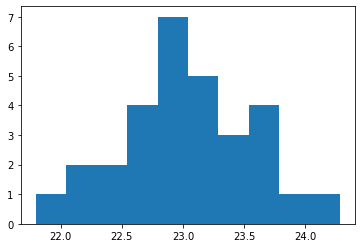

In [42]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

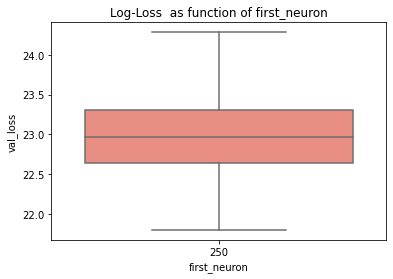

In [43]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

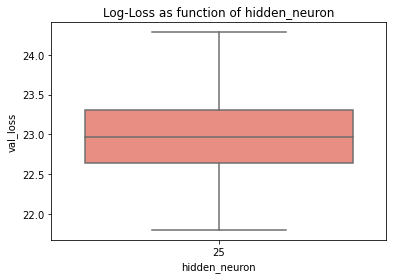

In [44]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

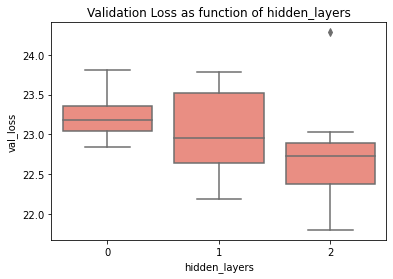

In [45]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


Text(0.5, 1.0, 'EI Validation Loss as function of hidden layers')

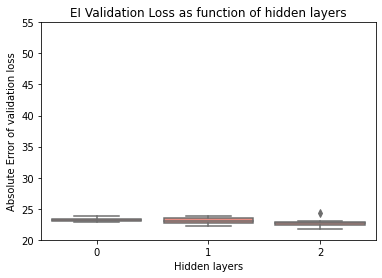

In [3]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20, 55]) 
ax.set_title('Hidden layers')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Hidden layers')
ax.set_title('EI Validation Loss as function of hidden layers') #ta


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

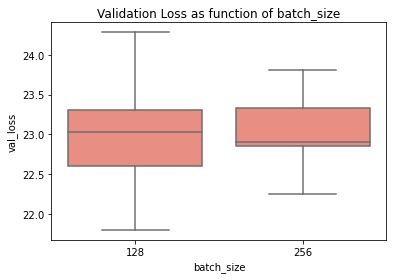

In [46]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.5 activation_layer

Text(0.5, 1.0, 'Validation Loss as function of activation_layer')

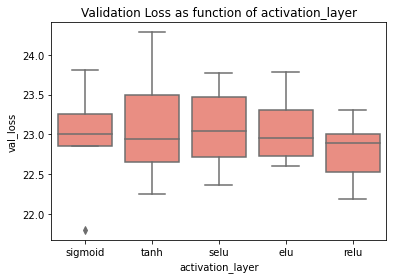

In [47]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

Text(0.5, 1.0, 'EI Validation Loss as function of activation layer')

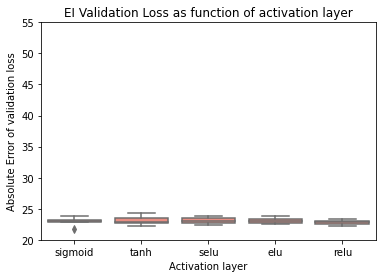

In [4]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20,55]) 
ax.set_title('Activation layer')
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Activation layer')
ax.set_title('EI Validation Loss as function of activation layer') #ta
